## Settings

In [4]:
import os
import sys
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as itp
import tables
from pykeops.numpy import LazyTensor as LazyTensor_np


print(tf.version.VERSION)

2.15.0


In [6]:
sys.path.append(os.path.join(".."))
from importData.rawdata_parser import DataHelper
from resultAnalysis.print_results import print_results
from utils.global_classes import Project, Params
from importData import rawdata_parser
from importData import epochs_management as ep
from simpleBayes import decode_bayes as BayesTraining
from fullEncoder import an_network as NNTraining

%matplotlib inline

In [7]:
from tempfile import template


current_dir = os.path.join(
    "/home/mickey/Documents/Theotime/DimaERC2/neuroencoders_1021/_work/"
)
nameExp = "LinAndThigmo_pre_Retracked"
window = 0.036
deviceName = tf.config.list_logical_devices("CPU")[0].name
target = "LinAndThigmo"
template = "pre"

2025-05-06 15:28:38.491056: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 11733 MB memory:  -> device: 0, name: NVIDIA RTX 2000 Ada Generation, pci bus id: 0000:ac:00.0, compute capability: 8.9


In [8]:
win_values = np.array([0.036, 0.108, 0.18, 0.252]) * 1000
win_values = np.array([0.036, 0.108, 0.18, 0.252, 0.504, 1.08]) * 1000
sessions = ["preNoHab", "pre", "hab", "cond", "post", "all"]
mouse_list = os.listdir(current_dir)

In [9]:
mouse_list

['M1199_PAG',
 'M994_PAG',
 'ImportantDicts_2025_04_17.pkl',
 'ImportantDicts_2025_05_02.pkl',
 'todoBAYES_df2025_05_04.pkl',
 'todo_df_2025_04_28.pkl',
 'results_df2025_05_04.pkl',
 'M1336_known',
 'errors2025_05_04.csv',
 'results_df.pkl',
 'results_df_2025_04_28.pkl',
 'M1281_MFB',
 'results_df2025_05_04wBayesMFB_chance.pkl',
 'results_df2025_05_04wBayes.pkl',
 'Roux_dataset',
 'results_df2025_05_04wBayesMFB_chanceReversal.pkl',
 'results_df (copy).pkl',
 'M1336_MFB',
 'M1239_MFB',
 'results_df2025_05_04wBayesMFB.pkl',
 'results_df_2025_05_04.pkl',
 'results_df_wBayes.pkl',
 'M1199_reversal',
 'errors_2025_04_28.pkl']

## Create and save the data if needed

In [6]:
%matplotlib qt

In [202]:
winMS

'1080.0'

In [205]:
errors_df.winMS

0       180.0
1       180.0
2       180.0
3       180.0
4       180.0
        ...  
121    1080.0
122    1080.0
123    1080.0
124    1080.0
125    1080.0
Name: winMS, Length: 126, dtype: float64

In [208]:
win_values[i]

36.0

In [207]:
winMS

'1080.0'

In [206]:
errors_df[(errors_df.mouse == mouse) & (errors_df.winMS == win_values[i])]

Empty DataFrame
Columns: [mouse, winMS, session, error]
Index: []

Processing mouse M1199_PAG


/tmp/ipykernel_4037527/2062643356.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for session in errors_df[errors_df.mouse == mouse][errors_df.winMS == win_values[i]].session.unique():
/tmp/ipykernel_4037527/2062643356.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for session in errors_df[errors_df.mouse == mouse][errors_df.winMS == win_values[i]].session.unique():
/tmp/ipykernel_4037527/2062643356.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for session in errors_df[errors_df.mouse == mouse][errors_df.winMS == win_values[i]].session.unique():


total windows: 16640 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.06503586254321055 | selected error: nan
mean linear error: 0.05298348581328245 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:173: RuntimeWarning: Mean of empty slice
  np.isinf(np.nanmean(error) * maxPos) or np.isinf(np.nanmean(error[frames]))
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:201: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M1199_PAG because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:460: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 249, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 460, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 43008 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.060197084330839444 | selected error: nan
mean linear error: 0.048201633802695876 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:173: RuntimeWarning: Mean of empty slice
  np.isinf(np.nanmean(error) * maxPos) or np.isinf(np.nanmean(error[frames]))
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:201: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M1199_PAG because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:460: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 249, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 460, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 26112 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.05715739376852167 | selected error: nan
mean linear error: 0.04531509030499633 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:173: RuntimeWarning: Mean of empty slice
  np.isinf(np.nanmean(error) * maxPos) or np.isinf(np.nanmean(error[frames]))
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:201: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M1199_PAG because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:460: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 249, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 460, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 12288 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.11926516047263956 | selected error: nan
mean linear error: 0.1065696139711914 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:173: RuntimeWarning: Mean of empty slice
  np.isinf(np.nanmean(error) * maxPos) or np.isinf(np.nanmean(error[frames]))
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:201: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:460: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", lin

snif snouf something went wrong with M1199_PAG because cannot convert float NaN to integer
total windows: 17920 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.2007365202505527 | selected error: nan
mean linear error: 0.19166002083692593 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:173: RuntimeWarning: Mean of empty slice
  np.isinf(np.nanmean(error) * maxPos) or np.isinf(np.nanmean(error[frames]))
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:201: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:460: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", lin

snif snouf something went wrong with M1199_PAG because cannot convert float NaN to integer
total windows: 5120 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.11892608555935039 | selected error: nan
mean linear error: 0.10702376800605469 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:173: RuntimeWarning: Mean of empty slice
  np.isinf(np.nanmean(error) * maxPos) or np.isinf(np.nanmean(error[frames]))
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:201: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:460: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", lin

snif snouf something went wrong with M1199_PAG because cannot convert float NaN to integer
Processing mouse M994_PAG
total windows: 135168 | selected windows: 27033 (thresh 0.0127274  ( 20.0 %) )
mean eucl. error: 0.11350641279264026 | selected error: 0.09921772102916544
mean linear error: 0.10472239032208071 | selected error: 0.0908316559570618
threshold value: 0.0127274

snif snouf something went wrong with M994_PAG because boolean index did not match indexed array along dimension 0; dimension is 2048 but corresponding boolean dimension is 135168


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 238, in print_results
    overview_fig(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 338, in overview_fig
    inferring[selection],
IndexError: boolean index did not match indexed array along dimension 0; dimension is 2048 but corresponding boolean dimension is 135168
/tmp/ipykernel_4037527/2062643356.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for session in errors_df[errors_df.mouse == mouse][errors_df.winMS == win_values[i]].session.unique():


total windows: 12544 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.05771661781835738 | selected error: nan
mean linear error: 0.05467180432650543 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:173: RuntimeWarning: Mean of empty slice
  np.isinf(np.nanmean(error) * maxPos) or np.isinf(np.nanmean(error[frames]))
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:201: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:460: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", lin

snif snouf something went wrong with M994_PAG because cannot convert float NaN to integer
total windows: 38144 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.022528791007621774 | selected error: nan
mean linear error: 0.016322682824268745 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:173: RuntimeWarning: Mean of empty slice
  np.isinf(np.nanmean(error) * maxPos) or np.isinf(np.nanmean(error[frames]))
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:201: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M994_PAG because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:460: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 249, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 460, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 25344 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.020096556174124786 | selected error: nan
mean linear error: 0.01397765043355891 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:173: RuntimeWarning: Mean of empty slice
  np.isinf(np.nanmean(error) * maxPos) or np.isinf(np.nanmean(error[frames]))
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:201: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:460: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", lin

snif snouf something went wrong with M994_PAG because cannot convert float NaN to integer
total windows: 18176 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.14617288481247798 | selected error: nan
mean linear error: 0.13644792007334836 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:173: RuntimeWarning: Mean of empty slice
  np.isinf(np.nanmean(error) * maxPos) or np.isinf(np.nanmean(error[frames]))
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:201: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M994_PAG because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:460: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 249, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 460, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 15872 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.19252606215006304 | selected error: nan
mean linear error: 0.1837055711586347 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:173: RuntimeWarning: Mean of empty slice
  np.isinf(np.nanmean(error) * maxPos) or np.isinf(np.nanmean(error[frames]))
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:201: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:460: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", lin

snif snouf something went wrong with M994_PAG because cannot convert float NaN to integer
total windows: 89856 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.11222389823512174 | selected error: nan
mean linear error: 0.10353435680730844 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:173: RuntimeWarning: Mean of empty slice
  np.isinf(np.nanmean(error) * maxPos) or np.isinf(np.nanmean(error[frames]))
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:201: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,



snif snouf something went wrong with M994_PAG because boolean index did not match indexed array along dimension 0; dimension is 1280 but corresponding boolean dimension is 89856


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")
Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 238, in print_results
    overview_fig(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 338, in overview_fig
    inferring[selection],
IndexError: boolean index did not match indexed array along dimension 0; dimension is 1280 but corresponding boolean dimension is 89856
/tmp/ipykernel_4037527/2062643356.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for session

total windows: 135168 | selected windows: 27033 (thresh 0.0062194252  ( 20.0 %) )
mean eucl. error: 0.09933270761529134 | selected error: 0.09754524412033128
mean linear error: 0.09159706615805635 | selected error: 0.08911261979897214
threshold value: 0.0062194252

snif snouf something went wrong with M994_PAG because boolean index did not match indexed array along dimension 0; dimension is 2048 but corresponding boolean dimension is 135168


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 238, in print_results
    overview_fig(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 338, in overview_fig
    inferring[selection],
IndexError: boolean index did not match indexed array along dimension 0; dimension is 2048 but corresponding boolean dimension is 135168
/tmp/ipykernel_4037527/2062643356.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for session in errors_df[errors_df.mouse == mouse][errors_df.winMS == win_values[i]].session.unique():


total windows: 18944 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.05294841072711292 | selected error: nan
mean linear error: 0.05154356112453342 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:173: RuntimeWarning: Mean of empty slice
  np.isinf(np.nanmean(error) * maxPos) or np.isinf(np.nanmean(error[frames]))
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:201: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M994_PAG because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:460: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 249, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 460, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 57600 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.012417257918756397 | selected error: nan
mean linear error: 0.009330298870786995 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:173: RuntimeWarning: Mean of empty slice
  np.isinf(np.nanmean(error) * maxPos) or np.isinf(np.nanmean(error[frames]))
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:201: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M994_PAG because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:460: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 249, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 460, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 38400 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.009908682617352518 | selected error: nan
mean linear error: 0.007089875617398332 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:173: RuntimeWarning: Mean of empty slice
  np.isinf(np.nanmean(error) * maxPos) or np.isinf(np.nanmean(error[frames]))
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:201: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M994_PAG because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:460: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 249, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 460, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 27392 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.11897576103342275 | selected error: nan
mean linear error: 0.1080669465222762 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:173: RuntimeWarning: Mean of empty slice
  np.isinf(np.nanmean(error) * maxPos) or np.isinf(np.nanmean(error[frames]))
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:201: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M994_PAG because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:460: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 249, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 460, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 23808 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.15069683166323844 | selected error: nan
mean linear error: 0.14073281352030886 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:173: RuntimeWarning: Mean of empty slice
  np.isinf(np.nanmean(error) * maxPos) or np.isinf(np.nanmean(error[frames]))
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:201: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M994_PAG because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:460: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 249, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 460, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 135168 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.08286860888598548 | selected error: nan
mean linear error: 0.07464986484638571 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:173: RuntimeWarning: Mean of empty slice
  np.isinf(np.nanmean(error) * maxPos) or np.isinf(np.nanmean(error[frames]))
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:201: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,



snif snouf something went wrong with M994_PAG because boolean index did not match indexed array along dimension 0; dimension is 2048 but corresponding boolean dimension is 135168
Processing mouse M1336_known


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")
Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 238, in print_results
    overview_fig(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 338, in overview_fig
    inferring[selection],
IndexError: boolean index did not match indexed array along dimension 0; dimension is 2048 but corresponding boolean dimension is 135168
/tmp/ipykernel_4037527/2062643356.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for sessio

total windows: 23040 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.11371611104005441 | selected error: nan
mean linear error: 0.10378268018640147 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:173: RuntimeWarning: Mean of empty slice
  np.isinf(np.nanmean(error) * maxPos) or np.isinf(np.nanmean(error[frames]))
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:201: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M1336_known because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:404: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(15, 9))
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:460: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 5

total windows: 54272 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.07186201069805141 | selected error: nan
mean linear error: 0.06015462574709988 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:173: RuntimeWarning: Mean of empty slice
  np.isinf(np.nanmean(error) * maxPos) or np.isinf(np.nanmean(error[frames]))
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:201: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M1336_known because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:460: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 249, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 460, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 30976 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.0474141712738062 | selected error: nan
mean linear error: 0.03554808446308142 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:173: RuntimeWarning: Mean of empty slice
  np.isinf(np.nanmean(error) * maxPos) or np.isinf(np.nanmean(error[frames]))
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:201: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M1336_known because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:460: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 249, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 460, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 29440 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.22041536899214187 | selected error: nan
mean linear error: 0.21154996577838936 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:173: RuntimeWarning: Mean of empty slice
  np.isinf(np.nanmean(error) * maxPos) or np.isinf(np.nanmean(error[frames]))
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:201: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M1336_known because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:460: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 249, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 460, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 12032 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.22806764685607078 | selected error: nan
mean linear error: 0.21809015993524936 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:173: RuntimeWarning: Mean of empty slice
  np.isinf(np.nanmean(error) * maxPos) or np.isinf(np.nanmean(error[frames]))
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:201: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:460: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", lin

snif snouf something went wrong with M1336_known because cannot convert float NaN to integer
total windows: 96000 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.13766249197106128 | selected error: nan
mean linear error: 0.1270555657813767 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:173: RuntimeWarning: Mean of empty slice
  np.isinf(np.nanmean(error) * maxPos) or np.isinf(np.nanmean(error[frames]))
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:201: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,



snif snouf something went wrong with M1336_known because boolean index did not match indexed array along dimension 0; dimension is 2048 but corresponding boolean dimension is 96000


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")
Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 238, in print_results
    overview_fig(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 338, in overview_fig
    inferring[selection],
IndexError: boolean index did not match indexed array along dimension 0; dimension is 2048 but corresponding boolean dimension is 96000
/tmp/ipykernel_4037527/2062643356.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for session

achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt
/tmp/ipykernel_403752

achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt
/tmp/ipykernel_403752

achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt
Processing mouse M1281_MFB


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt
/tmp/ipykernel_403752

total windows: 29440 | selected windows: 5888 (thresh 0.094321154  ( 20.0 %) )
mean eucl. error: 0.2570366808510786 | selected error: 0.23475576865678266
mean linear error: 0.24426862701029214 | selected error: 0.22544077370074728
threshold value: 0.094321154

snif snouf something went wrong with M1281_MFB because boolean index did not match indexed array along dimension 0; dimension is 768 but corresponding boolean dimension is 29440


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 238, in print_results
    overview_fig(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 338, in overview_fig
    inferring[selection],
IndexError: boolean index did not match indexed array along dimension 0; dimension is 768 but corresponding boolean dimension is 29440
/tmp/ipykernel_4037527/2062643356.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for session in errors_df[errors_df.mouse == mouse][errors_df.winMS == win_values[i]].session.unique():


total windows: 14336 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.1356334175574535 | selected error: nan
mean linear error: 0.12791986722110207 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:173: RuntimeWarning: Mean of empty slice
  np.isinf(np.nanmean(error) * maxPos) or np.isinf(np.nanmean(error[frames]))
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:201: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:460: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", lin

snif snouf something went wrong with M1281_MFB because cannot convert float NaN to integer
total windows: 44288 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.08567421572011549 | selected error: nan
mean linear error: 0.07571067764182099 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:173: RuntimeWarning: Mean of empty slice
  np.isinf(np.nanmean(error) * maxPos) or np.isinf(np.nanmean(error[frames]))
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:201: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M1281_MFB because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:460: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 249, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 460, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 29952 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.06346155842550813 | selected error: nan
mean linear error: 0.05262938390057558 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:173: RuntimeWarning: Mean of empty slice
  np.isinf(np.nanmean(error) * maxPos) or np.isinf(np.nanmean(error[frames]))
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:201: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M1281_MFB because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:460: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 249, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 460, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 39936 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.3056307851594314 | selected error: nan
mean linear error: 0.29923940618581957 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:173: RuntimeWarning: Mean of empty slice
  np.isinf(np.nanmean(error) * maxPos) or np.isinf(np.nanmean(error[frames]))
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:201: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M1281_MFB because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:460: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 249, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 460, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 26112 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.33666004457694987 | selected error: nan
mean linear error: 0.33115929970535923 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:173: RuntimeWarning: Mean of empty slice
  np.isinf(np.nanmean(error) * maxPos) or np.isinf(np.nanmean(error[frames]))
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:201: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M1281_MFB because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:460: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 249, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 460, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 118016 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.23774896537044193 | selected error: nan
mean linear error: 0.23045250854564348 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:173: RuntimeWarning: Mean of empty slice
  np.isinf(np.nanmean(error) * maxPos) or np.isinf(np.nanmean(error[frames]))
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:201: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,



snif snouf something went wrong with M1281_MFB because boolean index did not match indexed array along dimension 0; dimension is 3584 but corresponding boolean dimension is 118016


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")
Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 238, in print_results
    overview_fig(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 338, in overview_fig
    inferring[selection],
IndexError: boolean index did not match indexed array along dimension 0; dimension is 3584 but corresponding boolean dimension is 118016
/tmp/ipykernel_4037527/2062643356.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for sessio

total windows: 58880 | selected windows: 11776 (thresh 0.03286801  ( 20.0 %) )
mean eucl. error: 0.24467505068790285 | selected error: 0.2905435413335602
mean linear error: 0.23726475735505773 | selected error: 0.2830704510849184
threshold value: 0.03286801

snif snouf something went wrong with M1281_MFB because boolean index did not match indexed array along dimension 0; dimension is 1792 but corresponding boolean dimension is 58880


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 238, in print_results
    overview_fig(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 338, in overview_fig
    inferring[selection],
IndexError: boolean index did not match indexed array along dimension 0; dimension is 1792 but corresponding boolean dimension is 58880
/tmp/ipykernel_4037527/2062643356.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for session in errors_df[errors_df.mouse == mouse][errors_df.winMS == win_values[i]].session.unique():


total windows: 117760 | selected windows: 23552 (thresh 0.026589885  ( 20.0 %) )
mean eucl. error: 0.21539713525323725 | selected error: 0.12063928043957771
mean linear error: 0.20704499035695523 | selected error: 0.11042923694857167
threshold value: 0.026589885

snif snouf something went wrong with M1281_MFB because boolean index did not match indexed array along dimension 0; dimension is 3584 but corresponding boolean dimension is 117760


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 238, in print_results
    overview_fig(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 338, in overview_fig
    inferring[selection],
IndexError: boolean index did not match indexed array along dimension 0; dimension is 3584 but corresponding boolean dimension is 117760
/tmp/ipykernel_4037527/2062643356.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for session in errors_df[errors_df.mouse == mouse][errors_df.winMS == win_values[i]].session.unique():


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1281_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1281_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1281_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1281_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1281_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1281_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt
/tmp/ipykernel_4037527/

achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1281_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1281_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1281_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1281_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1281_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1281_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt
Processing mouse M1336_MFB


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt
/tmp/ipykernel_4037527

total windows: 21760 | selected windows: 4352 (thresh 0.114631206  ( 20.0 %) )
mean eucl. error: inf | selected error: inf
mean linear error: 0.27816297275448393 | selected error: 0.18615077978768385
threshold value: 0.114631206


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")




coucou


/tmp/ipykernel_4037527/2062643356.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for session in errors_df[errors_df.mouse == mouse][errors_df.winMS == win_values[i]].session.unique():


total windows: 131840 | selected windows: 26368 (thresh 0.026594087  ( 20.0 %) )
mean eucl. error: inf | selected error: inf
mean linear error: 0.16537032161615853 | selected error: 0.08013483992305331
threshold value: 0.026594087


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")




coucou


/tmp/ipykernel_4037527/2062643356.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for session in errors_df[errors_df.mouse == mouse][errors_df.winMS == win_values[i]].session.unique():


total windows: 65280 | selected windows: 13056 (thresh 0.022591352  ( 20.0 %) )
mean eucl. error: inf | selected error: inf
mean linear error: 0.15354470415683064 | selected error: 0.08804845035600338
threshold value: 0.022591352


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")




coucou


/tmp/ipykernel_4037527/2062643356.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for session in errors_df[errors_df.mouse == mouse][errors_df.winMS == win_values[i]].session.unique():


total windows: 131584 | selected windows: 26316 (thresh 0.014460911  ( 20.0 %) )
mean eucl. error: inf | selected error: inf
mean linear error: 0.1307722762939606 | selected error: 0.10318500370231086
threshold value: 0.014460911


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")




coucou


/tmp/ipykernel_4037527/2062643356.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for session in errors_df[errors_df.mouse == mouse][errors_df.winMS == win_values[i]].session.unique():


total windows: 131072 | selected windows: 26214 (thresh 0.009038284  ( 20.0 %) )
mean eucl. error: inf | selected error: inf
mean linear error: 0.12053261497552084 | selected error: 0.10386307505245548
threshold value: 0.009038284


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")




coucou


/tmp/ipykernel_4037527/2062643356.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for session in errors_df[errors_df.mouse == mouse][errors_df.winMS == win_values[i]].session.unique():


total windows: 64256 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: inf | selected error: nan
mean linear error: 0.12821541193688604 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:201: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,



snif snouf something went wrong with M1336_MFB because boolean index did not match indexed array along dimension 0; dimension is 2560 but corresponding boolean dimension is 64256
Processing mouse M1239_MFB


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:235: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")
Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 52, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 238, in print_results
    overview_fig(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 338, in overview_fig
    inferring[selection],
IndexError: boolean index did not match indexed array along dimension 0; dimension is 2560 but corresponding boolean dimension is 64256
/tmp/ipykernel_4037527/2062643356.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for session

achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/108/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/108/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/108/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/108/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/108/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/108/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/108/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/108/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/108/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/108/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/108/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/108/full/cp.ckpt
/tmp/ipykernel_4037527/

achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt
/tmp/ipykernel_4037527/

achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt
/tmp/ipykernel_4037527/

achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt
Processing mouse M1199_reversal


Traceback (most recent call last):
  File "/tmp/ipykernel_4037527/2062643356.py", line 38, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt
/tmp/ipykernel_4037527/

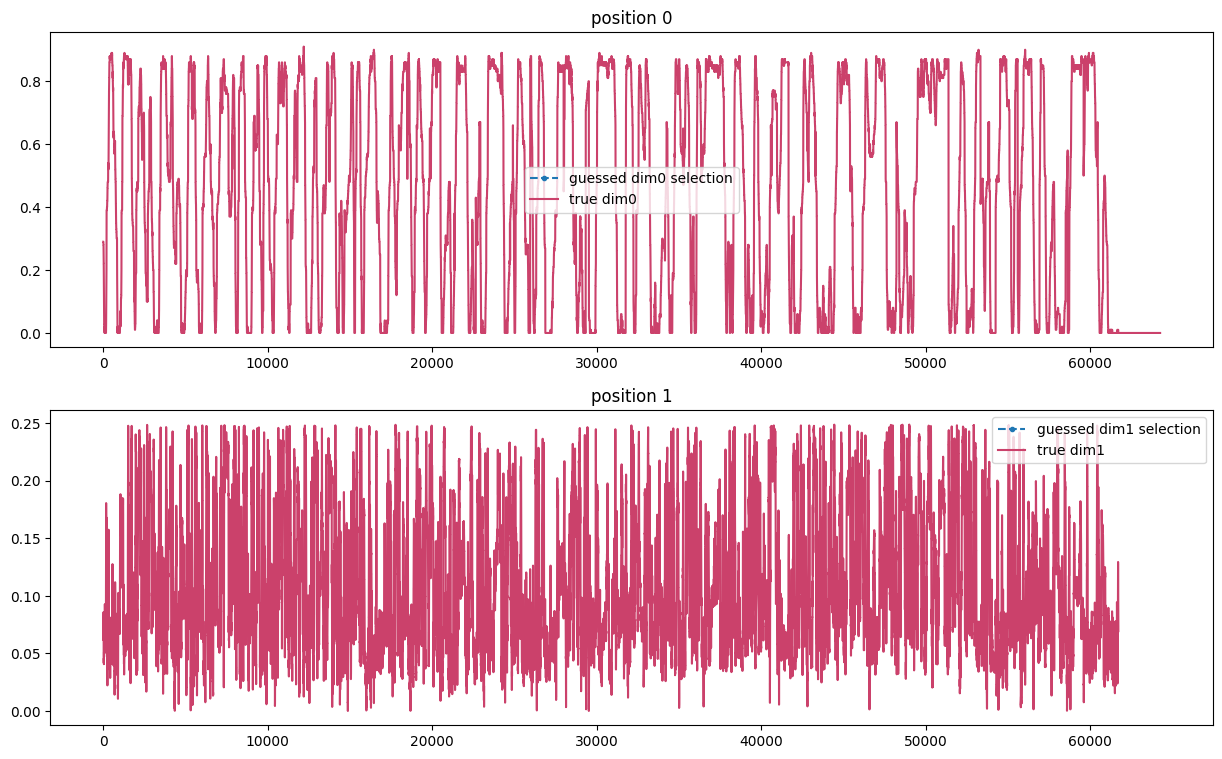

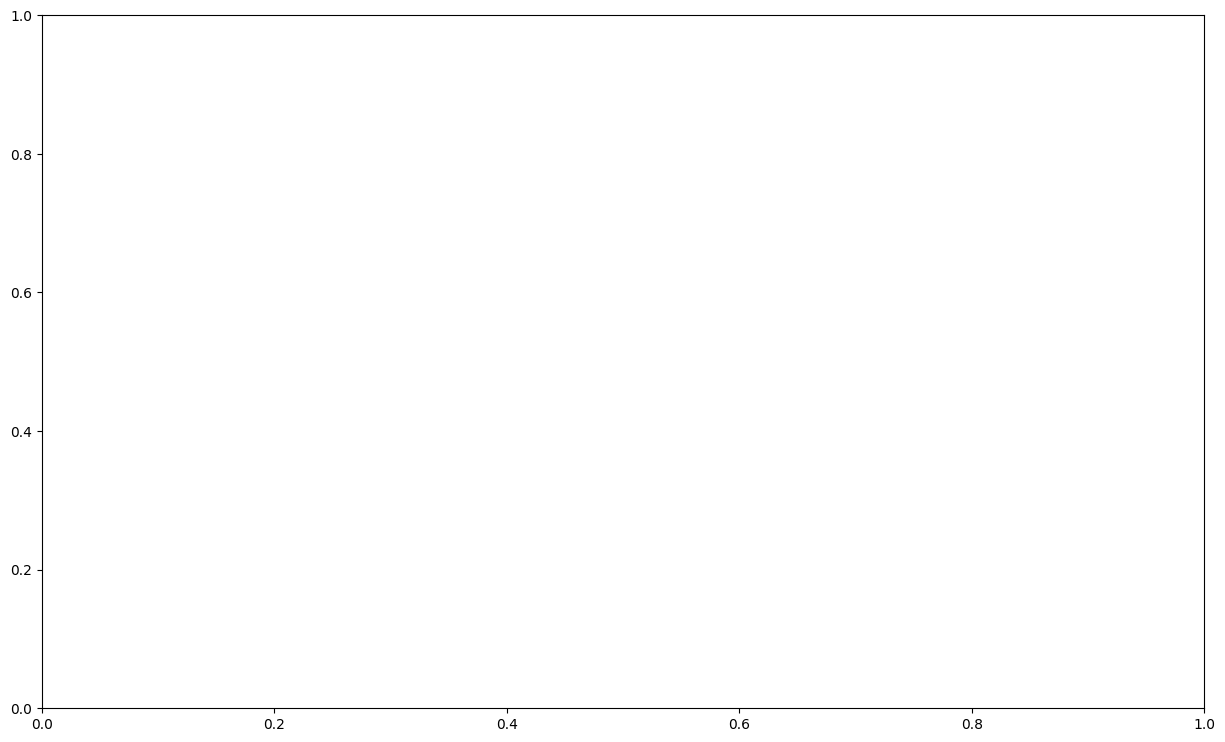

In [ ]:
from resultAnalysis import paper_figures
from simpleBayes import decode_bayes as BayesTraining
from fullEncoder import an_network as NNTraining
from epochs_management import inEpochs
import pandas as pd

reload(BayesTraining)
reload(NNTraining)
reload(print_results)
reload(paper_figures)
debug = False
do_ann = True
for mouse in errors_df["mouse"].unique():
    print(f"Processing mouse {mouse}")
    for i, winMS in enumerate(errors_df[errors_df.mouse == mouse].winMS.unique()):
        figure_done = False
        winMS = str(winMS)
        for session in errors_df[errors_df.mouse == mouse][
            errors_df.winMS == win_values[i]
        ].session.unique():
            suffix = f"_{session}"
            testOutput = None
            mean_ann = None
            select_ann = None
            mean_lin_ann = None
            select_lin_ann = None
            mean_eucl_bayes = None
            select_eucl_bayes = None
            mean_lin_bayes = None
            select_lin_bayes = None
            try:
                NNTrainer = NNTraining.LSTMandSpikeNetwork(
                    ProjectPath[mouse][winMS][session],
                    Parameters[mouse][winMS][session],
                    deviceName=deviceName,
                    debug=debug,
                )
                if (
                    not os.path.exists(
                        os.path.join(
                            NNTrainer.folderResult,
                            str(int(win_values[i])),
                            f"overviewFig_2d_NN{suffix}.png",
                        )
                    )
                ) or (
                    not os.path.exists(
                        os.path.join(
                            NNTrainer.folderResult,
                            str(int(win_values[i])),
                            f"linearPred{suffix}.csv",
                        )
                    )
                ):
                    if do_ann:
                        print("achtung testing the network again and again")
                        testOutput = NNTrainer.test(
                            DataHelper[mouse][winMS][session].fullBehavior,
                            useTrain=True,
                            windowsizeMS=int(win_values[i]),
                            isPredLoss=False,
                            useSpeedFilter=True,
                            phase=session,
                            template=template,
                            l_function=l_function[mouse][session],
                        )
                        if testOutput["predLoss"].max() == 0:
                            print(
                                "ouin ouin no interesting pred loss (always 0 or below)"
                            )
                        else:
                            avoid_zero = False
                (
                    mean_ann,
                    select_ann,
                    mean_lin_ann,
                    select_lin_ann,
                ) = print_results.print_results(
                    NNTrainer.folderResult,
                    windowSizeMS=int(win_values[i]),
                    show=False,
                    lossSelection=0.2,
                    euclidean=False,
                    target=target,
                    avoid_zero=avoid_zero,
                    phase=session,
                )
                print("coucou")

            except Exception as e:
                print(f"snif snouf something went wrong with {mouse} because {e}")
                traceback.print_exc()

            results_df.loc[
                (results_df.mouse == mouse)
                & (results_df.winMS == winMS)
                & (results_df.session == session),
                "mean_eucl",
            ] = mean_ann
            results_df.loc[
                (results_df.mouse == mouse)
                & (results_df.winMS == winMS)
                & (results_df.session == session),
                "select_eucl",
            ] = select_ann
            results_df.loc[
                (results_df.mouse == mouse)
                & (results_df.winMS == winMS)
                & (results_df.session == session),
                "mean_lin",
            ] = mean_lin_ann
            results_df.loc[
                (results_df.mouse == mouse)
                & (results_df.winMS == winMS)
                & (results_df.session == session),
                "select_lin",
            ] = select_lin_ann

        figure_done = True

In [7]:
i = 0
mode = "ann"
ProjectPath = dict()
DataHelper = dict()
sessions = ["preNoHab", "pre", "hab", "cond", "post", "all"]
template_session = "pre"
for mouse in mouse_list[
    :
]:  # Use a copy of the list to avoid modifying it while iterating
    ProjectPath[mouse] = dict()
    DataHelper[mouse] = dict()
    mouse_skipped = False  # Flag to check if the mouse is skipped
    for i, winMS in enumerate(win_values):
        winMS = str(winMS)
        ProjectPath[mouse][winMS] = dict()
        DataHelper[mouse][winMS] = dict()
        for session in sessions:
            project_file = os.path.join(
                current_dir, mouse, nameExp, f"Project_{int(win_values[i])}.pkl"
            )
            if not os.path.exists(project_file):
                print(f"Project file {project_file} does not exist.")
                # Drop the mouse from the list and dicts, then skip to the next mouse
                del ProjectPath[mouse]
                del DataHelper[mouse]
                mouse_list.remove(mouse)
                mouse_skipped = True
                break
            ProjectPath[mouse][winMS][session] = Project.load(project_file)
            rawdata_parser.select_epochs(
                ProjectPath[mouse][winMS][session].folder,
                overWrite=True,
                phase=session,
                force=True,
            )
            DataHelper[mouse][winMS][session] = rawdata_parser.DataHelper(
                ProjectPath[mouse][winMS][session],
                target=target,
                mode="ann",
                phase=session,
            )
        if mouse_skipped:
            break

/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 cla

Using the first session that contains preNoHab: TestPre1


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains pre: TestPre1


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains hab: Hab


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains cond: Cond1


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains post: TestPost1


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains all: Cond1


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 cla

Project file /home/mickey/Documents/Theotime/DimaERC2/neuroencoders_1021/_work/ImportantDicts_2025_04_17.pkl/LinAndThigmo_pre_Retracked/Project_36.pkl does not exist.
Project file /home/mickey/Documents/Theotime/DimaERC2/neuroencoders_1021/_work/todo_df_2025_04_28.pkl/LinAndThigmo_pre_Retracked/Project_36.pkl does not exist.


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains preNoHab: TestPre1


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains pre: TestPre1


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains hab: Hab


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains cond: Cond1


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains post: TestPost1


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains all: Cond1


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 cla

Project file /home/mickey/Documents/Theotime/DimaERC2/neuroencoders_1021/_work/results_df.pkl/LinAndThigmo_pre_Retracked/Project_36.pkl does not exist.
Project file /home/mickey/Documents/Theotime/DimaERC2/neuroencoders_1021/_work/results_df_2025_04_28.pkl/LinAndThigmo_pre_Retracked/Project_36.pkl does not exist.


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains preNoHab: TestPre1


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains pre: TestPre1


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains hab: Hab


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains cond: Cond1


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains post: TestPost1


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains all: Cond1


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 cla

Project file /home/mickey/Documents/Theotime/DimaERC2/neuroencoders_1021/_work/Roux_dataset/LinAndThigmo_pre_Retracked/Project_36.pkl does not exist.
Project file /home/mickey/Documents/Theotime/DimaERC2/neuroencoders_1021/_work/results_df (copy).pkl/LinAndThigmo_pre_Retracked/Project_36.pkl does not exist.


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains preNoHab: TestPre1


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains pre: TestPre1


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains hab: Hab


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains cond: Cond1


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains post: TestPost1


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains all: Cond1


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 cla

Using the first session that contains preNoHab: TestPre1


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains pre: TestPre1


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains hab: Hab


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains cond: Cond1


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains post: TestPost1


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains all: Cond1


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 cla

Project file /home/mickey/Documents/Theotime/DimaERC2/neuroencoders_1021/_work/results_df_wBayes.pkl/LinAndThigmo_pre_Retracked/Project_36.pkl does not exist.


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains preNoHab: TestPre1


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains pre: TestPre1


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains hab: Hab


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains cond: Cond1


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains post: TestPost1


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Using the first session that contains all: Cond1


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 cla

Project file /home/mickey/Documents/Theotime/DimaERC2/neuroencoders_1021/_work/errors_2025_04_28.pkl/LinAndThigmo_pre_Retracked/Project_36.pkl does not exist.


In [8]:
DataHelper.keys()

dict_keys(['M1199_PAG', 'M994_PAG', 'M1336_known', 'M1281_MFB', 'M1336_MFB', 'M1239_MFB', 'M1199_reversal'])

In [12]:
mouse_list

['M1199_PAG',
 'M994_PAG',
 'M1336_known',
 'M1281_MFB',
 'M1336_MFB',
 'M1239_MFB',
 'M1199_reversal']

In [13]:
for session in sessions:
    print(DataHelper[mouse_list[-1]][winMS][session].fullBehavior["Times"])

{'learning': 375.2099999999864, 'trainEpochs': array([14489.76725, 14610.26025, 14634.7688 , 14755.2508 , 14774.1476 ,
       14894.6836 , 14920.09165, 15040.60565, 15064.5723 , 15185.0663 ,
       15201.3605 , 15321.8995 , 15348.7993 , 15469.2293 , 15491.1856 ,
       15500.8866 ]), 'testEpochs': array([15500.8866, 15611.6656]), 'lossPredSetEpochs': [], 'speedFilter': array([ True,  True,  True, ..., False, False, False]), 'sleepEpochs': array([[ 1854.34495],
       [14455.28295],
       [17630.00655],
       [22636.60255]]), 'sleepNames': ['PreSleep', 'PostSleep'], 'sessionNames': ['Hab', 'Hab2', 'PreSleep', 'TestPre1', 'TestPre2', 'TestPre3', 'TestPre4', 'TestPre5', 'TestPre6', 'TestPre7', 'TestPre8', 'Cond1', 'Cond2', 'Cond3', 'Cond4', 'PostSleep', 'TestPost1', 'TestPost2', 'TestPost3', 'TestPost4', 'TestPost5', 'TestPost6', 'TestPost7', 'TestPost8', 'Extinct']}
{'learning': 1289.5569999999834, 'trainEpochs': array([   19.86715,   920.38315,   948.1479 ,  1848.6429 , 14489.76725,
 

In [14]:
from cmcrameri import cm
from matplotlib import colors

In [15]:
mouse = mouse_list[-1]

In [17]:
fig, _axs = plt.subplots(2, len(sessions), figsize=(20, 10), sharex=True, sharey=True)
fig.suptitle(f"Mouse {mouse} - {winMS} - {mode}")
# axs = _axs.flatten()
axs = _axs
badIndices = np.isnan(DataHelper[mouse][winMS][session].positions[:, 0]) | np.isnan(
    DataHelper[mouse][winMS][session].positions[:, 1]
)
good_indices = ~badIndices
for ax_idx, session in enumerate(sessions):
    maskToShow = ep.inEpochsMask(
        DataHelper[mouse][winMS][session].fullBehavior["positionTime"],
        DataHelper[mouse][winMS][session].fullBehavior["Times"]["trainEpochs"],
    )[:, 0]
    maskToShow = good_indices & maskToShow
    axs[0, ax_idx].imshow(
        DataHelper[mouse][winMS][session].aligned_ref,
        cmap="gray",
        extent=[0, 1, 0, 1],
        vmin=0,
        vmax=1,
        origin="lower",
    )
    axs[0, ax_idx].scatter(
        DataHelper[mouse][winMS][session].positions[maskToShow, 0],
        DataHelper[mouse][winMS][session].positions[maskToShow, 1],
        s=2,
        c=DataHelper[mouse][winMS][session].positionTime[maskToShow],
        cmap=cm.batlowK,
    )
    axs[0, ax_idx].set_title(session)
    heatmap, xedges, yedges = np.histogram2d(
        DataHelper[mouse][winMS][session].positions[maskToShow, 0],
        DataHelper[mouse][winMS][session].positions[maskToShow, 1],
        bins=(64, 64),
        density=True,
    )
    extent = [0, 1, 0, 1]
    axs[1, ax_idx].imshow(
        heatmap.T, origin="lower", extent=extent, cmap=cm.batlowW, norm=colors.LogNorm()
    )

In [18]:
DataHelper[mouse][winMS][session].positions[maskToShow, 0]
DataHelper[mouse][winMS][session].positions[maskToShow, 1]

array([0.97190955, 0.97286667, 0.97337385, ..., 0.19375369, 0.2027353 ,
       0.21653015])

In [19]:
%matplotlib qt

In [20]:
from importlib import reload

In [27]:
DataHelper[mouse][winMS][session]

In [29]:
Parameters = dict()
Linearizer = dict()
l_function = dict()
from zmq import has
from transformData import linearizer

reload(linearizer)
UMazeLinearizer = linearizer.UMazeLinearizer

for mouse in mouse_list:
    show = False
    Parameters[mouse] = dict()
    Linearizer[mouse] = dict()
    l_function[mouse] = dict()
    for i, winMS in enumerate(win_values):
        winMS = str(winMS)
        Parameters[mouse][winMS] = dict()
        for session in sessions:
            if hasattr(DataHelper[mouse][winMS][session], "old_positions"):
                DataHelper[mouse][winMS][session].positions = DataHelper[mouse][winMS][
                    session
                ].old_positions

            Parameters[mouse][winMS][session] = Params(
                helper=DataHelper[mouse][winMS][session],
                windowSize=win_values[i],
                nEpochs=400,
            )
            if i == 0:
                Linearizer[mouse][session] = UMazeLinearizer(
                    ProjectPath[mouse][winMS][session].folder, phase=session
                )
                Linearizer[mouse][session].verify_linearization(
                    DataHelper[mouse][winMS][session].positions
                    / DataHelper[mouse][winMS][session].maxPos(),
                    ProjectPath[mouse][winMS][session].folder,
                    overwrite=(show and session == "preNoHab"),
                )
                l_function[mouse][session] = Linearizer[mouse][
                    session
                ].pykeops_linearization

            DataHelper[mouse][winMS][session].get_true_target(
                l_function[mouse][session],
                in_place=True,
                show=(show and i == 0 and session == "preNoHab"),
            )
        show = False

/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:291: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Linearization points have been created before


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/shapely/measurement.py:81: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)


Linearization points have been created before
Linearization points have been created before
Linearization points have been created before
Linearization points have been created before
Linearization points have been created before
Linearization points have been created before
Linearization points have been created before
Linearization points have been created before
Linearization points have been created before
Linearization points have been created before
Linearization points have been created before
Linearization points have been created before
Linearization points have been created before
Linearization points have been created before
Linearization points have been created before
Linearization points have been created before
Linearization points have been created before
Linearization points have been created before
Linearization points have been created before
Linearization points have been created before
Linearization points have been created before
Linearization points have been cre

In [30]:
tf.config.list_logical_devices()

[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [31]:
print(deviceName)

/device:CPU:0


In [32]:
sessions

['preNoHab', 'pre', 'hab', 'cond', 'post', 'all']

In [33]:
winMS

'1080.0'

In [34]:
def save_dicts(dicts, filename):
    """
    Save a list of dictionaries to a file in pkl format.

    :param dicts: List of dictionaries to save
    :param filename: Name of the file to save the dictionaries to
    """

    import dill as pickle
    import os

    with open(os.path.expanduser(filename), "wb") as f:
        pickle.dump(dicts, f, protocol=pickle.HIGHEST_PROTOCOL)
        print(f"Saved {len(dicts)} dictionaries to {filename}")
    return filename

In [35]:
from datetime import datetime

today = datetime.now().strftime("%Y_%m_%d")
today

'2025_05_02'

In [37]:
my_important_dicts = [DataHelper, ProjectPath, Parameters, Linearizer, l_function]

In [38]:
save_dicts(my_important_dicts, os.path.join(current_dir, f"ImportantDicts_{today}.pkl"))

Saved 5 dictionaries to /home/mickey/Documents/Theotime/DimaERC2/neuroencoders_1021/_work/ImportantDicts_2025_05_02.pkl


'/home/mickey/Documents/Theotime/DimaERC2/neuroencoders_1021/_work/ImportantDicts_2025_05_02.pkl'

## Load the existing dicts otherwise

In [10]:
from importlib import reload
import resultAnalysis.print_results as print_results
import dill as pickle

In [11]:
def load_dicts(filename):
    """
    Load a list of dictionaries from a file in pkl format.

    :param filename: Name of the file to load the dictionaries from
    :return: List of dictionaries loaded from the file
    """
    import dill as pickle

    with open(filename, "rb") as f:
        dicts = pickle.load(f)
        print(f"Loaded {len(dicts)} dictionaries from {filename}")
    return dicts

In [12]:
from datetime import datetime

In [13]:
today = datetime.now().strftime("%Y_%m_%d")
today

'2025_05_06'

In [14]:
today = "2025_05_02"

In [15]:
my_important_dicts = load_dicts(
    os.path.join(current_dir, f"ImportantDicts_{today}.pkl")
)

Loaded 5 dictionaries from /home/mickey/Documents/Theotime/DimaERC2/neuroencoders_1021/_work/ImportantDicts_2025_05_02.pkl


In [16]:
DataHelper, ProjectPath, Parameters, Linearizer, l_function = my_important_dicts

In [17]:
mouse = mouse_list[0]
winMS = str(win_values[0])
session = "pre"

In [18]:
print(deviceName)

/device:CPU:0


In [19]:
DataHelper[mouse][winMS][session].fullBehavior.keys()

dict_keys(['Positions', 'positionTime', 'Speed', 'Bandwidth', 'Times', 'ref', 'aligned_ref', 'xyOutput', 'ratioIMAonREAL', 'shock_zone', 'old_positions'])

In [20]:
deviceName = tf.config.list_logical_devices("GPU")[0].name

## Finally load the trainers and make some tests

In [21]:
deviceName = tf.config.list_logical_devices("GPU")[0].name

In [22]:
import traceback

In [23]:
for mouse in mouse_list:
    if mouse not in DataHelper.keys():
        mouse_list.remove(mouse)

In [24]:
DataHelper.keys()

dict_keys(['M1199_PAG', 'M994_PAG', 'M1336_known', 'M1281_MFB', 'M1336_MFB', 'M1239_MFB', 'M1199_reversal'])

In [25]:
mouse_list

['M1199_PAG',
 'M994_PAG',
 'ImportantDicts_2025_05_02.pkl',
 'todo_df_2025_04_28.pkl',
 'M1336_known',
 'results_df.pkl',
 'M1281_MFB',
 'results_df2025_05_04wBayes.pkl',
 'results_df2025_05_04wBayesMFB_chanceReversal.pkl',
 'M1336_MFB',
 'M1239_MFB',
 'results_df_2025_05_04.pkl',
 'M1199_reversal']

In [26]:
results_df[results_df.mouse == mouse]

NameError: name 'results_df' is not defined

In [ ]:
from resultAnalysis import paper_figures
from simpleBayes import decode_bayes as BayesTraining
from fullEncoder import an_network as NNTraining
from epochs_management import inEpochs
import pandas as pd
reload(BayesTraining)
reload(NNTraining)
reload(print_results)
reload(paper_figures)

mouse = "M1239_MFB"
winMS = "36.0"
session = "cond"
suffix = else f"_{session}"
debug = False
template = "pre"
NNTrainer = NNTraining.LSTMandSpikeNetwork(
    ProjectPath[mouse][winMS][session],
    Parameters[mouse][winMS][session],
    deviceName=deviceName,
    debug=debug)

testOutput = NNTrainer.test(
    DataHelper[mouse][winMS][session].fullBehavior,
    useTrain=True,
    windowsizeMS=36,
    isPredLoss=False,
    useSpeedFilter=True,
    phase=session,
    template=template,
    l_function=l_function[mouse][session]
)

Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)
2025-05-05 15:23:06.749116: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907


16/16 [==============================] - 17s 761ms/step
gathering true feature
gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask


In [357]:
target

'LinAndThigmo'

In [359]:
NNTrainer.clear_session()

In [358]:
mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
    NNTrainer.folderResult,
    windowSizeMS=36,
    show=False,
    lossSelection=0.2,
    euclidean=False,
    target=target,
    avoid_zero=False,
    phase=session,
)

total windows: 4096 | selected windows: 819 (thresh 0.06319795  ( 20.0 %) )
mean eucl. error: 0.3798700432005112 | selected error: 0.5128904750655493
mean linear error: 0.3721009734919434 | selected error: 0.5053947662271062
threshold value: 0.06319795





### case where we run stuff 

In [ ]:
from resultAnalysis import paper_figures
from simpleBayes import decode_bayes as BayesTraining
from fullEncoder import an_network as NNTraining
from epochs_management import inEpochs
import pandas as pd

reload(BayesTraining)
reload(NNTraining)
reload(print_results)
reload(paper_figures)
data = []
debug = False
errors = []
do_bayes = False
do_ann = True
todo = []
for mouse in mouse_list:
    print(f"Processing mouse {mouse}")
    bayesMatrices = None
    for i, winMS in enumerate(win_values):
        figure_done = False
        winMS = str(winMS)
        for session in sessions:
            suffix = f"_{session}"
            avoid_zero = False
            figures = None
            NNTrainer = None
            BayesTrainer = None
            testOutput = None
            mean_ann = None
            select_ann = None
            mean_lin_ann = None
            select_lin_ann = None
            mean_eucl_bayes = None
            select_eucl_bayes = None
            mean_lin_bayes = None
            select_lin_bayes = None
            try:
                NNTrainer = NNTraining.LSTMandSpikeNetwork(
                    ProjectPath[mouse][winMS][session],
                    Parameters[mouse][winMS][session],
                    deviceName=deviceName,
                    debug=debug,
                )
                if (
                    not os.path.exists(
                        os.path.join(
                            NNTrainer.folderResult,
                            str(int(win_values[i])),
                            f"overviewFig_2d_NN{suffix}.png",
                        )
                    )
                ) or (
                    not os.path.exists(
                        os.path.join(
                            NNTrainer.folderResult,
                            str(int(win_values[i])),
                            f"linearPred{suffix}.csv",
                        )
                    )
                ):
                    if do_ann:
                        print("achtung testing the network again and again")
                        testOutput = NNTrainer.test(
                            DataHelper[mouse][winMS][session].fullBehavior,
                            useTrain=True,
                            windowsizeMS=int(win_values[i]),
                            isPredLoss=False,
                            useSpeedFilter=True,
                            phase=session,
                            template=template,
                            l_function=l_function[mouse][session],
                        )
                        if testOutput["predLoss"].max() == 0:
                            print(
                                "ouin ouin no interesting pred loss (always 0 or below)"
                            )
                            avoid_zero = True
                        else:
                            avoid_zero = False
                    else:
                        todo.append(
                            {
                                "mouse": mouse,
                                "winMS": winMS,
                                "session": session,
                                "NNTrainer": NNTrainer,
                                "l_function": l_function[mouse][session],
                                "ann": True,
                            }
                        )

                (
                    mean_ann,
                    select_ann,
                    mean_lin_ann,
                    select_lin_ann,
                ) = print_results.print_results(
                    NNTrainer.folderResult,
                    windowSizeMS=int(win_values[i]),
                    show=False,
                    lossSelection=0.2,
                    euclidean=False,
                    target=target,
                    avoid_zero=avoid_zero,
                    phase=session,
                )
                if do_bayes and (
                    not os.path.exists(
                        os.path.join(
                            NNTrainer.folderResult,
                            str(int(win_values[i])),
                            f"overviewFig_2d_bayes_{session}.png",
                        )
                    )
                ):
                    try:
                        with open(
                            os.path.join(
                                Parameters[mouse][winMS][session].resultsPath,
                                "..",
                                "bayesMatrices.pkl",
                            ),
                            "rb",
                        ) as f:
                            bayesMatrices = pickle.load(f)

                        BayesTrainer = BayesTraining.Trainer(
                            ProjectPath[mouse][winMS][session]
                        )
                        timeStepPredTest = DataHelper[mouse][winMS][
                            session
                        ].fullBehavior["positionTime"][
                            inEpochs(
                                DataHelper[mouse][winMS][session].fullBehavior[
                                    "positionTime"
                                ][:, 0],
                                DataHelper[mouse][winMS][session].fullBehavior["Times"][
                                    "testEpochs"
                                ],
                            )
                        ]
                        timeStepPredTrain = DataHelper[mouse][winMS][
                            session
                        ].fullBehavior["positionTime"][
                            inEpochs(
                                DataHelper[mouse][winMS][session].fullBehavior[
                                    "positionTime"
                                ][:, 0],
                                DataHelper[mouse][winMS][session].fullBehavior["Times"][
                                    "trainEpochs"
                                ],
                            )
                        ]
                        timeStepPred = np.sort(
                            np.concatenate(
                                (timeStepPredTrain, timeStepPredTest), axis=0
                            )
                        )
                        outputs = BayesTrainer.test_as_NN(
                            DataHelper[mouse][winMS][session].fullBehavior,
                            bayesMatrices,
                            timeStepPred,
                            windowSizeMS=int(win_values[i]),
                            useTrain=True,
                            l_function=l_function[mouse][session],
                        )
                        (
                            mean_eucl_bayes,
                            select_eucl_bayes,
                            mean_lin_bayes,
                            select_lin_bayes,
                        ) = print_results.print_results(
                            BayesTrainer.folderResult,
                            typeDec="bayes",
                            results=outputs,
                            windowSizeMS=int(win_values[i]),
                            show=False,
                            lossSelection=0.1,
                            euclidean=False,
                            target=target,
                            phase=session,
                        )
                    except Exception as e:
                        print(
                            f"ouin ouin no bayes trainer found for {NNTrainer.folderResult}"
                        )
                        traceback.print_exc()
                else:
                    todo.append(
                        {
                            "mouse": mouse,
                            "winMS": winMS,
                            "session": session,
                            "NNTrainer": NNTrainer,
                            "l_function": l_function[mouse][session],
                            "ann": False,
                        }
                    )

                if not figure_done and 1 == 2:
                    figures = paper_figures.PaperFigures(
                        ProjectPath[mouse][winMS][session],
                        DataHelper[mouse][winMS][session].fullBehavior,
                        trainerBayes=BayesTrainer,
                        l_function=l_function[mouse][session],
                        bayesMatrices=bayesMatrices,
                        timeWindows=[int(ws) for ws in win_values],
                        phase=session,
                    )
                    try:
                        figures.load_data()
                    except Exception as e:
                        figures.load_data(suffix="all")
                        traceback.print_exc()
                    figures.hist_linerrors(speed="fast")
                    NNTrainer.clear_session()
            except Exception as e:
                print(f"snif snouf something went wrong with {mouse} because {e}")
                errors.append(
                    {
                        "mouse": mouse,
                        "winMS": winMS,
                        "session": session,
                        "error": str(e),
                    }
                )
                traceback.print_exc()

            data.append(
                {
                    "mouse": mouse,
                    "winMS": winMS,
                    "session": session,
                    "figures": figures,
                    "NNTrainer": NNTrainer,
                    "BayesTrainer": BayesTrainer,
                    "bayesMatrices": bayesMatrices,
                    "testOutput": testOutput,
                    "mean_eucl": mean_ann,
                    "select_eucl": select_ann,
                    "mean_lin": mean_lin_ann,
                    "select_lin": select_lin_ann,
                    "mean_eucl_bayes": mean_eucl_bayes,
                    "select_eucl_bayes": select_eucl_bayes,
                    "mean_lin_bayes": mean_lin_bayes,
                    "select_lin_bayes": select_lin_bayes,
                }
            )

        figure_done = True

Processing mouse M1199_PAG
total windows: 11008 | selected windows: 2201 (thresh 0.0904829  ( 20.0 %) )
mean eucl. error: 0.20817144127968676 | selected error: 0.14973509584774386
mean linear error: 0.20056791250090844 | selected error: 0.1397106208223535
threshold value: 0.0904829



total windows: 29440 | selected windows: 5888 (thresh 0.088557884  ( 20.0 %) )
mean eucl. error: 0.22235948026504454 | selected error: 0.14151454387824322
mean linear error: 0.2156184590071332 | selected error: 0.1312477994140625
threshold value: 0.088557884



total windows: 18432 | selected windows: 3686 (thresh 0.0875026  ( 20.0 %) )
mean eucl. error: 0.22847025992123354 | selected error: 0.1360328987791707
mean linear error: 0.22218427992621528 | selected error: 0.1255595080765057
threshold value: 0.0875026



total windows: 8448 | selected windows: 1689 (thresh 0.08289166  ( 20.0 %) )
mean eucl. error: 0.16677498603298455 | selected error: 0.14485951043032472
mean linear error: 0.15930848666548297 | 

/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M1199_PAG because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 237, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 448, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 43008 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.060197084330839444 | selected error: nan
mean linear error: 0.048201633802695876 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M1199_PAG because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 237, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 448, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 26112 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.05715739376852167 | selected error: nan
mean linear error: 0.04531509030499633 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M1199_PAG because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 237, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 448, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 12288 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.11926516047263956 | selected error: nan
mean linear error: 0.1065696139711914 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M1199_PAG because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 237, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 448, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 17920 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.2007365202505527 | selected error: nan
mean linear error: 0.19166002083692593 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M1199_PAG because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 237, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 448, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 5120 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.11892608555935039 | selected error: nan
mean linear error: 0.10702376800605469 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", lin

snif snouf something went wrong with M1199_PAG because cannot convert float NaN to integer
total windows: 33536 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.04895683281306785 | selected error: nan
mean linear error: 0.04043420039221392 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M1199_PAG because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(15, 9))
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 7

total windows: 86016 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.035750109906794184 | selected error: nan
mean linear error: 0.027670130074520783 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M1199_PAG because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 237, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 448, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 52480 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.02739382823780982 | selected error: nan
mean linear error: 0.019591142920291543 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M1199_PAG because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 237, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 448, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 24576 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.11984231085061452 | selected error: nan
mean linear error: 0.10625716396327474 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M1199_PAG because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 237, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 448, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 36096 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.2355310337667239 | selected error: nan
mean linear error: 0.22607310091309168 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M1199_PAG because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 237, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 448, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 10496 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.10969913332819871 | selected error: nan
mean linear error: 0.09740566969443216 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", lin

snif snouf something went wrong with M1199_PAG because cannot convert float NaN to integer
total windows: 33536 | selected windows: 6707 (thresh 0.0078352  ( 20.0 %) )
mean eucl. error: 0.04129465761256105 | selected error: 0.03810000170037746
mean linear error: 0.03421845651492703 | selected error: 0.03223051488875801
threshold value: 0.0078352



total windows: 86272 | selected windows: 17254 (thresh 0.00801404  ( 20.0 %) )
mean eucl. error: 0.026246361691903766 | selected error: 0.026192360158678093
mean linear error: 0.02039470290766522 | selected error: 0.021098799694234963
threshold value: 0.00801404



total windows: 52480 | selected windows: 10496 (thresh 0.008130499  ( 20.0 %) )
mean eucl. error: 0.01656948745693881 | selected error: 0.01539445288298012
mean linear error: 0.01151238396583487 | selected error: 0.011080589039621763
threshold value: 0.008130499



total windows: 24576 | selected windows: 4915 (thresh 0.0074794395  ( 20.0 %) )
mean eucl. error: 0.10252092282131109

/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 237, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 448, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

snif snouf something went wrong with M1199_PAG because cannot convert float NaN to integer
total windows: 45312 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.023758268743856822 | selected error: nan
mean linear error: 0.018522376521694917 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M1199_PAG because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 237, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 448, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 27392 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.015107344497217874 | selected error: nan
mean linear error: 0.010545589178698161 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M1199_PAG because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 237, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 448, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 12800 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.12284333396587059 | selected error: nan
mean linear error: 0.1104012894177578 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M1199_PAG because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 237, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 448, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 18432 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.24663707074284075 | selected error: nan
mean linear error: 0.23764365976708657 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M1199_PAG because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 237, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 448, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 5504 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.08814388861452654 | selected error: nan
mean linear error: 0.07678758706928052 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", lin

snif snouf something went wrong with M1199_PAG because cannot convert float NaN to integer
Processing mouse M994_PAG
total windows: 2304 | selected windows: 460 (thresh 0.08836953  ( 20.0 %) )
mean eucl. error: 0.2271393296802657 | selected error: 0.15918416672685082
mean linear error: 0.1935789051948785 | selected error: 0.11363770346086957
threshold value: 0.08836953



total windows: 6912 | selected windows: 1382 (thresh 0.08813539  ( 20.0 %) )
mean eucl. error: 0.1854870217133954 | selected error: 0.12357998689883172
mean linear error: 0.15098242864438657 | selected error: 0.08106310684659912
threshold value: 0.08813539



total windows: 4608 | selected windows: 921 (thresh 0.08793242  ( 20.0 %) )
mean eucl. error: 0.17377505422727638 | selected error: 0.11861152746780089
mean linear error: 0.13904362345247398 | selected error: 0.07909035215526601
threshold value: 0.08793242



total windows: 3328 | selected windows: 665 (thresh 0.089160964  ( 20.0 %) )
mean eucl. error: 0.20928381

Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 226, in print_results
    overview_fig(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 326, in overview_fig
    inferring[selection],
IndexError: boolean index did not match indexed array along dimension 0; dimension is 2048 but corresponding boolean dimension is 135168


total windows: 12544 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.05771661781835738 | selected error: nan
mean linear error: 0.05467180432650543 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", lin

snif snouf something went wrong with M994_PAG because cannot convert float NaN to integer
total windows: 38144 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.022528791007621774 | selected error: nan
mean linear error: 0.016322682824268745 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M994_PAG because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 237, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 448, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 25344 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.020096556174124786 | selected error: nan
mean linear error: 0.01397765043355891 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", lin

snif snouf something went wrong with M994_PAG because cannot convert float NaN to integer
total windows: 18176 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.14617288481247798 | selected error: nan
mean linear error: 0.13644792007334836 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", lin

snif snouf something went wrong with M994_PAG because cannot convert float NaN to integer
total windows: 15872 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.19252606215006304 | selected error: nan
mean linear error: 0.1837055711586347 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M994_PAG because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 237, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 448, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 89856 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.11222389823512174 | selected error: nan
mean linear error: 0.10353435680730844 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,



snif snouf something went wrong with M994_PAG because boolean index did not match indexed array along dimension 0; dimension is 1280 but corresponding boolean dimension is 89856


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 226, in print_results
    overview_fig(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 326, in overview_fig
    inferring[selection],
IndexError: boolean index did not match indexed array along dimension 0; dimension is 1280 but corresponding boolean dimension is 89856


total windows: 18944 | selected windows: 3788 (thresh 0.005900184  ( 20.0 %) )
mean eucl. error: 0.054856947283474275 | selected error: 0.05348968600177937
mean linear error: 0.05320042792556615 | selected error: 0.05236603124211985
threshold value: 0.005900184



total windows: 57344 | selected windows: 11468 (thresh 0.0062040132  ( 20.0 %) )
mean eucl. error: 0.015161271547730146 | selected error: 0.013761651890872003
mean linear error: 0.01142725475065325 | selected error: 0.010646810974766656
threshold value: 0.0062040132



total windows: 38144 | selected windows: 7628 (thresh 0.0063529676  ( 20.0 %) )
mean eucl. error: 0.012244726626978916 | selected error: 0.009135480681303392
mean linear error: 0.008709782962873558 | selected error: 0.006290614607223258
threshold value: 0.0063529676



total windows: 27392 | selected windows: 5478 (thresh 0.0061533344  ( 20.0 %) )
mean eucl. error: 0.13803744382370253 | selected error: 0.12392674425434354
mean linear error: 0.12798108750968276 

Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 226, in print_results
    overview_fig(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 326, in overview_fig
    inferring[selection],
IndexError: boolean index did not match indexed array along dimension 0; dimension is 2048 but corresponding boolean dimension is 135168


total windows: 18944 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.05294841072711292 | selected error: nan
mean linear error: 0.05154356112453342 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M994_PAG because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 237, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 448, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 57600 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.012417257918756397 | selected error: nan
mean linear error: 0.009330298870786995 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M994_PAG because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 237, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 448, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 38400 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.009908682617352518 | selected error: nan
mean linear error: 0.007089875617398332 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M994_PAG because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 237, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 448, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 27392 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.11897576103342275 | selected error: nan
mean linear error: 0.1080669465222762 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M994_PAG because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 237, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 448, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 23808 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.15069683166323844 | selected error: nan
mean linear error: 0.14073281352030886 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M994_PAG because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 237, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 448, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 135168 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.08286860888598548 | selected error: nan
mean linear error: 0.07464986484638571 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,



snif snouf something went wrong with M994_PAG because boolean index did not match indexed array along dimension 0; dimension is 2048 but corresponding boolean dimension is 135168


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 226, in print_results
    overview_fig(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 326, in overview_fig
    inferring[selection],
IndexError: boolean index did not match indexed array along dimension 0; dimension is 2048 but corresponding boolean dimension is 135168


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M994_PAG because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M994_PAG/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M994_PAG/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M994_PAG because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M994_PAG/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M994_PAG/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M994_PAG because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M994_PAG/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M994_PAG/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M994_PAG because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M994_PAG/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M994_PAG/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M994_PAG because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M994_PAG/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M994_PAG/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M994_PAG because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M994_PAG/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt
Processing mouse M1336_known


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M994_PAG/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


total windows: 3328 | selected windows: 665 (thresh 0.10441172  ( 20.0 %) )
mean eucl. error: 0.23764804708502238 | selected error: 0.15577040264349962
mean linear error: 0.21460397556033656 | selected error: 0.12653082756360903
threshold value: 0.10441172



total windows: 7936 | selected windows: 1587 (thresh 0.10257575  ( 20.0 %) )
mean eucl. error: 0.23289945472686144 | selected error: 0.15232096792005154
mean linear error: 0.21105598314475102 | selected error: 0.12701373881269312
threshold value: 0.10257575



total windows: 4608 | selected windows: 921 (thresh 0.101331234  ( 20.0 %) )
mean eucl. error: 0.23207179648155854 | selected error: 0.14922234277359775
mean linear error: 0.21069264593705384 | selected error: 0.12547961100862542
threshold value: 0.101331234



total windows: 4352 | selected windows: 870 (thresh 0.09985031  ( 20.0 %) )
mean eucl. error: 0.2711482530142796 | selected error: 0.20059363248759166
mean linear error: 0.2536694259436581 | selected error: 0.17666489

/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M1336_known because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 237, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 448, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 54272 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.07186201069805141 | selected error: nan
mean linear error: 0.06015462574709988 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M1336_known because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 237, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 448, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 30976 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.0474141712738062 | selected error: nan
mean linear error: 0.03554808446308142 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M1336_known because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 237, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 448, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 29440 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.22041536899214187 | selected error: nan
mean linear error: 0.21154996577838936 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M1336_known because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 237, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 448, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 12032 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.22806764685607078 | selected error: nan
mean linear error: 0.21809015993524936 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", lin

snif snouf something went wrong with M1336_known because cannot convert float NaN to integer
total windows: 96000 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.13766249197106128 | selected error: nan
mean linear error: 0.1270555657813767 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,



snif snouf something went wrong with M1336_known because boolean index did not match indexed array along dimension 0; dimension is 2048 but corresponding boolean dimension is 96000


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 226, in print_results
    overview_fig(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 326, in overview_fig
    inferring[selection],
IndexError: boolean index did not match indexed array along dimension 0; dimension is 2048 but corresponding boolean dimension is 96000


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1336_known because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt
Processing mouse M1281_MFB


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1336_known/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


total windows: 3072 | selected windows: 614 (thresh 0.092599176  ( 20.0 %) )
mean eucl. error: 0.25037448058616324 | selected error: 0.198267670042966
mean linear error: 0.23712656240201824 | selected error: 0.18565506304397394
threshold value: 0.092599176



total windows: 10240 | selected windows: 2048 (thresh 0.09281282  ( 20.0 %) )
mean eucl. error: 0.20562922449378246 | selected error: 0.1655274627195908
mean linear error: 0.183190607984375 | selected error: 0.1522400084692383
threshold value: 0.09281282



total windows: 6912 | selected windows: 1382 (thresh 0.09288348  ( 20.0 %) )
mean eucl. error: 0.18667254480824078 | selected error: 0.14896109823383058
mean linear error: 0.1602821479651331 | selected error: 0.1349886573227207
threshold value: 0.09288348



total windows: 8704 | selected windows: 1740 (thresh 0.09286199  ( 20.0 %) )
mean eucl. error: 0.2813349148608852 | selected error: 0.25992032517951524
mean linear error: 0.27406405521875 | selected error: 0.252909583967816

Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 226, in print_results
    overview_fig(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 326, in overview_fig
    inferring[selection],
IndexError: boolean index did not match indexed array along dimension 0; dimension is 768 but corresponding boolean dimension is 29440


total windows: 14336 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.1356334175574535 | selected error: nan
mean linear error: 0.12791986722110207 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", lin

snif snouf something went wrong with M1281_MFB because cannot convert float NaN to integer
total windows: 44288 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.08567421572011549 | selected error: nan
mean linear error: 0.07571067764182099 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M1281_MFB because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 237, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 448, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 29952 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.06346155842550813 | selected error: nan
mean linear error: 0.05262938390057558 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M1281_MFB because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 237, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 448, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 39936 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.3056307851594314 | selected error: nan
mean linear error: 0.29923940618581957 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")



snif snouf something went wrong with M1281_MFB because cannot convert float NaN to integer


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 237, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 448, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

total windows: 26112 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.33666004457694987 | selected error: nan
mean linear error: 0.33115929970535923 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:448: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider = Slider(
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/matplotlib/widgets.py:278: RuntimeWarning: invalid value encountered in double_scalars
  + round((val - self.valmin) / self.valstep) * self.valstep)
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 237, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 448, in fig_interror
    slider = Slider(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.v

snif snouf something went wrong with M1281_MFB because cannot convert float NaN to integer
total windows: 118016 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.23774896537044193 | selected error: nan
mean linear error: 0.23045250854564348 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,



snif snouf something went wrong with M1281_MFB because boolean index did not match indexed array along dimension 0; dimension is 3584 but corresponding boolean dimension is 118016


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 226, in print_results
    overview_fig(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 326, in overview_fig
    inferring[selection],
IndexError: boolean index did not match indexed array along dimension 0; dimension is 3584 but corresponding boolean dimension is 118016


total windows: 7168 | selected windows: 1433 (thresh 0.04017767  ( 20.0 %) )
mean eucl. error: 0.15320678652733846 | selected error: 0.11528837358874354
mean linear error: 0.14568009535340404 | selected error: 0.10660912088625263
threshold value: 0.04017767



total windows: 22016 | selected windows: 4403 (thresh 0.038049355  ( 20.0 %) )
mean eucl. error: 0.09629345743814595 | selected error: 0.06027406089577298
mean linear error: 0.08677160793377998 | selected error: 0.04966225750647286
threshold value: 0.038049355



total windows: 14848 | selected windows: 2969 (thresh 0.037174407  ( 20.0 %) )
mean eucl. error: 0.0696658090335218 | selected error: 0.048039825677190874
mean linear error: 0.05924343079750134 | selected error: 0.03709661196732907
threshold value: 0.037174407



total windows: 19968 | selected windows: 3993 (thresh 0.040773906  ( 20.0 %) )
mean eucl. error: 0.3046714201900319 | selected error: 0.26566270392292235
mean linear error: 0.2984605387014724 | selected error: 0

Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 226, in print_results
    overview_fig(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 326, in overview_fig
    inferring[selection],
IndexError: boolean index did not match indexed array along dimension 0; dimension is 1792 but corresponding boolean dimension is 58880


total windows: 14336 | selected windows: 2867 (thresh 0.0249686  ( 20.0 %) )
mean eucl. error: 0.09854955716004198 | selected error: 0.06266442425506952
mean linear error: 0.08972581728849706 | selected error: 0.05506323771712591
threshold value: 0.0249686



total windows: 44288 | selected windows: 8857 (thresh 0.02426766  ( 20.0 %) )
mean eucl. error: 0.05565384787046332 | selected error: 0.03669184681604895
mean linear error: 0.04524619090907415 | selected error: 0.027884144483459404
threshold value: 0.02426766



total windows: 29952 | selected windows: 5990 (thresh 0.02398302  ( 20.0 %) )
mean eucl. error: 0.037852694703006506 | selected error: 0.028663951003499055
mean linear error: 0.02721343932072114 | selected error: 0.019735524149415686
threshold value: 0.02398302



total windows: 39936 | selected windows: 7987 (thresh 0.026249079  ( 20.0 %) )
mean eucl. error: 0.2824668290969888 | selected error: 0.22096430523273294
mean linear error: 0.274106381901671 | selected error: 0.2

Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 226, in print_results
    overview_fig(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 326, in overview_fig
    inferring[selection],
IndexError: boolean index did not match indexed array along dimension 0; dimension is 3584 but corresponding boolean dimension is 117760


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1281_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1281_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1281_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1281_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1281_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1281_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1281_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1281_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1281_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1281_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1281_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1281_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt
Processing mouse M1336_MFB


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1281_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


total windows: 4864 | selected windows: 972 (thresh 0.10362785  ( 20.0 %) )
mean eucl. error: 0.266491281598815 | selected error: 0.15856319312466277
mean linear error: 0.25660399290384456 | selected error: 0.14390013076646094
threshold value: 0.10362785



total windows: 9984 | selected windows: 1996 (thresh 0.10507897  ( 20.0 %) )
mean eucl. error: 0.25077358244508435 | selected error: 0.14557894664904855
mean linear error: 0.24007653123977063 | selected error: 0.12881072415330663
threshold value: 0.10507897



total windows: 4864 | selected windows: 972 (thresh 0.10679274  ( 20.0 %) )
mean eucl. error: 0.2453627799681517 | selected error: 0.14381960686326042
mean linear error: 0.23430332048404606 | selected error: 0.12590352089506174
threshold value: 0.10679274



total windows: 7936 | selected windows: 1587 (thresh 0.11774378  ( 20.0 %) )
mean eucl. error: 0.3068729334260493 | selected error: 0.23652325782081474
mean linear error: 0.2968316802022682 | selected error: 0.223048833685

Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 209, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 479, in fig_interror
    _, edges = np.histogram(Error[selNoNans], nBins)
  File "<__array_function__ internals>", line 180, in histogram
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/lib/histograms.py", line 793, in histogram
    bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/lib/histograms.py", line 426, in _get_bin_edges
    first_edge, last_edge = _get_outer_edges(a, range)
  File "/home/m

total windows: 29952 | selected windows: 5990 (thresh 0.024342494  ( 20.0 %) )
mean eucl. error: 0.09579971322416715 | selected error: 0.06282662120542622
mean linear error: 0.08216838667405368 | selected error: 0.05185034741410686
threshold value: 0.024342494



total windows: 59392 | selected windows: 11878 (thresh 0.023716327  ( 20.0 %) )
mean eucl. error: 0.06903405970429785 | selected error: 0.039750379940889896
mean linear error: 0.052690887438027335 | selected error: 0.025547252758469433
threshold value: 0.023716327



total windows: 29184 | selected windows: 5836 (thresh 0.023105336  ( 20.0 %) )
mean eucl. error: 0.05652328849300372 | selected error: 0.03701682205082352
mean linear error: 0.040875633146541766 | selected error: 0.024247410797583958
threshold value: 0.023105336



total windows: 49664 | selected windows: 9932 (thresh 0.029770084  ( 20.0 %) )
mean eucl. error: 0.25500548492379405 | selected error: 0.16968617818704887
mean linear error: 0.23805988702583164 | select

Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 209, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 479, in fig_interror
    _, edges = np.histogram(Error[selNoNans], nBins)
  File "<__array_function__ internals>", line 180, in histogram
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/lib/histograms.py", line 793, in histogram
    bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/lib/histograms.py", line 426, in _get_bin_edges
    first_edge, last_edge = _get_outer_edges(a, range)
  File "/home/m

total windows: 14848 | selected windows: 2969 (thresh 0.021437569  ( 20.0 %) )
mean eucl. error: 0.08708327601846187 | selected error: 0.06266126614499556
mean linear error: 0.07381613599729706 | selected error: 0.052477762612172456
threshold value: 0.021437569



total windows: 29696 | selected windows: 5939 (thresh 0.020802462  ( 20.0 %) )
mean eucl. error: 0.06139209162819465 | selected error: 0.03704320187171199
mean linear error: 0.04558810450111281 | selected error: 0.023884793472268056
threshold value: 0.020802462



total windows: 14592 | selected windows: 2918 (thresh 0.02016037  ( 20.0 %) )
mean eucl. error: 0.04988429512991538 | selected error: 0.032983444184661447
mean linear error: 0.03521814703349204 | selected error: 0.02112878180485264
threshold value: 0.02016037



total windows: 24320 | selected windows: 4864 (thresh 0.024149189  ( 20.0 %) )
mean eucl. error: 0.24384338006637746 | selected error: 0.20868250513366574
mean linear error: 0.22709848192811266 | selected er

Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 209, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 479, in fig_interror
    _, edges = np.histogram(Error[selNoNans], nBins)
  File "<__array_function__ internals>", line 180, in histogram
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/lib/histograms.py", line 793, in histogram
    bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/lib/histograms.py", line 426, in _get_bin_edges
    first_edge, last_edge = _get_outer_edges(a, range)
  File "/home/m

total windows: 29952 | selected windows: 5990 (thresh 0.013850146  ( 20.0 %) )
mean eucl. error: 0.06715600562686426 | selected error: 0.05839894384877799
mean linear error: 0.05879629569519699 | selected error: 0.051501859858861444
threshold value: 0.013850146



total windows: 59392 | selected windows: 11878 (thresh 0.013625862  ( 20.0 %) )
mean eucl. error: 0.03731535671866691 | selected error: 0.0270643383260203
mean linear error: 0.02655776588509131 | selected error: 0.01771276452938862
threshold value: 0.013625862



total windows: 29184 | selected windows: 5836 (thresh 0.013366245  ( 20.0 %) )
mean eucl. error: 0.02674614273964121 | selected error: 0.019553910198356093
mean linear error: 0.017496403431208094 | selected error: 0.011940477295386567
threshold value: 0.013366245



total windows: 49664 | selected windows: 9932 (thresh 0.015060047  ( 20.0 %) )
mean eucl. error: 0.2199944005058542 | selected error: 0.2311261342559561
mean linear error: 0.20027344020700905 | selected e

Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 209, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 479, in fig_interror
    _, edges = np.histogram(Error[selNoNans], nBins)
  File "<__array_function__ internals>", line 180, in histogram
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/lib/histograms.py", line 793, in histogram
    bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/lib/histograms.py", line 426, in _get_bin_edges
    first_edge, last_edge = _get_outer_edges(a, range)
  File "/home/m

total windows: 29696 | selected windows: 5939 (thresh 0.008857976  ( 20.0 %) )
mean eucl. error: 0.05994947714192792 | selected error: 0.05741966493230758
mean linear error: 0.05500265761355806 | selected error: 0.05414503394772067
threshold value: 0.008857976



total windows: 58880 | selected windows: 11776 (thresh 0.008709586  ( 20.0 %) )
mean eucl. error: 0.026065824620102585 | selected error: 0.01991695482871317
mean linear error: 0.019023057882169216 | selected error: 0.013864489365772972
threshold value: 0.008709586



total windows: 29184 | selected windows: 5836 (thresh 0.00857442  ( 20.0 %) )
mean eucl. error: 0.01538241722205148 | selected error: 0.011552306441959646
mean linear error: 0.009461971403502946 | selected error: 0.006203178223186087
threshold value: 0.00857442



total windows: 49408 | selected windows: 9881 (thresh 0.009187378  ( 20.0 %) )
mean eucl. error: 0.2143717046554225 | selected error: 0.2261014401563961
mean linear error: 0.19478582368187658 | selected 

/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)
2025-05-04 12:11:49.731609: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907


     34/Unknown - 114s 2s/step

2025-05-04 12:13:16.354270: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.40GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


     44/Unknown - 140s 3s/step

2025-05-04 12:13:42.739287: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.71GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-05-04 12:13:43.271302: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.71GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


     50/Unknown - 155s 3s/step

2025-05-04 12:13:57.929526: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.34GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


     61/Unknown - 185s 3s/step

2025-05-04 12:14:27.328151: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.53GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


     62/Unknown - 187s 3s/step

2025-05-04 12:14:29.498815: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.56GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


66/66 [==============================] - 197s 3s/step
gathering true feature


2025-05-04 12:14:39.235754: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4997687106233998117
2025-05-04 12:14:39.235797: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14348528606116687741
2025-05-04 12:14:39.235814: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 9554402480034465880
2025-05-04 12:14:39.235900: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 5833502195022069958
2025-05-04 12:14:39.235917: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14458443162719780394


gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 16896 | selected windows: 3379 (thresh 0.009948259  ( 20.0 %) )
mean eucl. error: 0.2504180193012898 | selected error: 0.3012157339716964
mean linear error: 0.23371920088880285 | selected error: 0.2843415267452294
threshold value: 0.009948259



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


      5/Unknown - 15s 3s/step

2025-05-04 12:15:35.193150: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.86GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


      6/Unknown - 18s 3s/step

2025-05-04 12:15:38.140554: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.81GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


      9/Unknown - 25s 3s/step

2025-05-04 12:15:45.910885: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.32GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


     13/Unknown - 36s 3s/step

2025-05-04 12:15:56.453593: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.31GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


512/512 [==============================] - 1208s 2s/step
gathering true feature
gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 131072 | selected windows: 26214 (thresh 0.009038284  ( 20.0 %) )
mean eucl. error: inf | selected error: inf
mean linear error: 0.12053261497552084 | selected error: 0.10386307505245548
threshold value: 0.009038284
snif snouf something went wrong with M1336_MFB because autodetected range of [6.504445075883325e-07, inf] is not finite


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 209, in print_results
    fig_interror(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 479, in fig_interror
    _, edges = np.histogram(Error[selNoNans], nBins)
  File "<__array_function__ internals>", line 180, in histogram
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/lib/histograms.py", line 793, in histogram
    bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/lib/histograms.py", line 426, in _get_bin_edges
    first_edge, last_edge = _get_outer_edges(a, range)
  File "/home/m

achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


58/58 [==============================] - 312s 5s/step


2025-05-04 12:41:31.599547: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6503722983778975809
2025-05-04 12:41:31.599588: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3793392612947037045
2025-05-04 12:41:31.599596: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 12:41:31.599603: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3011699048693740703
2025-05-04 12:41:31.599609: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4997687106233998117
2025-05-04 12:41:31.599615: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14348528606116687741
2025-05-04 12:41:31.599622: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv i

gathering true feature
gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
ouin ouin no interesting pred loss (always 0 or below)
total windows: 14848 | selected windows: 14848 (thresh 0.09164627274649693  ( 20.0 %) )
mean eucl. error: 0.057770881305700336 | selected error: 0.057770881305700336
mean linear error: 0.05176293575140875 | selected error: 0.05176293575140875
threshold value: 0.09164627274649693



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


114/114 [==============================] - 519s 5s/step
gathering true feature


2025-05-04 12:50:46.997891: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6503722983778975809
2025-05-04 12:50:46.997963: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3793392612947037045
2025-05-04 12:50:46.997984: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 12:50:46.998001: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3011699048693740703
2025-05-04 12:50:46.998018: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4997687106233998117
2025-05-04 12:50:46.998034: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14348528606116687741
2025-05-04 12:50:46.998057: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv i

gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
ouin ouin no interesting pred loss (always 0 or below)
total windows: 29184 | selected windows: 29184 (thresh 0.09159011787914471  ( 20.0 %) )
mean eucl. error: 0.02865953326268651 | selected error: 0.02865953326268651
mean linear error: 0.01988309859982874 | selected error: 0.01988309859982874
threshold value: 0.09159011787914471



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


56/56 [==============================] - 11s 171ms/step


2025-05-04 12:51:39.704987: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6503722983778975809
2025-05-04 12:51:39.705033: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4997687106233998117
2025-05-04 12:51:39.705043: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 12:51:39.705049: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3011699048693740703
2025-05-04 12:51:39.705056: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3793392612947037045
2025-05-04 12:51:39.705064: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14348528606116687741
2025-05-04 12:51:39.705073: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv i

gathering true feature
gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
ouin ouin no interesting pred loss (always 0 or below)
total windows: 14336 | selected windows: 14336 (thresh 0.09153823005747826  ( 20.0 %) )
mean eucl. error: 0.020517621865877123 | selected error: 0.020517621865877123
mean linear error: 0.012458308778407505 | selected error: 0.012458308778407505
threshold value: 0.09153823005747826



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


93/93 [==============================] - 350s 4s/step
gathering true feature


2025-05-04 12:58:05.380067: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3793392612947037045
2025-05-04 12:58:05.380147: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3011699048693740703
2025-05-04 12:58:05.380174: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 12:58:05.380189: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4997687106233998117
2025-05-04 12:58:05.380209: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 5833502195022069958
2025-05-04 12:58:05.380222: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 9554402480034465880
2025-05-04 12:58:05.380234: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv it

gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
ouin ouin no interesting pred loss (always 0 or below)
total windows: 23808 | selected windows: 23808 (thresh 0.09157180153526752  ( 20.0 %) )
mean eucl. error: 0.21984189554716377 | selected error: 0.21984189554716377
mean linear error: 0.19931574739840305 | selected error: 0.19931574739840305
threshold value: 0.09157180153526752



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


32/32 [==============================] - 150s 4s/step
gathering true feature


2025-05-04 13:01:16.431662: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6503722983778975809
2025-05-04 13:01:16.431691: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3793392612947037045
2025-05-04 13:01:16.431699: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 5833502195022069958
2025-05-04 13:01:16.431785: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3011699048693740703
2025-05-04 13:01:16.431791: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 13:01:16.431804: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10867431148272709902
2025-05-04 13:01:16.431831: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv i

gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
ouin ouin no interesting pred loss (always 0 or below)
total windows: 8192 | selected windows: 8192 (thresh 0.09172507893947492  ( 20.0 %) )
mean eucl. error: 0.2481392362846186 | selected error: 0.2481392362846186
mean linear error: 0.2312779559519739 | selected error: 0.2312779559519739
threshold value: 0.09172507893947492



total windows: 64256 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: inf | selected error: nan
mean linear error: 0.12821541193688604 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,



snif snouf something went wrong with M1336_MFB because boolean index did not match indexed array along dimension 0; dimension is 2560 but corresponding boolean dimension is 64256
Processing mouse M1239_MFB


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:223: UserWarning: qControl is all zeros, not plotting the interactive figure
  warnings.warn("qControl is all zeros, not plotting the interactive figure")
Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 71, in <module>
    mean_ann, select_ann, mean_lin_ann, select_lin_ann = print_results.print_results(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 226, in print_results
    overview_fig(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py", line 326, in overview_fig
    inferring[selection],
IndexError: boolean index did not match indexed array along dimension 0; dimension is 2560 but corresponding boolean dimension is 64256


achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


32/32 [==============================] - 22s 612ms/step
gathering true feature


2025-05-04 13:02:15.442195: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6503722983778975809
2025-05-04 13:02:15.442264: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3793392612947037045
2025-05-04 13:02:15.442282: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 13:02:15.442296: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3011699048693740703
2025-05-04 13:02:15.442309: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4997687106233998117
2025-05-04 13:02:15.442322: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14348528606116687741
2025-05-04 13:02:15.442341: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv i

gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 8192 | selected windows: 1638 (thresh 0.086673394  ( 20.0 %) )
mean eucl. error: 0.18800994013983277 | selected error: 0.13149012646471142
mean linear error: 0.17631259740966798 | selected error: 0.11652516458302808
threshold value: 0.086673394



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


70/70 [==============================] - 28s 373ms/step
gathering true feature
gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 17920 | selected windows: 3584 (thresh 0.08814476  ( 20.0 %) )
mean eucl. error: 0.18943507747157595 | selected error: 0.1319992229399532
mean linear error: 0.17772971592287948 | selected error: 0.11736318233537947
threshold value: 0.08814476



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


38/38 [==============================] - 4s 66ms/step


2025-05-04 13:03:14.874180: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6503722983778975809
2025-05-04 13:03:14.874256: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4997687106233998117
2025-05-04 13:03:14.874276: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 13:03:14.874291: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3011699048693740703
2025-05-04 13:03:14.874306: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3793392612947037045
2025-05-04 13:03:14.874320: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14348528606116687741
2025-05-04 13:03:14.874341: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv i

gathering true feature
gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 9728 | selected windows: 1945 (thresh 0.08939227  ( 20.0 %) )
mean eucl. error: 0.19140686953946345 | selected error: 0.1315656169575065
mean linear error: 0.17967387194706003 | selected error: 0.11706316775681233
threshold value: 0.08939227



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


16/16 [==============================] - 13s 603ms/step
gathering true feature


2025-05-04 13:03:40.967463: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6503722983778975809
2025-05-04 13:03:40.967503: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 16647614070408706174
2025-05-04 13:03:40.967593: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 9554402480034465880
2025-05-04 13:03:40.967613: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10867431148272709902
2025-05-04 13:03:40.967626: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 5833502195022069958
2025-05-04 13:03:40.967663: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14458443162719780394


gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 4096 | selected windows: 819 (thresh 0.063204505  ( 20.0 %) )
mean eucl. error: 0.37986429568722985 | selected error: 0.5128836502228982
mean linear error: 0.37209520187475587 | selected error: 0.5053881382234432
threshold value: 0.063204505



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


16/16 [==============================] - 9s 317ms/step
gathering true feature


2025-05-04 13:04:02.206548: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6503722983778975809
2025-05-04 13:04:02.206623: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3011699048693740703
2025-05-04 13:04:02.206643: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4997687106233998117
2025-05-04 13:04:02.206658: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3793392612947037045
2025-05-04 13:04:02.206673: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 13:04:02.206687: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14348528606116687741
2025-05-04 13:04:02.206709: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv i

gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 4096 | selected windows: 819 (thresh 0.09073358  ( 20.0 %) )
mean eucl. error: 0.27252441527042714 | selected error: 0.2349225281466083
mean linear error: 0.26171164531210933 | selected error: 0.21860268425885226
threshold value: 0.09073358



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


104/104 [==============================] - 17s 148ms/step
gathering true feature


2025-05-04 13:04:32.188758: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3793392612947037045
2025-05-04 13:04:32.188796: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 13:04:32.188805: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 5833502195022069958
2025-05-04 13:04:32.188812: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14458443162719780394


gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 26624 | selected windows: 5324 (thresh 0.08531091  ( 20.0 %) )
mean eucl. error: 0.23357194418482446 | selected error: 0.2278560293243867
mean linear error: 0.22267233945475515 | selected error: 0.21452866995510894
threshold value: 0.08531091



achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/108/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/108/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/108/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/108/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/108/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/108/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/108/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/108/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/108/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/108/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/108/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/108/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/180/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/252/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/504/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
snif snouf something went wrong with M1239_MFB because Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt
Processing mouse M1199_reversal


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1446, in test
    self.model.load_weights(
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py", line 31, in error_translator
    raise errors_impl.NotFoundError(None, None, error_message)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/LinAndThigmo_pre_Retracked/models/1080/full/cp.ckpt


achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


2/2 [==============================] - 4s 905ms/step
gathering true feature


2025-05-04 13:06:15.684864: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3793392612947037045
2025-05-04 13:06:15.684898: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 13:06:15.684911: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 5833502195022069958
2025-05-04 13:06:15.684970: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 9554402480034465880
2025-05-04 13:06:15.684982: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14458443162719780394


gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 512 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.2719236550317802 | selected error: nan
mean linear error: 0.25721611479218753 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:253: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:255: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos if linear else None,


achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


5/5 [==============================] - 7s 952ms/step
gathering true feature


2025-05-04 13:06:30.493737: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4997687106233998117
2025-05-04 13:06:30.493771: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3793392612947037045
2025-05-04 13:06:30.493779: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 9554402480034465880
2025-05-04 13:06:30.493784: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10867431148272709902
2025-05-04 13:06:30.493789: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 5833502195022069958
2025-05-04 13:06:30.493795: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14458443162719780394


gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 1280 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.27756446326202244 | selected error: nan
mean linear error: 0.2628317699869532 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:253: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:255: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos if linear else None,


achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


2/2 [==============================] - 3s 842ms/step


2025-05-04 13:06:41.561997: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6503722983778975809
2025-05-04 13:06:41.562035: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3011699048693740703
2025-05-04 13:06:41.562045: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3793392612947037045
2025-05-04 13:06:41.562051: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4997687106233998117
2025-05-04 13:06:41.562058: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 13:06:41.562064: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14348528606116687741
2025-05-04 13:06:41.562074: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv i

gathering true feature
gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 512 | selected windows: 0 (thresh 0.0  ( 20.0 %) )
mean eucl. error: 0.2946810203037634 | selected error: nan
mean linear error: 0.2798982094335938 | selected error: nan


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:170: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:191: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos,


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:253: RuntimeWarning: Mean of empty slice
  np.nanmean(error[frames]) * maxPos,
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../resultAnalysis/print_results.py:255: RuntimeWarning: Mean of empty slice
  np.nanmean(lError[frames]) * maxPos if linear else None,


achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


7/7 [==============================] - 6s 482ms/step
gathering true feature


2025-05-04 13:06:55.174499: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6503722983778975809
2025-05-04 13:06:55.174531: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4997687106233998117
2025-05-04 13:06:55.174536: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 13:06:55.174541: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3011699048693740703
2025-05-04 13:06:55.174545: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3793392612947037045
2025-05-04 13:06:55.174550: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14348528606116687741
2025-05-04 13:06:55.174561: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv i

gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 1792 | selected windows: 358 (thresh 0.09239562  ( 20.0 %) )
mean eucl. error: 0.2120950925450403 | selected error: 0.1913238364427409
mean linear error: 0.19976931388950894 | selected error: 0.17805766466480447
threshold value: 0.09239562



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


2/2 [==============================] - 4s 578ms/step
gathering true feature


2025-05-04 13:07:07.272263: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3011699048693740703
2025-05-04 13:07:07.272293: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4997687106233998117
2025-05-04 13:07:07.272298: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3793392612947037045
2025-05-04 13:07:07.272303: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 13:07:07.272306: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14348528606116687741
2025-05-04 13:07:07.272312: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 16647614070408706174
2025-05-04 13:07:07.272395: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv 

gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 512 | selected windows: 102 (thresh 0.09647125  ( 20.0 %) )
mean eucl. error: 0.29869659679866434 | selected error: 0.2988143540444426
mean linear error: 0.28762882125 | selected error: 0.2864439301960784
threshold value: 0.09647125



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


22/22 [==============================] - 12s 498ms/step
gathering true feature
gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 5632 | selected windows: 1126 (thresh 0.06574983  ( 20.0 %) )
mean eucl. error: 0.2603046329440591 | selected error: 0.2793245680555505
mean linear error: 0.2471258314423473 | selected error: 0.2643702535571048
threshold value: 0.06574983



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


96/96 [==============================] - 140s 1s/step


2025-05-04 13:10:00.825520: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6503722983778975809
2025-05-04 13:10:00.825601: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3011699048693740703
2025-05-04 13:10:00.825621: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4997687106233998117
2025-05-04 13:10:00.825637: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3793392612947037045
2025-05-04 13:10:00.825653: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 13:10:00.825668: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14348528606116687741
2025-05-04 13:10:00.825689: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv i

gathering true feature
gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 24576 | selected windows: 4915 (thresh 0.021800043  ( 20.0 %) )
mean eucl. error: 0.09772096923492941 | selected error: 0.047957738177674125
mean linear error: 0.08711990625502268 | selected error: 0.03589922853221363
threshold value: 0.021800043



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


292/292 [==============================] - 286s 973ms/step


2025-05-04 13:15:39.005341: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6503722983778975809
2025-05-04 13:15:39.005372: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3011699048693740703
2025-05-04 13:15:39.005381: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14348528606116687741
2025-05-04 13:15:39.005386: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 5833502195022069958
2025-05-04 13:15:39.005447: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 16647614070408706174
2025-05-04 13:15:39.005460: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14458443162719780394


gathering true feature
gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 74752 | selected windows: 14950 (thresh 0.020532625  ( 20.0 %) )
mean eucl. error: 0.053801332048236034 | selected error: 0.027156957528049565
mean linear error: 0.04292100445772638 | selected error: 0.015505586911839262
threshold value: 0.020532625



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


195/195 [==============================] - 87s 441ms/step


2025-05-04 13:18:02.452038: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6503722983778975809
2025-05-04 13:18:02.452099: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3011699048693740703
2025-05-04 13:18:02.452114: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4997687106233998117
2025-05-04 13:18:02.452125: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3793392612947037045
2025-05-04 13:18:02.452136: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 13:18:02.452146: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14348528606116687741
2025-05-04 13:18:02.452162: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv i

gathering true feature
gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 49920 | selected windows: 9984 (thresh 0.020091748  ( 20.0 %) )
mean eucl. error: 0.032189823524190274 | selected error: 0.021105722111599105
mean linear error: 0.02116696563455727 | selected error: 0.009648071069033053
threshold value: 0.020091748



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


62/62 [==============================] - 62s 920ms/step
gathering true feature


2025-05-04 13:19:59.165573: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3793392612947037045
2025-05-04 13:19:59.165655: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 13:19:59.165680: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4997687106233998117
2025-05-04 13:19:59.165700: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14348528606116687741
2025-05-04 13:19:59.165721: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 16647614070408706174
2025-05-04 13:19:59.165734: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10867431148272709902
2025-05-04 13:19:59.165747: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv

gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 15872 | selected windows: 3174 (thresh 0.024287295  ( 20.0 %) )
mean eucl. error: 0.24375812869993363 | selected error: 0.3306923477696729
mean linear error: 0.23504092809812369 | selected error: 0.32204920002935283
threshold value: 0.024287295



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


53/53 [==============================] - 51s 837ms/step
gathering true feature


2025-05-04 13:21:42.715161: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3793392612947037045
2025-05-04 13:21:42.715191: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 13:21:42.715196: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3011699048693740703
2025-05-04 13:21:42.715200: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 5833502195022069958
2025-05-04 13:21:42.715287: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4997687106233998117
2025-05-04 13:21:42.715292: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14348528606116687741
2025-05-04 13:21:42.715298: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv i

gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 13568 | selected windows: 2713 (thresh 0.02330519  ( 20.0 %) )
mean eucl. error: 0.36034127969635543 | selected error: 0.5385414438588164
mean linear error: 0.35527312029045083 | selected error: 0.5339505530702164
threshold value: 0.02330519



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


496/496 [==============================] - 225s 450ms/step


2025-05-04 13:26:18.822181: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 9554402480034465880
2025-05-04 13:26:18.822231: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6503722983778975809
2025-05-04 13:26:18.822261: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 13:26:18.822270: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10867431148272709902
2025-05-04 13:26:18.822283: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 5833502195022069958
2025-05-04 13:26:18.822290: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 16647614070408706174


gathering true feature
gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 126976 | selected windows: 25395 (thresh 0.02141965  ( 20.0 %) )
mean eucl. error: 0.16612764393335638 | selected error: 0.14681970695343433
mean linear error: 0.15686603103586103 | selected error: 0.13685770847521453
threshold value: 0.02141965



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


48/48 [==============================] - 106s 2s/step


2025-05-04 13:29:05.516404: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6503722983778975809
2025-05-04 13:29:05.516467: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3793392612947037045
2025-05-04 13:29:05.516487: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 13:29:05.516503: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3011699048693740703
2025-05-04 13:29:05.516519: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4997687106233998117
2025-05-04 13:29:05.516533: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14348528606116687741
2025-05-04 13:29:05.516553: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv i

gathering true feature
gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 12288 | selected windows: 2457 (thresh 0.023321224  ( 20.0 %) )
mean eucl. error: 0.10969783857770891 | selected error: 0.05212748808485552
mean linear error: 0.09848063302638504 | selected error: 0.038903640027135124
threshold value: 0.023321224



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


146/146 [==============================] - 219s 1s/step
gathering true feature


2025-05-04 13:33:12.814633: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3793392612947037045
2025-05-04 13:33:12.814676: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14348528606116687741
2025-05-04 13:33:12.814690: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 16647614070408706174
2025-05-04 13:33:12.814699: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 9554402480034465880


gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 37376 | selected windows: 7475 (thresh 0.020588364  ( 20.0 %) )
mean eucl. error: 0.06057333361948361 | selected error: 0.027427358200747935
mean linear error: 0.04861396915173281 | selected error: 0.015179258108657256
threshold value: 0.020588364



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


97/97 [==============================] - 9s 79ms/step


2025-05-04 13:33:54.483386: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6503722983778975809
2025-05-04 13:33:54.483432: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4997687106233998117
2025-05-04 13:33:54.483442: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 13:33:54.483449: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3011699048693740703
2025-05-04 13:33:54.483456: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3793392612947037045
2025-05-04 13:33:54.483464: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14348528606116687741
2025-05-04 13:33:54.483473: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv i

gathering true feature
gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 24832 | selected windows: 4966 (thresh 0.019748427  ( 20.0 %) )
mean eucl. error: 0.03643561984244323 | selected error: 0.02271311967864187
mean linear error: 0.024094092165529192 | selected error: 0.01085764095184454
threshold value: 0.019748427



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


31/31 [==============================] - 55s 2s/step
gathering true feature


2025-05-04 13:35:19.494047: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3793392612947037045
2025-05-04 13:35:19.494081: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4997687106233998117
2025-05-04 13:35:19.494090: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 13:35:19.494096: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 5833502195022069958
2025-05-04 13:35:19.494173: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14348528606116687741
2025-05-04 13:35:19.494180: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10867431148272709902
2025-05-04 13:35:19.494200: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv 

gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 7936 | selected windows: 1587 (thresh 0.026401661  ( 20.0 %) )
mean eucl. error: 0.23846521356124792 | selected error: 0.3362378787799639
mean linear error: 0.2298642404241071 | selected error: 0.3282699969971166
threshold value: 0.026401661



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


26/26 [==============================] - 43s 1s/step
gathering true feature


2025-05-04 13:36:36.043103: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14348528606116687741


gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 6656 | selected windows: 1331 (thresh 0.023636736  ( 20.0 %) )
mean eucl. error: 0.3628959053905391 | selected error: 0.5595313507188054
mean linear error: 0.3579755094618143 | selected error: 0.5548634570821082
threshold value: 0.023636736



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


248/248 [==============================] - 146s 583ms/step
gathering true feature


2025-05-04 13:39:29.734917: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6503722983778975809
2025-05-04 13:39:29.734992: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3011699048693740703


gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 63488 | selected windows: 12697 (thresh 0.021767495  ( 20.0 %) )
mean eucl. error: 0.17058450791611454 | selected error: 0.1418591006797238
mean linear error: 0.16076256383516596 | selected error: 0.13127074725137694
threshold value: 0.021767495



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


96/96 [==============================] - 259s 3s/step


2025-05-04 13:44:22.481413: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6503722983778975809
2025-05-04 13:44:22.481491: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14348528606116687741
2025-05-04 13:44:22.481511: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4997687106233998117
2025-05-04 13:44:22.481526: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3793392612947037045
2025-05-04 13:44:22.481540: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 13:44:22.481554: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3011699048693740703
2025-05-04 13:44:22.481575: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv i

gathering true feature
gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 24576 | selected windows: 4915 (thresh 0.0134767555  ( 20.0 %) )
mean eucl. error: 0.0788467876093884 | selected error: 0.06346255512086746
mean linear error: 0.07043900923923409 | selected error: 0.05461121433030255
threshold value: 0.0134767555



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


292/292 [==============================] - 516s 2s/step
gathering true feature
gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 74752 | selected windows: 14950 (thresh 0.01239688  ( 20.0 %) )
mean eucl. error: 0.037850574195880914 | selected error: 0.02219283629317496
mean linear error: 0.03113967492022456 | selected error: 0.014824526321759597
threshold value: 0.01239688



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


195/195 [==============================] - 162s 826ms/step
gathering true feature


2025-05-04 13:57:33.568887: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6503722983778975809
2025-05-04 13:57:33.568931: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3793392612947037045
2025-05-04 13:57:33.568942: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 13:57:33.568954: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 5833502195022069958
2025-05-04 13:57:33.568962: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 9554402480034465880
2025-05-04 13:57:33.568969: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10867431148272709902
2025-05-04 13:57:33.568988: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv i

gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 49920 | selected windows: 9984 (thresh 0.012063368  ( 20.0 %) )
mean eucl. error: 0.01771079628458298 | selected error: 0.013455275177065972
mean linear error: 0.011839576739637536 | selected error: 0.006437696880622796
threshold value: 0.012063368



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


62/62 [==============================] - 118s 2s/step
gathering true feature


2025-05-04 14:00:28.493148: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6503722983778975809
2025-05-04 14:00:28.493179: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4997687106233998117
2025-05-04 14:00:28.493185: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 14:00:28.493193: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3793392612947037045
2025-05-04 14:00:28.493196: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14348528606116687741
2025-05-04 14:00:28.493204: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 16647614070408706174
2025-05-04 14:00:28.493296: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv 

gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 15872 | selected windows: 3174 (thresh 0.015180353  ( 20.0 %) )
mean eucl. error: 0.20783570744040275 | selected error: 0.24333367708279968
mean linear error: 0.19788217950432968 | selected error: 0.23440051159743538
threshold value: 0.015180353



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


52/52 [==============================] - 90s 2s/step
gathering true feature


2025-05-04 14:02:51.102050: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3793392612947037045
2025-05-04 14:02:51.102078: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 14:02:51.102089: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 5833502195022069958
2025-05-04 14:02:51.102131: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10867431148272709902
2025-05-04 14:02:51.102140: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14458443162719780394


gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 13312 | selected windows: 2662 (thresh 0.014285308  ( 20.0 %) )
mean eucl. error: 0.3478438591394756 | selected error: 0.43437279541562407
mean linear error: 0.3410234287688529 | selected error: 0.4285108720980315
threshold value: 0.014285308



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


496/496 [==============================] - 480s 965ms/step


2025-05-04 14:11:44.073580: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6503722983778975809
2025-05-04 14:11:44.073604: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3793392612947037045
2025-05-04 14:11:44.073611: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3011699048693740703
2025-05-04 14:11:44.073628: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 5833502195022069958
2025-05-04 14:11:44.073715: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10867431148272709902
2025-05-04 14:11:44.073733: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 9554402480034465880
2025-05-04 14:11:44.073766: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv it

gathering true feature
gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 126976 | selected windows: 25395 (thresh 0.012975485  ( 20.0 %) )
mean eucl. error: 0.15144291410302554 | selected error: 0.10659552912660207
mean linear error: 0.14415596006141754 | selected error: 0.09955797882356683
threshold value: 0.012975485



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


96/96 [==============================] - 426s 4s/step


2025-05-04 14:19:54.807639: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6503722983778975809
2025-05-04 14:19:54.807718: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3793392612947037045
2025-05-04 14:19:54.807742: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 14:19:54.807759: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3011699048693740703
2025-05-04 14:19:54.807776: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4997687106233998117
2025-05-04 14:19:54.807793: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14348528606116687741
2025-05-04 14:19:54.807829: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv i

gathering true feature
gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 24576 | selected windows: 4915 (thresh 0.006692508  ( 20.0 %) )
mean eucl. error: 0.06480449336992204 | selected error: 0.05699084242964607
mean linear error: 0.058121615579686176 | selected error: 0.04938732191827528
threshold value: 0.006692508



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


291/291 [==============================] - 1016s 3s/step


2025-05-04 14:39:23.833893: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6503722983778975809
2025-05-04 14:39:23.833922: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4997687106233998117
2025-05-04 14:39:23.833933: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 14:39:23.833938: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3011699048693740703
2025-05-04 14:39:23.833949: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 16647614070408706174
2025-05-04 14:39:23.834021: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14458443162719780394


gathering true feature
gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 74496 | selected windows: 14899 (thresh 0.0066065085  ( 20.0 %) )
mean eucl. error: 0.02869340924925005 | selected error: 0.022244609344924934
mean linear error: 0.023964969929293502 | selected error: 0.01696890890528693
threshold value: 0.0066065085



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


194/194 [==============================] - 333s 2s/step
gathering true feature


2025-05-04 14:46:26.144338: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6503722983778975809
2025-05-04 14:46:26.144369: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3011699048693740703
2025-05-04 14:46:26.144377: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 9554402480034465880
2025-05-04 14:46:26.144458: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 14:46:26.144465: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 16647614070408706174
2025-05-04 14:46:26.144485: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14348528606116687741
2025-05-04 14:46:26.144492: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv 

gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 49664 | selected windows: 9932 (thresh 0.0065629343  ( 20.0 %) )
mean eucl. error: 0.01091625171196576 | selected error: 0.007996886544600259
mean linear error: 0.0071490641147671724 | selected error: 0.0037726453707304652
threshold value: 0.0065629343



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


62/62 [==============================] - 236s 4s/step
gathering true feature


2025-05-04 14:51:45.212404: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6503722983778975809
2025-05-04 14:51:45.212479: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 14:51:45.212501: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4997687106233998117
2025-05-04 14:51:45.212518: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3793392612947037045
2025-05-04 14:51:45.212534: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3011699048693740703
2025-05-04 14:51:45.212550: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14348528606116687741
2025-05-04 14:51:45.212572: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv i

gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 15872 | selected windows: 3174 (thresh 0.0072955466  ( 20.0 %) )
mean eucl. error: 0.18717214384490707 | selected error: 0.25333617580606643
mean linear error: 0.176093686723023 | selected error: 0.24285905164817173
threshold value: 0.0072955466



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


52/52 [==============================] - 190s 3s/step
gathering true feature


2025-05-04 14:56:17.579940: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6503722983778975809
2025-05-04 14:56:17.579971: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4997687106233998117
2025-05-04 14:56:17.579977: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 14:56:17.579984: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3011699048693740703
2025-05-04 14:56:17.579991: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 16647614070408706174


gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 13312 | selected windows: 2662 (thresh 0.0069818273  ( 20.0 %) )
mean eucl. error: 0.33982908129304895 | selected error: 0.41288880083287066
mean linear error: 0.3320186066367378 | selected error: 0.4048478922119947
threshold value: 0.0069818273



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


494/494 [==============================] - 1074s 2s/step


2025-05-04 15:15:25.220704: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6503722983778975809
2025-05-04 15:15:25.220736: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3011699048693740703
2025-05-04 15:15:25.220743: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 9554402480034465880
2025-05-04 15:15:25.220837: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14458443162719780394


gathering true feature
gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 126464 | selected windows: 25292 (thresh 0.0067348187  ( 20.0 %) )
mean eucl. error: 0.141718651693711 | selected error: 0.14047240122897006
mean linear error: 0.13530636496258883 | selected error: 0.13462125151999063
threshold value: 0.0067348187



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


50/50 [==============================] - 408s 8s/step


2025-05-04 15:23:54.066425: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6503722983778975809
2025-05-04 15:23:54.066471: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3793392612947037045
2025-05-04 15:23:54.066482: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 15:23:54.066489: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3011699048693740703
2025-05-04 15:23:54.066495: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4997687106233998117
2025-05-04 15:23:54.066501: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14348528606116687741
2025-05-04 15:23:54.066510: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv i

gathering true feature
gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 12800 | selected windows: 2560 (thresh 0.00706226  ( 20.0 %) )
mean eucl. error: 0.06318508405990529 | selected error: 0.052457910934213224
mean linear error: 0.05494594569754843 | selected error: 0.044871483319663674
threshold value: 0.00706226



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


150/150 [==============================] - 944s 6s/step
gathering true feature


2025-05-04 15:41:33.847464: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 5833502195022069958
2025-05-04 15:41:33.847558: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10867431148272709902
2025-05-04 15:41:33.847577: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 9554402480034465880


gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 38400 | selected windows: 7680 (thresh 0.0069568884  ( 20.0 %) )
mean eucl. error: 0.031656091631659666 | selected error: 0.023920494274305367
mean linear error: 0.025369998341224845 | selected error: 0.017786846870502086
threshold value: 0.0069568884



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


100/100 [==============================] - 588s 6s/step
gathering true feature


2025-05-04 15:52:32.027462: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3793392612947037045
2025-05-04 15:52:32.027495: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4997687106233998117
2025-05-04 15:52:32.027503: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 5833502195022069958
2025-05-04 15:52:32.027594: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10867431148272709902
2025-05-04 15:52:32.027612: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 16647614070408706174
2025-05-04 15:52:32.027648: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14458443162719780394


gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 25600 | selected windows: 5120 (thresh 0.0069132093  ( 20.0 %) )
mean eucl. error: 0.015900015473107848 | selected error: 0.010502085964710958
mean linear error: 0.010588485188657105 | selected error: 0.005028846915476952
threshold value: 0.0069132093



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


     13/Unknown - 90s 7s/step

2025-05-04 15:55:05.678297: W tensorflow/core/kernels/gpu_utils.cc:54] Failed to allocate memory for convolution redzone checking; skipping this check. This is benign and only means that we won't check cudnn for out-of-bounds reads and writes. This message will only be printed once.


32/32 [==============================] - 220s 7s/step
gathering true feature


2025-05-04 15:57:13.365179: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4997687106233998117
2025-05-04 15:57:13.365212: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 15:57:13.365219: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14348528606116687741
2025-05-04 15:57:13.365227: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 16647614070408706174
2025-05-04 15:57:13.365232: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10867431148272709902


gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 8192 | selected windows: 1638 (thresh 0.008422883  ( 20.0 %) )
mean eucl. error: 0.16766313604753794 | selected error: 0.20797130345213605
mean linear error: 0.15533700699645225 | selected error: 0.19854049951445482
threshold value: 0.008422883



achtung testing the network again and again
Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


1/1 [==============================] - 16s 16s/step


2025-05-04 15:58:26.053859: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6503722983778975809
2025-05-04 15:58:26.053903: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3793392612947037045
2025-05-04 15:58:26.053912: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 15:58:26.053919: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3011699048693740703
2025-05-04 15:58:26.053925: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4997687106233998117
2025-05-04 15:58:26.053932: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14348528606116687741
2025-05-04 15:58:26.053942: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv i

gathering true feature
gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
snif snouf something went wrong with M1199_reversal because axis 1 is out of bounds for array of dimension 1


Traceback (most recent call last):
  File "/tmp/ipykernel_3845282/1049313470.py", line 46, in <module>
    testOutput = NNTrainer.test(
  File "/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../fullEncoder/an_network.py", line 1575, in test
    outLoss = np.expand_dims(outputTest[2], axis=1)
  File "<__array_function__ internals>", line 180, in expand_dims
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/lib/shape_base.py", line 597, in expand_dims
    axis = normalize_axis_tuple(axis, out_ndim)
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/numeric.py", line 1397, in normalize_axis_tuple
    axis = tuple([normalize_axis_index(ax, ndim, argname) for ax in axis])
  File "/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/numeric.py", line 1397, in <listcomp>
    axis = tuple([normalize_axis_index(ax, ndim, argname) for ax in axis])
numpy.Ax

achtung testing the network again and again
Loading the weights of the trained network
INFERRING
186/186 [==============================] - 1125s 6s/step
gathering true feature


2025-05-04 16:17:59.114272: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13023702393088718051
2025-05-04 16:17:59.114318: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14348528606116687741
2025-05-04 16:17:59.114332: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 9554402480034465880
2025-05-04 16:17:59.114341: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14458443162719780394


gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
total windows: 47616 | selected windows: 9523 (thresh 0.0071299197  ( 20.0 %) )
mean eucl. error: 0.06102014719484891 | selected error: 0.04850937588559933
mean linear error: 0.05366965752474512 | selected error: 0.042125104023562114
threshold value: 0.0071299197





In [50]:
# Save the DataFrame to a pkl file
curr_day = datetime.now().strftime("%Y_%m_%d")

In [48]:
todo_df = pd.DataFrame(todo)
todo_df
# save te todo df to pk
todo_df.drop(columns=["NNTrainer"]).to_pickle(
    os.path.join(current_dir, f"todoBAYES_df{curr_day}.pkl")
)

In [72]:
errors_df

mouse   winMS   session  \
0         M1199_PAG   180.0  preNoHab   
1         M1199_PAG   180.0       pre   
2         M1199_PAG   180.0       hab   
3         M1199_PAG   180.0      cond   
4         M1199_PAG   180.0      post   
..              ...     ...       ...   
121       M1239_MFB  1080.0       hab   
122       M1239_MFB  1080.0      cond   
123       M1239_MFB  1080.0      post   
124       M1239_MFB  1080.0       all   
125  M1199_reversal  1080.0      post   

                                                 error  
0                  cannot convert float NaN to integer  
1                  cannot convert float NaN to integer  
2                  cannot convert float NaN to integer  
3                  cannot convert float NaN to integer  
4                  cannot convert float NaN to integer  
..                                                 ...  
121  Unsuccessful TensorSliceReader constructor: Fa...  
122  Unsuccessful TensorSliceReader constructor: Fa...  
123  Unsuccessful TensorSliceReader constructor: Fa...  
124  Unsuccessful TensorSliceReader constructor: Fa...  
125   axis 1 is out of bounds for array of dimension 1  

[126 rows x 4 columns]

In [49]:
errors_df = pd.DataFrame(errors)
errors_df.to_csv(os.path.join(current_dir, f"errors{curr_day}.csv"), index=False)

In [51]:
# Convert the data list to a Pandas DataFrame
results_df = pd.DataFrame(data)

# Display the DataFrame
results_df

mouse   winMS   session figures  \
0         M1199_PAG    36.0  preNoHab    None   
1         M1199_PAG    36.0       pre    None   
2         M1199_PAG    36.0       hab    None   
3         M1199_PAG    36.0      cond    None   
4         M1199_PAG    36.0      post    None   
..              ...     ...       ...     ...   
247  M1199_reversal  1080.0       pre    None   
248  M1199_reversal  1080.0       hab    None   
249  M1199_reversal  1080.0      cond    None   
250  M1199_reversal  1080.0      post    None   
251  M1199_reversal  1080.0       all    None   

                                             NNTrainer BayesTrainer  \
0    <fullEncoder.an_network.LSTMandSpikeNetwork ob...         None   
1    <fullEncoder.an_network.LSTMandSpikeNetwork ob...         None   
2    <fullEncoder.an_network.LSTMandSpikeNetwork ob...         None   
3    <fullEncoder.an_network.LSTMandSpikeNetwork ob...         None   
4    <fullEncoder.an_network.LSTMandSpikeNetwork ob...         None   
..                                                 ...          ...   
247  <fullEncoder.an_network.LSTMandSpikeNetwork ob...         None   
248  <fullEncoder.an_network.LSTMandSpikeNetwork ob...         None   
249  <fullEncoder.an_network.LSTMandSpikeNetwork ob...         None   
250  <fullEncoder.an_network.LSTMandSpikeNetwork ob...         None   
251  <fullEncoder.an_network.LSTMandSpikeNetwork ob...         None   

    bayesMatrices                                         testOutput  \
0            None                                               None   
1            None                                               None   
2            None                                               None   
3            None                                               None   
4            None                                               None   
..            ...                                                ...   
247          None  {'featurePred': [[0.23169413, 0.11452106], [0....   
248          None  {'featurePred': [[0.23169413, 0.11452106], [0....   
249          None  {'featurePred': [[0.6013557, 0.038191795], [0....   
250          None                                               None   
251          None  {'featurePred': [[0.23169413, 0.11452106], [0....   

     mean_eucl  select_eucl  mean_lin  select_lin mean_eucl_bayes  \
0     0.208171     0.149735  0.200568    0.139711            None   
1     0.222359     0.141515  0.215618    0.131248            None   
2     0.228470     0.136033  0.222184    0.125560            None   
3     0.166775     0.144860  0.159308    0.135345            None   
4     0.241071     0.203007  0.235535    0.195048            None   
..         ...          ...       ...         ...             ...   
247   0.031656     0.023920  0.025370    0.017787            None   
248   0.015900     0.010502  0.010588    0.005029            None   
249   0.167663     0.207971  0.155337    0.198540            None   
250        NaN          NaN       NaN         NaN            None   
251   0.061020     0.048509  0.053670    0.042125            None   

    select_eucl_bayes mean_lin_bayes select_lin_bayes  
0                None           None             None  
1                None           None             None  
2                None           None             None  
3                None           None             None  
4                None           None             None  
..                ...            ...              ...  
247              None           None             None  
248              None           None             None  
249              None           None             None  
250              None           None             None  
251              None           None             None  

[252 rows x 16 columns]

In [54]:
results_df.drop(columns=["NNTrainer"]).to_pickle(
    os.path.join(current_dir, f"results_df{curr_day}.pkl")
)

### case where we load stuff

In [27]:
curr_day = datetime.now().strftime("%Y_%m_%d")
curr_day = "2025_05_04"
import pandas as pd
from resultAnalysis import paper_figures
from simpleBayes import decode_bayes as BayesTraining
from fullEncoder import an_network as NNTraining
from epochs_management import inEpochs
import pandas as pd

reload(BayesTraining)
reload(NNTraining)
reload(print_results)
reload(paper_figures)

# load pandas dataframes
try:
    results_df = pd.read_pickle(
        os.path.join(current_dir, f"results_df{curr_day}wBayesMFB_chanceReversal.pkl")
    )
except:
    results_df = pd.read_pickle(os.path.join(current_dir, f"results_df{curr_day}.pkl"))

todo_df = pd.read_pickle(os.path.join(current_dir, f"todoBAYES_df{curr_day}.pkl"))
errors_df = pd.read_csv(os.path.join(current_dir, f"errors{curr_day}.csv"), index_col=0)

In [37]:
mouse = results_df.mouse.unique()[0]
winMS = results_df.winMS.unique()[0]
session = results_df.session.unique()[0]

In [29]:
import seaborn as sns

In [30]:
(39 + 45 + 39) / 10

12.3

In [31]:
EC = np.array([45, 39])  # range of x and y in cm
np.linalg.norm(EC)

59.54829972383762

In [32]:
results_df

mouse   winMS   session figures BayesTrainer bayesMatrices  \
0         M1199_PAG    36.0  preNoHab    None         None          None   
1         M1199_PAG    36.0       pre    None         None          None   
2         M1199_PAG    36.0       hab    None         None          None   
3         M1199_PAG    36.0      cond    None         None          None   
4         M1199_PAG    36.0      post    None         None          None   
..              ...     ...       ...     ...          ...           ...   
247  M1199_reversal  1080.0       pre    None         None          None   
248  M1199_reversal  1080.0       hab    None         None          None   
249  M1199_reversal  1080.0      cond    None         None          None   
250  M1199_reversal  1080.0      post    None         None          None   
251  M1199_reversal  1080.0       all    None         None          None   

                                            testOutput  mean_eucl  \
0                                                 None   0.208171   
1                                                 None   0.222359   
2                                                 None   0.228470   
3                                                 None   0.166775   
4                                                 None   0.241071   
..                                                 ...        ...   
247  {'featurePred': [[0.23169413, 0.11452106], [0....   0.031656   
248  {'featurePred': [[0.23169413, 0.11452106], [0....   0.015900   
249  {'featurePred': [[0.6013557, 0.038191795], [0....   0.167663   
250                                               None        NaN   
251  {'featurePred': [[0.23169413, 0.11452106], [0....   0.061020   

     select_eucl  mean_lin  select_lin mean_eucl_bayes select_eucl_bayes  \
0       0.149735  0.200568    0.139711        0.319823          0.330988   
1       0.141515  0.215618    0.131248        0.321611           0.32744   
2       0.136033  0.222184    0.125560        0.322724          0.325086   
3       0.144860  0.159308    0.135345        0.296507          0.358274   
4       0.203007  0.235535    0.195048        0.318461          0.316775   
..           ...       ...         ...             ...               ...   
247     0.023920  0.025370    0.017787             inf               inf   
248     0.010502  0.010588    0.005029             inf               inf   
249     0.207971  0.155337    0.198540             inf               inf   
250          NaN       NaN         NaN             inf               inf   
251     0.048509  0.053670    0.042125            None              None   

    mean_lin_bayes select_lin_bayes  isPAG  chance_level cond_type  
0          0.31043          0.31408   True      0.312276       PAG  
1         0.312619         0.312896   True      0.312276       PAG  
2         0.313988         0.312068   True      0.312276       PAG  
3          0.28875         0.347499   True      0.312276       PAG  
4         0.311605         0.305828   True      0.312276       PAG  
..             ...              ...    ...           ...       ...  
247       0.231747         0.206985  False      0.293971  Reversal  
248       0.201238         0.207553  False      0.293971  Reversal  
249       0.326974         0.267098  False      0.293971  Reversal  
250       0.402436         0.336101  False      0.293971  Reversal  
251           None             None  False      0.293971  Reversal  

[252 rows x 18 columns]

In [33]:
results_df[results_df["isPAG"] == False].mean_lin_bayes.mean()

0.2928265598871445

In [34]:
results_df.to_pickle(os.path.join(current_dir, f"results_df{curr_day}wBayesMFB.pkl"))

In [38]:
ProjectPath[mouse][winMS][session]

In [41]:
# compute chance level for each window
chance_level = dict()

import random
from unittest import result
from resultAnalysis import paper_figures
from simpleBayes import decode_bayes as BayesTraining
from fullEncoder import an_network as NNTraining
from epochs_management import inEpochs
import pandas as pd

reload(BayesTraining)
reload(NNTraining)
reload(print_results)
reload(paper_figures)
do_bayes = False
do_ann = True
chance_level = dict()
for w, winMS in enumerate(win_values):
    print(f"Processing window {winMS}")
    chance_level[str(winMS)] = []
    for m, mouse in enumerate(results_df.mouse.unique()):
        print(f"Processing mouse {mouse}")
        figure_done = False
        winMS = str(winMS)
        for session in ["cond"]:
            suffix = f"_{session}"
            avoid_zero = False
            figures = None
            NNTrainer = None
            BayesTrainer = None
            testOutput = None
            dir = os.path.join(
                ProjectPath[mouse][winMS][session].resultsPath, "results"
            )

            if os.path.isfile(
                os.path.expanduser(
                    os.path.join(
                        dir, str(int(win_values[w])), f"linearPred{suffix}.csv"
                    )
                )
            ):
                pos = pd.read_csv(
                    os.path.expanduser(
                        os.path.join(
                            dir, str(int(win_values[w])), f"featureTrue{suffix}.csv"
                        )
                    )
                ).values[:, 1:]
                inferring = pd.read_csv(
                    os.path.expanduser(
                        os.path.join(
                            dir, str(int(win_values[w])), f"featurePred{suffix}.csv"
                        )
                    )
                ).values[:, 1:]

                lError = np.array(
                    [
                        np.abs(inferring[i, 0] - pos[i, 0])
                        for i in range(inferring.shape[0])
                    ]
                )
                print("mean linear error:", np.nanmean(lError))

                # compute chance level
                random_error = []
                for i in range(100):
                    # make random prediction
                    random_pred = np.random.rand(inferring.shape[0], 1)
                    error_random = np.array(
                        [
                            np.abs(random_pred[i, 0] - pos[i, 0])
                            for i in range(inferring.shape[0])
                        ]
                    )
                    random_error.append(np.nanmean(error_random))
                chance_level[str(winMS)].append(np.nanmean(random_error))

                random_error = []
                for i in range(100):
                    # make prediction based on simply monte carlo randmizing of the "true" values
                    # randomly shuffle the values of pos
                    shuffled_pos = np.random.permutation(pos[:, 0])
                    error_random = np.array(
                        [
                            np.abs(shuffled_pos[i] - pos[i, 0])
                            for i in range(inferring.shape[0])
                        ]
                    )
                    random_error.append(np.nanmean(error_random))
                chance_level[str(winMS)].append(np.nanmean(random_error))

            else:
                print(f"ouin ouin no interesting pred loss (always 0 or below)")

Processing window 36.0
Processing mouse M1199_PAG
mean linear error: 0.15930848666548297
Processing mouse M994_PAG
mean linear error: 0.18685641531156852
Processing mouse M1336_known
mean linear error: 0.2536694259436581
Processing mouse M1281_MFB
mean linear error: 0.27406405521875
Processing mouse M1336_MFB
mean linear error: 0.2968316802022682
Processing mouse M1239_MFB
mean linear error: 0.3721009734919434
Processing mouse M1199_reversal
mean linear error: 0.19976931388950894
Processing window 108.0
Processing mouse M1199_PAG
mean linear error: 0.11663454573932698
Processing mouse M994_PAG
mean linear error: 0.13377769137481055
Processing mouse M1336_known
mean linear error: 0.21154996577838936
Processing mouse M1281_MFB
mean linear error: 0.29923940618581957
Processing mouse M1336_MFB
mean linear error: 0.23805988702583164
Processing mouse M1239_MFB
ouin ouin no interesting pred loss (always 0 or below)
Processing mouse M1199_reversal
mean linear error: 0.23504092809812369
Process

In [42]:
for w, v in chance_level.items():
    print(f"window {w} : {v}")
    chance_level[w] = np.array(v)
    chance_level[w] = np.nanmean(chance_level[w])

window 36.0 : [0.29219578344861025, 0.21132677556818177, 0.27652415017228116, 0.17451316105769232, 0.3619115455483513, 0.37383451286764713, 0.38759770004033667, 0.3981857536764705, 0.36254285356085253, 0.3762515120967741, 0.4095970619696405, 0.26826069335937497, 0.2879292852775706, 0.19152767857142855]
window 108.0 : [0.290831900019565, 0.21089993489583336, 0.2737206170331459, 0.1664970940420561, 0.3657295374468324, 0.37525389266304354, 0.3850585842258061, 0.40141948116987186, 0.3679582369021274, 0.3838104703608248, 0.2960454689195943, 0.21212085433467742]
window 180.0 : [0.2905386481274174, 0.20989340820312496, 0.27330098966689376, 0.16520364216549296, 0.38428559151795816, 0.40026858974358964, 0.3670688938761525, 0.38289371710526315, 0.296085699947755, 0.21248850806451614]
window 252.0 : [0.29074246265013337, 0.21100860188802087, 0.27365743223351907, 0.16590532272196262, 0.38482787118376655, 0.40108640825320513, 0.3679033746594083, 0.3835565480025773, 0.2958005297179028, 0.21230323840

In [43]:
# add chance level to the results_df
for i, row in results_df.iterrows():
    if row["winMS"] in chance_level.keys():
        results_df.at[i, "chance_level"] = chance_level[row["winMS"]]
    else:
        results_df.at[i, "chance_level"] = np.nan

In [44]:
curr_day = datetime.now().strftime("%Y_%m_%d")

In [45]:
results_df.to_pickle(
    os.path.join(current_dir, f"results_df{curr_day}wBayesMFB_chance.pkl")
)

In [46]:
# count the number of non na datapoints for winMS 108
array_nb = []
for winMS in win_values:
    array_nb.append(
        results_df[
            (results_df.winMS == str(winMS))
            & (results_df.select_lin_bayes.notna())
            & (results_df.session == "cond")
        ].shape[0]
    )

/tmp/ipykernel_647624/4106924269.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers_df = pd.concat([outliers_df, (results_df[(results_df['winMS'] == winMS) &


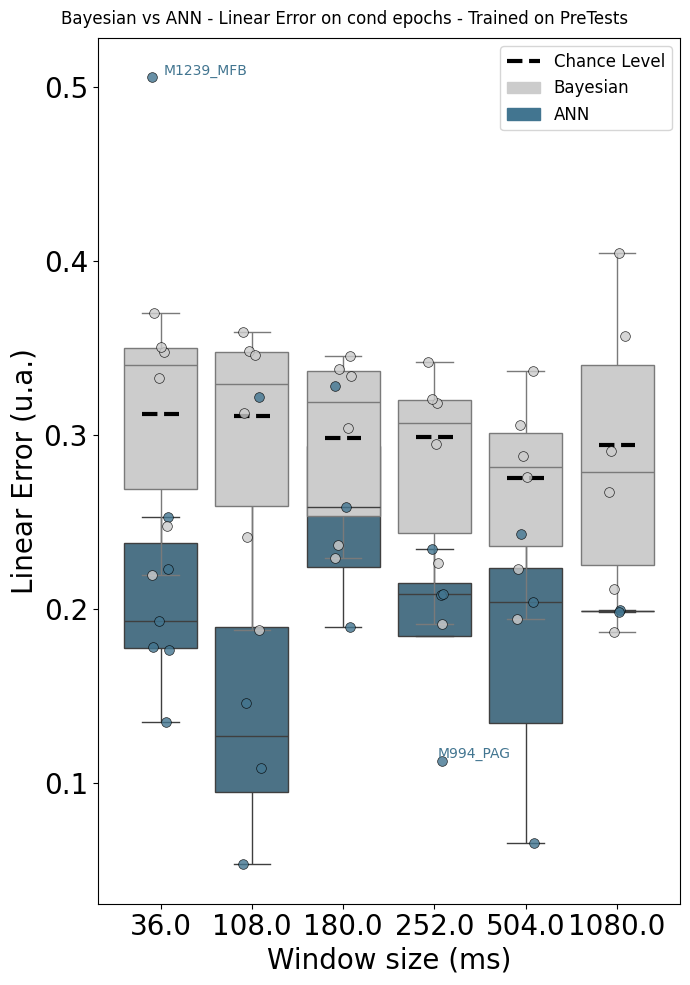

In [47]:
from idna import decode
from statannotations.Annotator import Annotator
from matplotlib.cbook import boxplot_stats

fig, ax = plt.subplots(1, 1, figsize=(7, 10))
order = ["preNoHab", "pre", "hab", session, "post", "all"]
hue_order = [True, False]
order = ["36.0", "108.0", "180.0", "252.0", "504.0", "1080.0"]
session = "cond"

sns.boxplot(
    data=results_df[(results_df.session == session)],
    x="winMS",
    y="select_lin",
    color="#427590",
    ax=ax,
    legend="auto",
    order=order,
    showfliers=False,
)
sns.boxplot(
    data=results_df[(results_df.session == session)],
    x="winMS",
    y="select_lin_bayes",
    color="#cccccc",
    ax=ax,
    order=order,
    showfliers=False,
)

# make the points bigger and surrounded by a black circle
sns.stripplot(
    data=results_df[(results_df.session == session)],
    x="winMS",
    y="select_lin",
    color="#427590",
    ax=ax,
    legend="auto",
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5,
    size=7,
    order=order,
)
sns.stripplot(
    data=results_df[(results_df.session == session)],
    x="winMS",
    y="select_lin_bayes",
    color="#cccccc",
    ax=ax,
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5,
    size=7,
    order=order,
)

# label outliers
for decoder_type in ["ANN", "Bayes"]:
    metric = "select_lin" if decoder_type == "ANN" else "select_lin_bayes"
    outliers_df = pd.DataFrame(columns=["winMS", "mouse", metric])
    color = "#427590" if decoder_type == "ANN" else "#cccccc"
    for winMS in results_df["winMS"].unique():
        outliers = [
            y
            for stat in boxplot_stats(
                results_df[
                    (results_df["winMS"] == winMS) & (results_df.session == session)
                ][metric].dropna()
            )
            for y in stat["fliers"]
        ]
        if outliers != []:
            for outlier in outliers:
                outliers_df = pd.concat(
                    [
                        outliers_df,
                        (
                            results_df[
                                (results_df["winMS"] == winMS)
                                & (results_df[metric] == outlier)
                                & (results_df.session == session)
                            ][["winMS", "mouse", metric]]
                        ),
                    ]
                )
    for row in outliers_df.iterrows():
        x = order.index(row[1]["winMS"])
        sign = +1 if decoder_type == "ANN" else -1
        ax.annotate(
            row[1]["mouse"],
            xy=(x, row[1][metric]),
            xytext=(2 * sign, 2 * sign),
            textcoords="offset points",
            fontsize=10,
            color=color,
        )

# for eahc boxplot, add the chance level
for i, winMS in enumerate(win_values):
    ax.plot(
        [i - 0.2, i + 0.2],
        [chance_level[str(winMS)], chance_level[str(winMS)]],
        color="black",
        linestyle="--",
        linewidth=3,
        label="chance level",
    )

# add the legend

from matplotlib.lines import Line2D
from matplotlib.patches import Patch

legend_elements = [
    Line2D([0], [0], linestyle="--", color="black", lw=3, label="Chance Level"),
    Patch(facecolor="#cccccc", edgecolor="#cccccc", label="Bayesian"),
    Patch(facecolor="#427590", edgecolor="#427590", label="ANN"),
]

ax.legend(handles=legend_elements, loc="best", fontsize=12)
fig.suptitle(
    f"Bayesian vs ANN - Linear Error on {session} epochs - Trained on PreTests"
)

# make ticks bigger
ax.tick_params(axis="both", which="major", labelsize=20)
# make labels bigger
ax.set_xlabel("Window size (ms)", fontsize=20)
ax.set_ylabel("Linear Error (u.a.)", fontsize=20)
# make the legend bigger
fig.tight_layout()
plt.show()

/tmp/ipykernel_647624/1797727511.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers_df = pd.concat([outliers_df, (results_df[(results_df.mouse != "M1199_reversal") &  (results_df['winMS'] == winMS) &


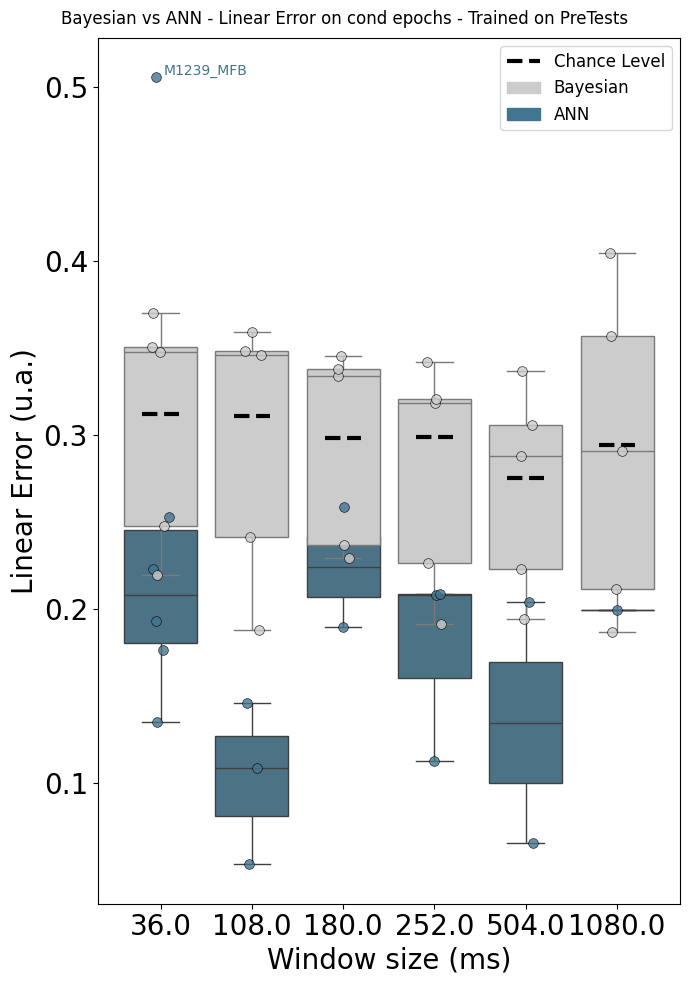

In [48]:
from statannotations.Annotator import Annotator

fig, ax = plt.subplots(1, 1, figsize=(7, 10))
order = ["preNoHab", "pre", "hab", session, "post", "all"]
order = ["36.0", "108.0", "180.0", "252.0", "504.0", "1080.0"]

hue_order = [True, False]
session = session

sns.boxplot(
    data=results_df[
        (results_df.mouse != "M1199_reversal") & (results_df.session == session)
    ],
    x="winMS",
    y="select_lin",
    color="#427590",
    ax=ax,
    legend="auto",
    showfliers=False,
    order=order,
)
sns.boxplot(
    data=results_df[
        (results_df.mouse != "M1199_reversal") & (results_df.session == session)
    ],
    x="winMS",
    y="select_lin_bayes",
    color="#cccccc",
    ax=ax,
    showfliers=False,
    order=order,
)

# make the points bigger and surrounded by a black circle
sns.stripplot(
    data=results_df[
        (results_df.mouse != "M1199_reversal") & (results_df.session == session)
    ],
    x="winMS",
    y="select_lin",
    color="#427590",
    ax=ax,
    legend="auto",
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5,
    size=7,
    order=order,
)
sns.stripplot(
    data=results_df[
        (results_df.mouse != "M1199_reversal") & (results_df.session == session)
    ],
    x="winMS",
    y="select_lin_bayes",
    color="#cccccc",
    ax=ax,
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5,
    size=7,
    order=order,
)

# label outliers
for decoder_type in ["ANN", "Bayes"]:
    metric = "select_lin" if decoder_type == "ANN" else "select_lin_bayes"
    outliers_df = pd.DataFrame(columns=["winMS", "mouse", metric])
    color = "#427590" if decoder_type == "ANN" else "#cccccc"
    for winMS in results_df["winMS"].unique():
        outliers = [
            y
            for stat in boxplot_stats(
                results_df[
                    (results_df.mouse != "M1199_reversal")
                    & (results_df["winMS"] == winMS)
                    & (results_df.session == session)
                ][metric].dropna()
            )
            for y in stat["fliers"]
        ]
        if outliers != []:
            for outlier in outliers:
                outliers_df = pd.concat(
                    [
                        outliers_df,
                        (
                            results_df[
                                (results_df.mouse != "M1199_reversal")
                                & (results_df["winMS"] == winMS)
                                & (results_df[metric] == outlier)
                                & (results_df.session == session)
                            ][["winMS", "mouse", metric]]
                        ),
                    ]
                )
    for row in outliers_df.iterrows():
        x = order.index(row[1]["winMS"])
        sign = +1 if decoder_type == "ANN" else -1
        ax.annotate(
            row[1]["mouse"],
            xy=(x, row[1][metric]),
            xytext=(2 * sign, 2 * sign),
            textcoords="offset points",
            fontsize=10,
            color=color,
        )

# for eahc boxplot, add the chance level
for i, winMS in enumerate(win_values):
    ax.plot(
        [i - 0.2, i + 0.2],
        [chance_level[str(winMS)], chance_level[str(winMS)]],
        color="black",
        linestyle="--",
        linewidth=3,
        label="chance level",
    )

# add the legend

from matplotlib.lines import Line2D
from matplotlib.patches import Patch

legend_elements = [
    Line2D([0], [0], linestyle="--", color="black", lw=3, label="Chance Level"),
    Patch(facecolor="#cccccc", edgecolor="#cccccc", label="Bayesian"),
    Patch(facecolor="#427590", edgecolor="#427590", label="ANN"),
]

ax.legend(handles=legend_elements, loc="best", fontsize=12)
fig.suptitle(
    f"Bayesian vs ANN - Linear Error on {session} epochs - Trained on PreTests"
)

# make ticks bigger
ax.tick_params(axis="both", which="major", labelsize=20)
# make labels bigger
ax.set_xlabel("Window size (ms)", fontsize=20)
ax.set_ylabel("Linear Error (u.a.)", fontsize=20)
# make the legend bigger
fig.tight_layout()
plt.show()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. hab: Mann-Whitney-Wilcoxon test two-sided, P_val:3.939e-01 U_stat=2.400e+01
pre vs. cond: Mann-Whitney-Wilcoxon test two-sided, P_val:4.329e-03 U_stat=1.000e+00
hab vs. post: Mann-Whitney-Wilcoxon test two-sided, P_val:2.165e-03 U_stat=0.000e+00
pre vs. post: Mann-Whitney-Wilcoxon test two-sided, P_val:2.165e-03 U_stat=0.000e+00


/tmp/ipykernel_647624/2434255070.py:46: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers_df = pd.concat([outliers_df, (results_df[(results_df.mouse != "M1199_reversal") &


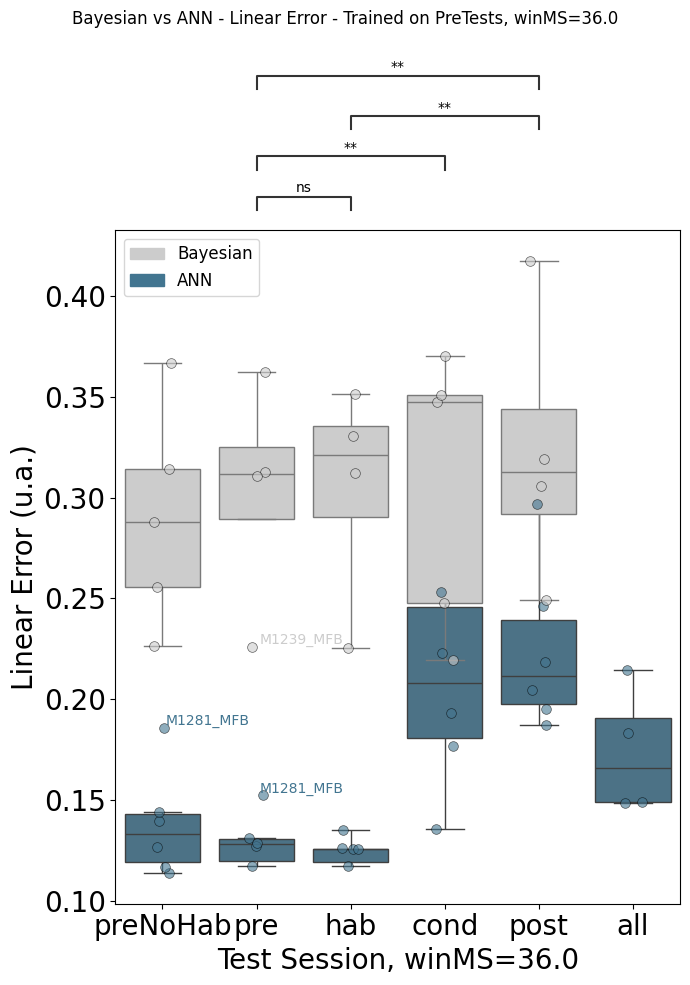

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. hab: Mann-Whitney-Wilcoxon test two-sided, P_val:4.000e-01 U_stat=7.000e+00
pre vs. cond: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e-01 U_stat=0.000e+00
hab vs. post: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e-01 U_stat=0.000e+00
pre vs. post: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e-01 U_stat=0.000e+00


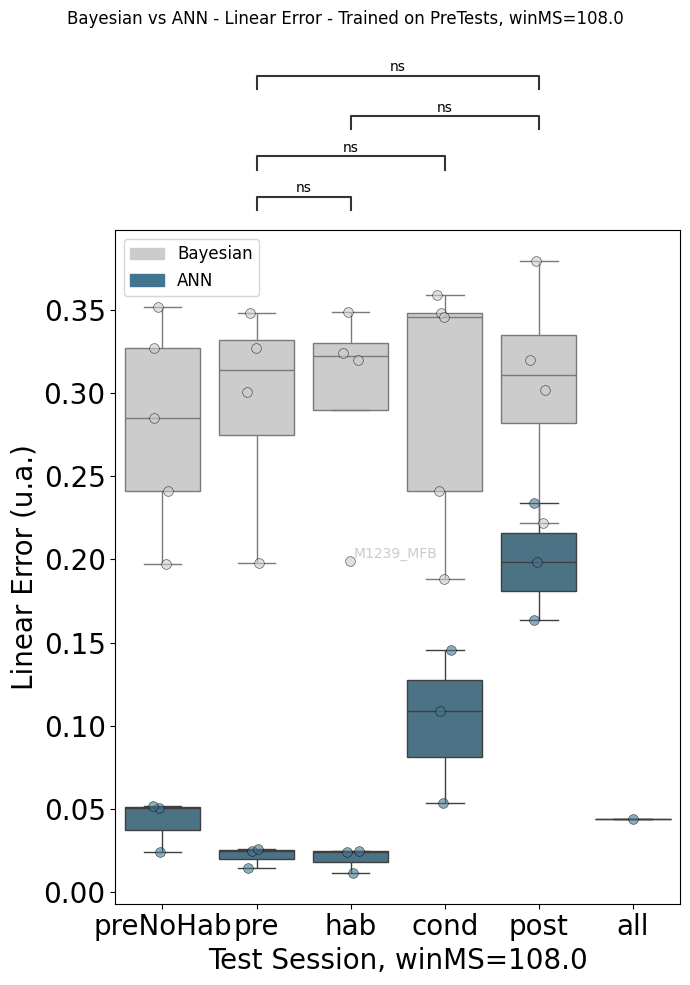

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. hab: Mann-Whitney-Wilcoxon test two-sided, P_val:6.667e-01 U_stat=3.000e+00
pre vs. cond: Mann-Whitney-Wilcoxon test two-sided, P_val:3.333e-01 U_stat=0.000e+00
hab vs. post: Mann-Whitney-Wilcoxon test two-sided, P_val:3.333e-01 U_stat=0.000e+00
pre vs. post: Mann-Whitney-Wilcoxon test two-sided, P_val:3.333e-01 U_stat=0.000e+00


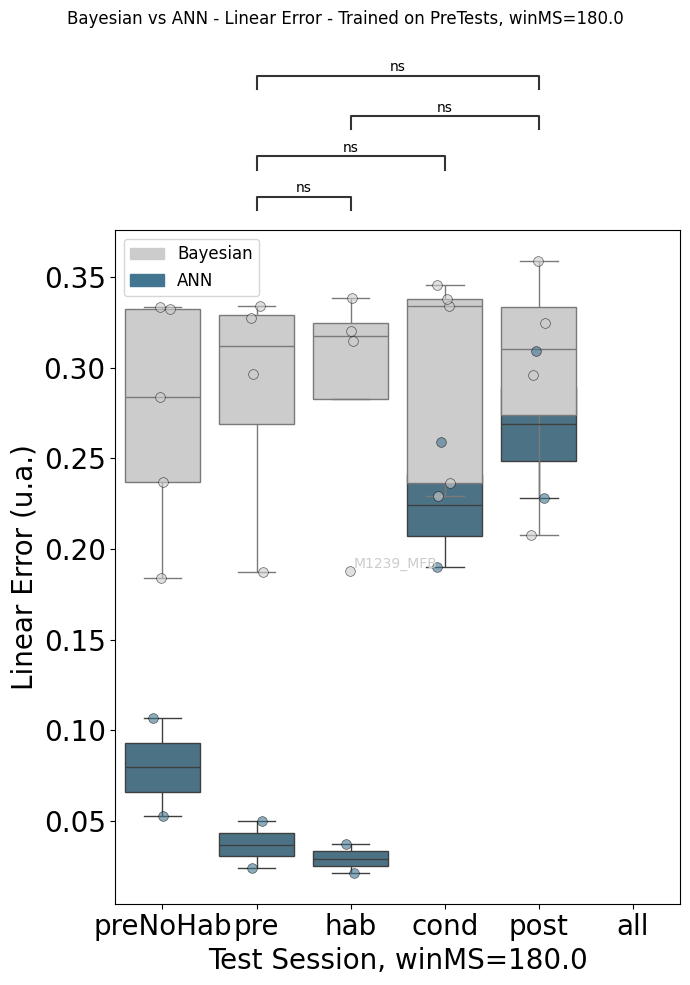

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. hab: Mann-Whitney-Wilcoxon test two-sided, P_val:7.000e-01 U_stat=6.000e+00
pre vs. cond: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e-01 U_stat=0.000e+00
hab vs. post: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e-01 U_stat=0.000e+00
pre vs. post: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e-01 U_stat=0.000e+00


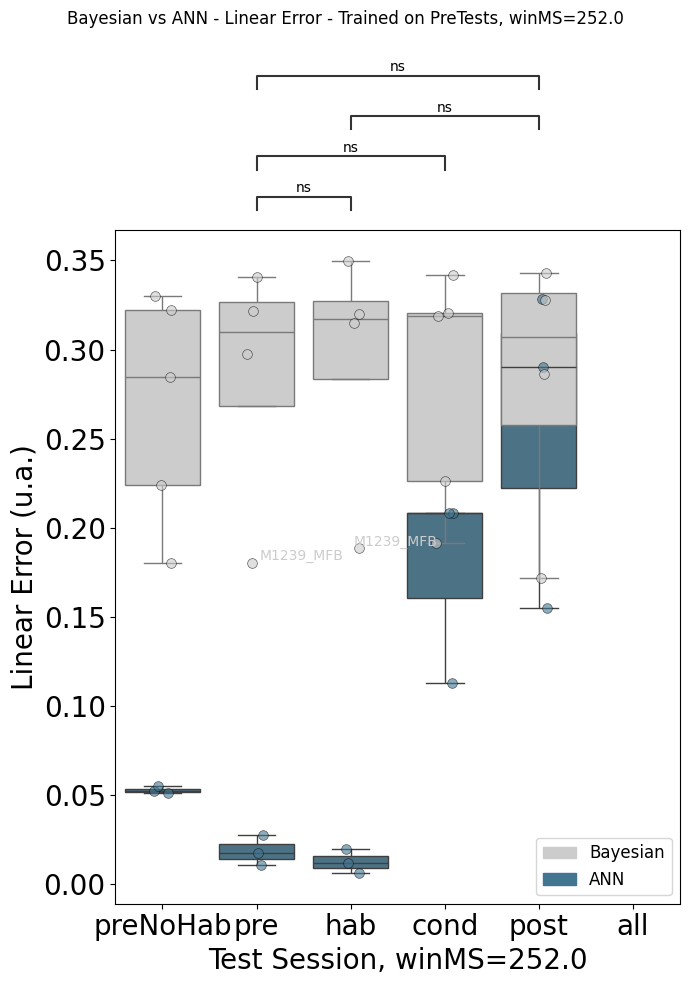

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. hab: Mann-Whitney-Wilcoxon test two-sided, P_val:3.333e-01 U_stat=4.000e+00
pre vs. cond: Mann-Whitney-Wilcoxon test two-sided, P_val:3.333e-01 U_stat=0.000e+00
hab vs. post: Mann-Whitney-Wilcoxon test two-sided, P_val:3.333e-01 U_stat=0.000e+00
pre vs. post: Mann-Whitney-Wilcoxon test two-sided, P_val:3.333e-01 U_stat=0.000e+00


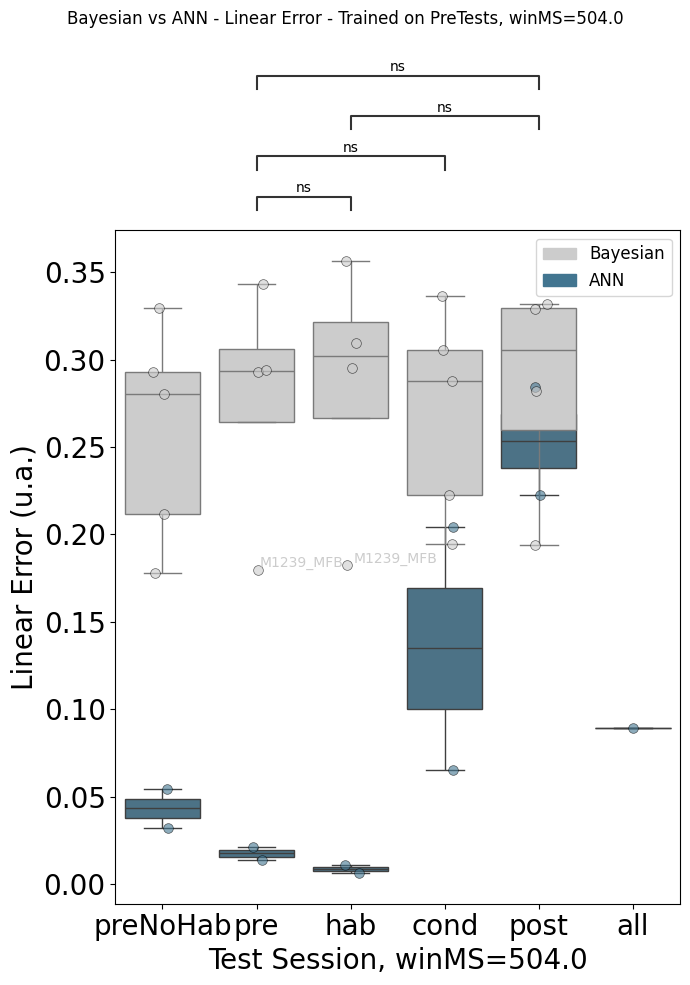

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. hab: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=1.000e+00
pre vs. cond: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=0.000e+00
hab vs. post: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=0.000e+00
pre vs. post: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=0.000e+00


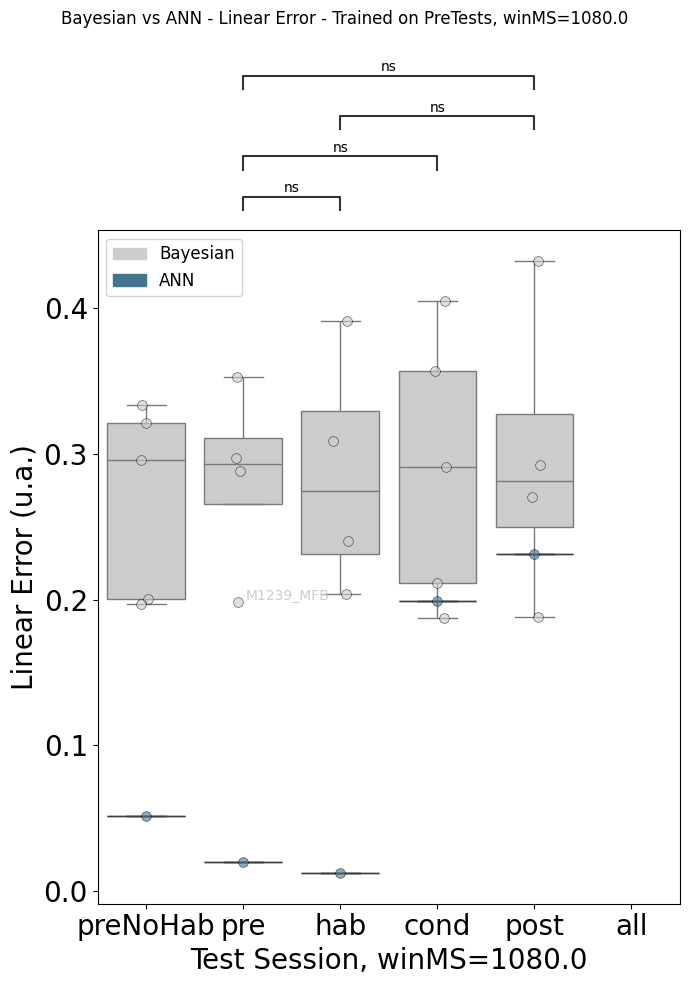

In [49]:
from statannotations.Annotator import Annotator

for i, winMS in enumerate(win_values):
    fig, ax = plt.subplots(1, 1, figsize=(7, 10))
    order = ["preNoHab", "pre", "hab", "cond", "post", "all"]

    sns.boxplot(
        data=results_df[
            (results_df.mouse != "M1199_reversal") & (results_df.winMS == str(winMS))
        ],
        x="session",
        y="select_lin",
        color="#427590",
        ax=ax,
        order=order,
        showfliers=False,
    )
    sns.boxplot(
        data=results_df[
            (results_df.mouse != "M1199_reversal") & (results_df.winMS == str(winMS))
        ],
        x="session",
        y="select_lin_bayes",
        color="#cccccc",
        ax=ax,
        order=order,
        showfliers=False,
    )

    pairs = [("pre", "hab"), ("pre", "post"), ("pre", "cond"), ("hab", "post")]

    annotator = Annotator(
        ax,
        pairs,
        data=results_df[
            (results_df.mouse != "M1199_reversal") & (results_df.winMS == str(winMS))
        ],
        x="session",
        y="select_lin",
        order=order,
    )
    annotator.configure(test="Mann-Whitney", text_format="star", loc="outside")
    annotator.apply_and_annotate()

    fig.suptitle("Linear error - AAN trained only on pre session (pre + hab)")
    ax.set_ylabel("Linear error")
    ax.set_xlabel("Session")

    sns.stripplot(
        x="session",
        y="select_lin",
        data=results_df[
            (results_df.mouse != "M1199_reversal") & (results_df.winMS == str(winMS))
        ],
        alpha=0.6,
        ax=ax,
        color="#427590",
        edgecolor="black",
        linewidth=0.5,
        size=7,
        order=order,
    )
    sns.stripplot(
        x="session",
        y="select_lin_bayes",
        data=results_df[
            (results_df.mouse != "M1199_reversal") & (results_df.winMS == str(winMS))
        ],
        alpha=0.6,
        ax=ax,
        color="#cccccc",
        edgecolor="black",
        linewidth=0.5,
        size=7,
        order=order,
    )

    # label outliers
    for decoder_type in ["ANN", "Bayes"]:
        metric = "select_lin" if decoder_type == "ANN" else "select_lin_bayes"
        outliers_df = pd.DataFrame(columns=["winMS", "mouse", metric])
        color = "#427590" if decoder_type == "ANN" else "#cccccc"
        for session in results_df["session"].unique():
            outliers = [
                y
                for stat in boxplot_stats(
                    results_df[
                        (results_df.mouse != "M1199_reversal")
                        & (results_df["winMS"] == str(winMS))
                        & (results_df.session == session)
                    ][metric].dropna()
                )
                for y in stat["fliers"]
            ]
            if outliers != []:
                for outlier in outliers:
                    outliers_df = pd.concat(
                        [
                            outliers_df,
                            (
                                results_df[
                                    (results_df.mouse != "M1199_reversal")
                                    & (results_df["winMS"] == str(winMS))
                                    & (results_df[metric] == outlier)
                                    & (results_df.session == session)
                                ][["winMS", "mouse", metric, "session"]]
                            ),
                        ]
                    )
        for row in outliers_df.iterrows():
            x = order.index(row[1]["session"])
            ax.annotate(
                row[1]["mouse"],
                xy=(x, row[1][metric]),
                xytext=(2, 2),
                textcoords="offset points",
                fontsize=10,
                color=color,
            )

    from matplotlib.patches import Patch

    legend_elements = [
        Patch(facecolor="#cccccc", edgecolor="#cccccc", label="Bayesian"),
        Patch(facecolor="#427590", edgecolor="#427590", label="ANN"),
    ]

    ax.legend(handles=legend_elements, loc="best", fontsize=12)
    fig.suptitle(f"Bayesian vs ANN - Linear Error - Trained on PreTests, {winMS=}")

    # make ticks bigger
    ax.tick_params(axis="both", which="major", labelsize=20)
    # make labels bigger
    ax.set_xlabel(f"Test Session, {winMS=}", fontsize=20)
    ax.set_ylabel("Linear Error (u.a.)", fontsize=20)
    fig.tight_layout()
    fig.savefig(
        os.path.join(
            "/home/mickey/Dropbox/Mobs_member/Theotime_De_Charrin/Presentation/figures",
            f"Bayesian_vs_ANN_linear_error_{winMS}.png",
        ),
        dpi=300,
    )
    plt.show()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. hab: Mann-Whitney-Wilcoxon test two-sided, P_val:3.348e-01 U_stat=1.730e+02
pre vs. cond: Mann-Whitney-Wilcoxon test two-sided, P_val:3.577e-05 U_stat=2.400e+01
hab vs. post: Mann-Whitney-Wilcoxon test two-sided, P_val:7.054e-07 U_stat=0.000e+00
pre vs. post: Mann-Whitney-Wilcoxon test two-sided, P_val:7.054e-07 U_stat=0.000e+00


/tmp/ipykernel_647624/1021248748.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers_df = pd.concat([outliers_df, (results_df[(results_df.mouse != "M1199_reversal") &


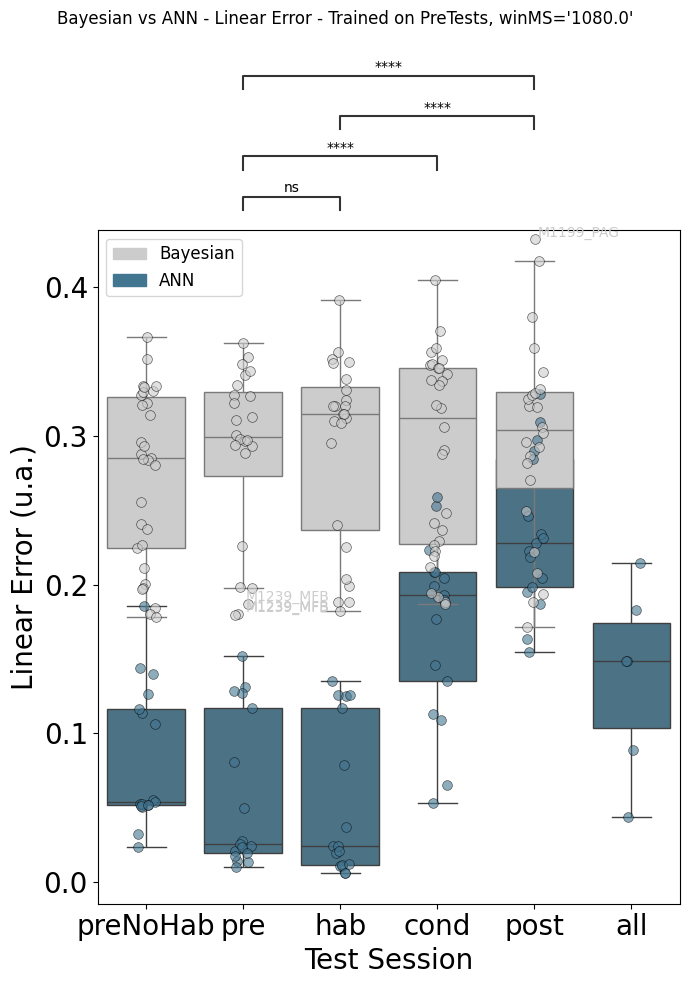

In [56]:
from statannotations.Annotator import Annotator

fig, ax = plt.subplots(1, 1, figsize=(7, 10))
order = ["preNoHab", "pre", "hab", "cond", "post", "all"]

sns.boxplot(
    data=results_df[(results_df.mouse != "M1199_reversal")],
    x="session",
    y="select_lin",
    color="#427590",
    ax=ax,
    order=order,
    showfliers=False,
)
sns.boxplot(
    data=results_df[(results_df.mouse != "M1199_reversal")],
    x="session",
    y="select_lin_bayes",
    color="#cccccc",
    ax=ax,
    order=order,
    showfliers=False,
)


pairs = [("pre", "hab"), ("pre", "post"), ("pre", "cond"), ("hab", "post")]

annotator = Annotator(
    ax,
    pairs,
    data=results_df[(results_df.mouse != "M1199_reversal")],
    x="session",
    y="select_lin",
    order=order,
)
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside")
annotator.apply_and_annotate()

fig.suptitle("Linear error - AAN trained only on pre session (pre + hab)")
ax.set_ylabel("Linear error")
ax.set_xlabel("Session")

sns.stripplot(
    x="session",
    y="select_lin",
    data=results_df[(results_df.mouse != "M1199_reversal")],
    alpha=0.6,
    ax=ax,
    color="#427590",
    edgecolor="black",
    linewidth=0.5,
    size=7,
    order=order,
)
sns.stripplot(
    x="session",
    y="select_lin_bayes",
    data=results_df[(results_df.mouse != "M1199_reversal")],
    alpha=0.6,
    ax=ax,
    color="#cccccc",
    edgecolor="black",
    linewidth=0.5,
    size=7,
    order=order,
)

# label outliers
for decoder_type in ["ANN", "Bayes"]:
    metric = "select_lin" if decoder_type == "ANN" else "select_lin_bayes"
    outliers_df = pd.DataFrame(columns=["winMS", "mouse", metric])
    color = "#427590" if decoder_type == "ANN" else "#cccccc"
    for session in results_df["session"].unique():
        outliers = [
            y
            for stat in boxplot_stats(
                results_df[
                    (results_df.mouse != "M1199_reversal")
                    & (results_df.session == session)
                ][metric].dropna()
            )
            for y in stat["fliers"]
        ]
        if outliers != []:
            for outlier in outliers:
                outliers_df = pd.concat(
                    [
                        outliers_df,
                        (
                            results_df[
                                (results_df.mouse != "M1199_reversal")
                                & (results_df[metric] == outlier)
                                & (results_df.session == session)
                            ][["winMS", "mouse", metric, "session"]]
                        ),
                    ]
                )
    for row in outliers_df.iterrows():
        x = order.index(row[1]["session"])
        ax.annotate(
            row[1]["mouse"],
            xy=(x, row[1][metric]),
            xytext=(2, 2),
            textcoords="offset points",
            fontsize=10,
            color=color,
        )

from matplotlib.patches import Patch

legend_elements = [
    Patch(facecolor="#cccccc", edgecolor="#cccccc", label="Bayesian"),
    Patch(facecolor="#427590", edgecolor="#427590", label="ANN"),
]

ax.legend(handles=legend_elements, loc="best", fontsize=12)
fig.suptitle(f"Bayesian vs ANN - Linear Error - Trained on PreTests, {winMS=}")

# make ticks bigger
ax.tick_params(axis="both", which="major", labelsize=20)
# make labels bigger
ax.set_xlabel(f"Test Session", fontsize=20)
ax.set_ylabel("Linear Error (u.a.)", fontsize=20)
fig.tight_layout()
fig.savefig(
    os.path.join(
        "/home/mickey/Dropbox/Mobs_member/Theotime_De_Charrin/Presentation/figures",
        f"BasileBoxPlot.png",
    ),
    dpi=300,
)
plt.show()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre_True vs. pre_False: Mann-Whitney-Wilcoxon test two-sided, P_val:8.577e-01 U_stat=4.500e+01
hab_True vs. hab_False: Mann-Whitney-Wilcoxon test two-sided, P_val:8.019e-01 U_stat=5.200e+01
cond_True vs. cond_False: Mann-Whitney-Wilcoxon test two-sided, P_val:2.377e-04 U_stat=4.000e+00
post_True vs. post_False: Mann-Whitney-Wilcoxon test two-sided, P_val:5.093e-04 U_stat=5.000e+00
all_True vs. all_False: Mann-Whitney-Wilcoxon test two-sided, P_val:6.828e-01 U_stat=1.300e+01
pre_True vs. cond_False: Mann-Whitney-Wilcoxon test two-sided, P_val:1.981e-05 U_stat=0.000e+00
pre_True vs. post_False: Mann-Whitney-Wilcoxon test two-sided, P_val:2.680e-05 U_stat=0.000e+00


/tmp/ipykernel_647624/720876101.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers_df = pd.concat([outliers_df, (results_df[(results_df.mouse != "M1199_reversal") &


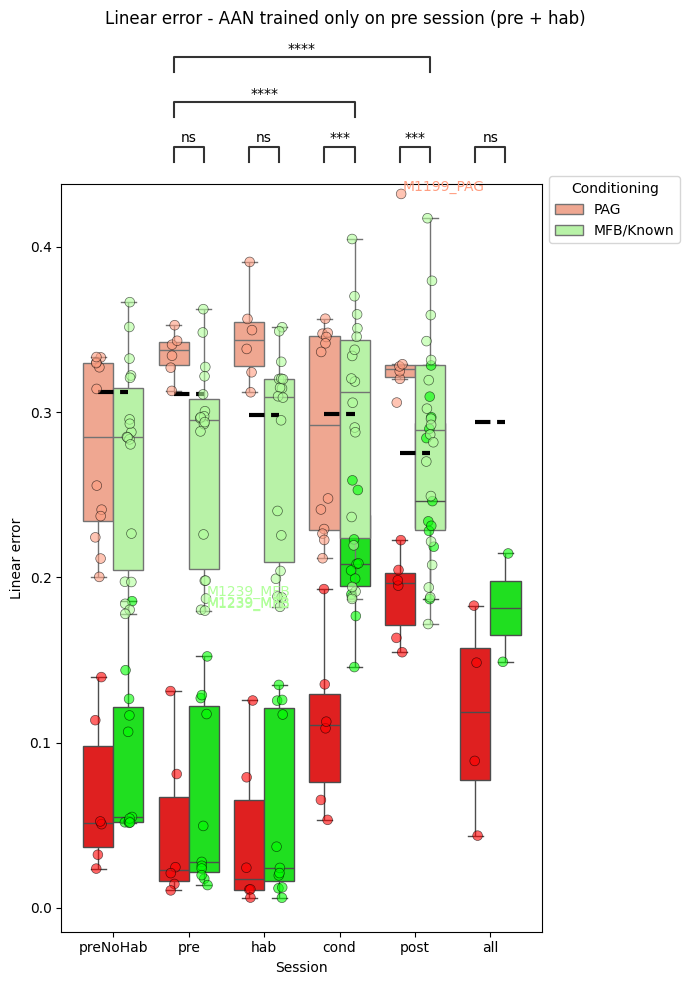

In [51]:
from statannotations.Annotator import Annotator

fig, ax = plt.subplots(1, 1, figsize=(7, 10))
order = ["preNoHab", "pre", "hab", "cond", "post", "all"]
hue_order = [True, False]

sns.boxplot(
    data=results_df[results_df.mouse != "M1199_reversal"],
    x="session",
    y="select_lin",
    hue="isPAG",
    dodge=True,
    palette=["#FF0000", "#00FF00"],
    ax=ax,
    order=order,
    hue_order=hue_order,
    showfliers=False,
)

sns.boxplot(
    data=results_df[results_df.mouse != "M1199_reversal"],
    x="session",
    y="select_lin_bayes",
    hue="isPAG",
    dodge=True,
    palette=["#ff9e81", "#b1ff9a"],
    ax=ax,
    order=order,
    hue_order=hue_order,
    showfliers=False,
)


# pairs=[("pre", "hab"), ("pre", "post"), ("pre", "cond"), (("pre", "1"), ("pre", "0"))]
pairs = [
    (("pre", True), ("pre", False)),
    (("hab", True), ("hab", False)),
    (("cond", True), ("cond", False)),
    (("post", True), ("post", False)),
    (("all", True), ("all", False)),
    (("pre", True), ("cond", False)),
    (("pre", True), ("post", False)),
]


annotator = Annotator(
    ax,
    pairs,
    data=results_df[results_df.mouse != "M1199_reveral"],
    x="session",
    y="select_lin",
    hue="isPAG",
    order=order,
    hue_order=hue_order,
)
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside")
annotator.apply_and_annotate()

fig.suptitle("Linear error - AAN trained only on pre session (pre + hab)")
ax.set_ylabel("Linear error")
ax.set_xlabel("Session")

sns.stripplot(
    x="session",
    y="select_lin",
    data=results_df[results_df.mouse != "M1199_reversal"],
    dodge=True,
    alpha=0.6,
    ax=ax,
    hue="isPAG",
    palette=["#FF0000", "#00FF00"],
    order=order,
    hue_order=hue_order,
    edgecolor="black",
    linewidth=0.5,
    size=7,
)
sns.stripplot(
    x="session",
    y="select_lin_bayes",
    data=results_df[results_df.mouse != "M1199_reversal"],
    dodge=True,
    alpha=0.6,
    ax=ax,
    hue="isPAG",
    palette=["#ff9e81", "#b1ff9a"],
    order=order,
    hue_order=hue_order,
    edgecolor="black",
    linewidth=0.5,
    size=7,
)

for decoder_type in ["ANN", "Bayes"]:
    metric = "select_lin" if decoder_type == "ANN" else "select_lin_bayes"
    outliers_df = pd.DataFrame(columns=["winMS", "mouse", metric])
    for session in results_df["session"].unique():
        outliers = [
            y
            for stat in boxplot_stats(
                results_df[
                    (results_df.mouse != "M1199_reversal")
                    & (results_df.session == session)
                ][metric].dropna()
            )
            for y in stat["fliers"]
        ]
        if outliers != []:
            for outlier in outliers:
                outliers_df = pd.concat(
                    [
                        outliers_df,
                        (
                            results_df[
                                (results_df.mouse != "M1199_reversal")
                                & (results_df[metric] == outlier)
                                & (results_df.session == session)
                            ][["winMS", "mouse", metric, "session"]]
                        ),
                    ]
                )
    for row in outliers_df.iterrows():
        x = order.index(row[1]["session"])
        if "MFB" in row[1]["mouse"] or "Known" in row[1]["mouse"]:
            color = "#00FF00" if decoder_type == "ANN" else "#b1ff9a"
            offset = 0.2
        else:
            color = "#FF0000" if decoder_type == "ANN" else "#ff9e81"
            offset = -0.2
        ax.annotate(
            row[1]["mouse"],
            xy=(x + offset, row[1][metric]),
            xytext=(2, 2),
            textcoords="offset points",
            fontsize=10,
            color=color,
        )


# remove extra legend handles
for i, winMS in enumerate(win_values):
    ax.plot(
        [i - 0.2, i + 0.2],
        [chance_level[str(winMS)], chance_level[str(winMS)]],
        color="black",
        linestyle="--",
        linewidth=3,
        label="chance level",
    )

handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles[2:],
    ["PAG", "MFB/Known"],
    title="Conditioning",
    bbox_to_anchor=(1, 1.02),
    loc="best",
)


fig.tight_layout()
plt.show()

In [52]:
results_df.mouse.unique()

array(['M1199_PAG', 'M994_PAG', 'M1336_known', 'M1281_MFB', 'M1336_MFB',
       'M1239_MFB', 'M1199_reversal'], dtype=object)

In [53]:
# add new column for conditioning type in results_df
results_df["cond_type"] = "MFB/Known"
results_df.loc[results_df["isPAG"] == True, "cond_type"] = "PAG"
# reversal gets its own column
results_df.loc[results_df["mouse"] == "M1199_reversal", "cond_type"] = "Reversal"

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre_PAG vs. pre_MFB/Known: Mann-Whitney-Wilcoxon test two-sided, P_val:4.623e-01 U_stat=2.500e+01
hab_PAG vs. hab_MFB/Known: Mann-Whitney-Wilcoxon test two-sided, P_val:4.623e-01 U_stat=2.500e+01
cond_PAG vs. cond_MFB/Known: Mann-Whitney-Wilcoxon test two-sided, P_val:1.131e-03 U_stat=3.000e+00
post_PAG vs. post_MFB/Known: Mann-Whitney-Wilcoxon test two-sided, P_val:3.070e-03 U_stat=5.000e+00
all_PAG vs. all_MFB/Known: Mann-Whitney-Wilcoxon test two-sided, P_val:2.667e-01 U_stat=1.000e+00
pre_MFB/Known vs. cond_PAG: Mann-Whitney-Wilcoxon test two-sided, P_val:1.215e-01 U_stat=1.700e+01
pre_MFB/Known vs. post_PAG: Mann-Whitney-Wilcoxon test two-sided, P_val:1.616e-04 U_stat=0.000e+00


/tmp/ipykernel_647624/2514670917.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers_df = pd.concat([outliers_df, (results_df[(results_df[metric] == outlier)


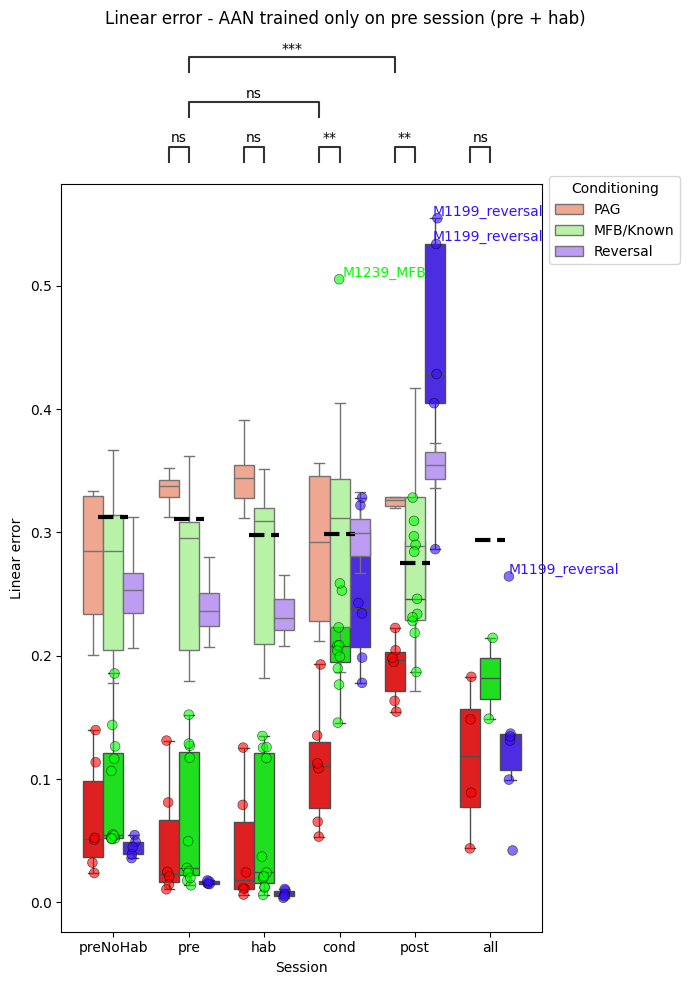

In [54]:
from statannotations.Annotator import Annotator

fig, ax = plt.subplots(1, 1, figsize=(7, 10))
order = ["preNoHab", "pre", "hab", "cond", "post", "all"]
hue_order = ["PAG", "MFB/Known", "Reversal"]

sns.boxplot(
    data=results_df,
    x="session",
    y="select_lin",
    hue="cond_type",
    dodge=True,
    palette=["#FF0000", "#00FF00", "#380fff"],
    ax=ax,
    order=order,
    hue_order=hue_order,
    showfliers=False,
)

sns.boxplot(
    data=results_df,
    x="session",
    y="select_lin_bayes",
    hue="cond_type",
    dodge=True,
    palette=["#ff9e81", "#b1ff9a", "#b88fff"],
    ax=ax,
    order=order,
    hue_order=hue_order,
    showfliers=False,
)


# pairs=[("pre", "hab"), ("pre", "post"), ("pre", "cond"), (("pre", "1"), ("pre", "0"))]
pairs = [
    (("pre", True), ("pre", False)),
    (("hab", True), ("hab", False)),
    (("cond", True), ("cond", False)),
    (("post", True), ("post", False)),
    (("all", True), ("all", False)),
    (("pre", True), ("cond", False)),
    (("pre", True), ("post", False)),
]

pairs = [
    (("pre", "MFB/Known"), ("pre", "PAG")),
    (("hab", "MFB/Known"), ("hab", "PAG")),
    (("cond", "MFB/Known"), ("cond", "PAG")),
    (("post", "MFB/Known"), ("post", "PAG")),
    (("all", "MFB/Known"), ("all", "PAG")),
    (("pre", "MFB/Known"), ("cond", "PAG")),
    (("pre", "MFB/Known"), ("post", "PAG")),
]


annotator = Annotator(
    ax,
    pairs,
    data=results_df,
    x="session",
    y="select_lin",
    hue="cond_type",
    order=order,
    hue_order=hue_order,
)
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside")
annotator.apply_and_annotate()

fig.suptitle("Linear error - AAN trained only on pre session (pre + hab)")
ax.set_ylabel("Linear error")
ax.set_xlabel("Session")

sns.stripplot(
    x="session",
    y="select_lin",
    data=results_df,
    dodge=True,
    alpha=0.6,
    ax=ax,
    hue="cond_type",
    palette=["#FF0000", "#00FF00", "#380fff"],
    order=order,
    hue_order=hue_order,
    edgecolor="black",
    linewidth=0.5,
    size=7,
)

for decoder_type in ["ANN"]:
    metric = "select_lin" if decoder_type == "ANN" else "select_lin_bayes"
    outliers_df = pd.DataFrame(columns=["winMS", "mouse", metric])
    for session in results_df["session"].unique():
        outliers = [
            y
            for stat in boxplot_stats(
                results_df[(results_df.session == session)][metric].dropna()
            )
            for y in stat["fliers"]
        ]
        if outliers != []:
            for outlier in outliers:
                outliers_df = pd.concat(
                    [
                        outliers_df,
                        (
                            results_df[
                                (results_df[metric] == outlier)
                                & (results_df.session == session)
                            ][["winMS", "mouse", metric, "session"]]
                        ),
                    ]
                )
    for row in outliers_df.iterrows():
        x = order.index(row[1]["session"])
        if "MFB" in row[1]["mouse"] or "Known" in row[1]["mouse"]:
            color = "#00FF00" if decoder_type == "ANN" else "#b1ff9a"
            offset = 0
        elif "reversal" in row[1]["mouse"]:
            color = "#380fff" if decoder_type == "ANN" else "#b88fff"
            offset = 0.2
        elif "PAG" in row[1]["mouse"]:
            color = "#FF0000" if decoder_type == "ANN" else "#ff9e81"
            offset = -0.2
        else:
            print("idg it")
        ax.annotate(
            row[1]["mouse"],
            xy=(x + offset, row[1][metric]),
            xytext=(2, 2),
            textcoords="offset points",
            fontsize=10,
            color=color,
        )

# remove extra legend handles
for i, winMS in enumerate(win_values):
    ax.plot(
        [i - 0.2, i + 0.2],
        [chance_level[str(winMS)], chance_level[str(winMS)]],
        color="black",
        linestyle="--",
        linewidth=3,
        label="chance level",
    )

handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles[3:], hue_order, title="Conditioning", bbox_to_anchor=(1, 1.02), loc="best"
)


fig.tight_layout()
plt.show()

In [55]:
# for mouse, winMS, session in results_df, if mean_eucl is not None compute the bayes test
from epochs_management import inEpochs

reload(BayesTraining)
reload(print_results)
for mouse in todo_df.mouse.unique():
    if mouse != "M1199_reversal":
        continue
    bayesMatrices = None
    BayesTrainer = None
    for i, winMS in enumerate(win_values):
        winMS = str(winMS)
        for session in sessions:
            if session == "all":
                continue
            row = results_df[
                (results_df["mouse"] == mouse)
                & (results_df["winMS"] == winMS)
                & (results_df["session"] == session)
            ].iloc[0]
            if row["mean_eucl"] is not None and row["mean_lin_bayes"] is None:
                # Compute the bayes test here
                try:
                    if bayesMatrices is None:
                        with open(
                            os.path.join(
                                Parameters[mouse][winMS][session].resultsPath,
                                "..",
                                "bayesMatrices.pkl",
                            ),
                            "rb",
                        ) as f:
                            bayesMatrices = pickle.load(f)
                            BayesTrainer = BayesTraining.Trainer(
                                ProjectPath[mouse][winMS][session]
                            )
                    timeStepPredTest = DataHelper[mouse][winMS][session].fullBehavior[
                        "positionTime"
                    ][
                        inEpochs(
                            DataHelper[mouse][winMS][session].fullBehavior[
                                "positionTime"
                            ][:, 0],
                            DataHelper[mouse][winMS][session].fullBehavior["Times"][
                                "testEpochs"
                            ],
                        )
                    ]
                    timeStepPredTrain = DataHelper[mouse][winMS][session].fullBehavior[
                        "positionTime"
                    ][
                        inEpochs(
                            DataHelper[mouse][winMS][session].fullBehavior[
                                "positionTime"
                            ][:, 0],
                            DataHelper[mouse][winMS][session].fullBehavior["Times"][
                                "trainEpochs"
                            ],
                        )
                    ]
                    timeStepPred = np.sort(
                        np.concatenate((timeStepPredTrain, timeStepPredTest), axis=0)
                    )
                    outputs = BayesTrainer.test_as_NN(
                        DataHelper[mouse][winMS][session].fullBehavior,
                        bayesMatrices,
                        timeStepPred,
                        windowSizeMS=int(win_values[i]),
                        useTrain=True,
                        l_function=l_function[mouse][session],
                    )
                    (
                        mean_eucl_bayes,
                        select_eucl_bayes,
                        mean_lin_bayes,
                        select_lin_bayes,
                    ) = print_results.print_results(
                        BayesTrainer.folderResult,
                        typeDec="bayes",
                        results=outputs,
                        windowSizeMS=int(win_values[i]),
                        show=False,
                        force=True,
                        lossSelection=0.1,
                        euclidean=False,
                        target=target,
                        phase=session,
                    )
                    # Save the results to the DataFrame
                    results_df.loc[
                        (results_df["mouse"] == mouse)
                        & (results_df["winMS"] == winMS)
                        & (results_df["session"] == session),
                        "mean_eucl_bayes",
                    ] = mean_eucl_bayes
                    results_df.loc[
                        (results_df["mouse"] == mouse)
                        & (results_df["winMS"] == winMS)
                        & (results_df["session"] == session),
                        "select_eucl_bayes",
                    ] = select_eucl_bayes
                    results_df.loc[
                        (results_df["mouse"] == mouse)
                        & (results_df["winMS"] == winMS)
                        & (results_df["session"] == session),
                        "mean_lin_bayes",
                    ] = mean_lin_bayes
                    results_df.loc[
                        (results_df["mouse"] == mouse)
                        & (results_df["winMS"] == winMS)
                        & (results_df["session"] == session),
                        "select_lin_bayes",
                    ] = select_lin_bayes
                    # results_df.loc[(results_df['mouse'] == mouse) & (results_df['winMS'] == winMS) & (results_df['session'] == session), 'BayesTrainer'] = BayesTrainer
                except Exception as e:
                    print(
                        f"ouin ouin no bayes trainer found for {Parameters[mouse][winMS][session].resultsPath}"
                    )
                    traceback.print_exc()
            else:
                print("i dont get it")
    bayesMatrices = None
    BayesTrainer = None

i dont get it
i dont get it
i dont get it
i dont get it
i dont get it
i dont get it
i dont get it
i dont get it
i dont get it
i dont get it
i dont get it
i dont get it
i dont get it
i dont get it
i dont get it
i dont get it
i dont get it
i dont get it
i dont get it
i dont get it
i dont get it
i dont get it
i dont get it
i dont get it
i dont get it
i dont get it
i dont get it
i dont get it
i dont get it
i dont get it


In [159]:
# save df
results_df.to_pickle(
    os.path.join(current_dir, f"results_df{curr_day}wBayesMFB_chanceReversal.pkl")
)

In [156]:
results_df[(results_df["mouse"] == "M1199_reversal")]

mouse   winMS   session figures BayesTrainer bayesMatrices  \
216  M1199_reversal    36.0  preNoHab    None         None          None   
217  M1199_reversal    36.0       pre    None         None          None   
218  M1199_reversal    36.0       hab    None         None          None   
219  M1199_reversal    36.0      cond    None         None          None   
220  M1199_reversal    36.0      post    None         None          None   
221  M1199_reversal    36.0       all    None         None          None   
222  M1199_reversal   108.0  preNoHab    None         None          None   
223  M1199_reversal   108.0       pre    None         None          None   
224  M1199_reversal   108.0       hab    None         None          None   
225  M1199_reversal   108.0      cond    None         None          None   
226  M1199_reversal   108.0      post    None         None          None   
227  M1199_reversal   108.0       all    None         None          None   
228  M1199_reversal   180.0  preNoHab    None         None          None   
229  M1199_reversal   180.0       pre    None         None          None   
230  M1199_reversal   180.0       hab    None         None          None   
231  M1199_reversal   180.0      cond    None         None          None   
232  M1199_reversal   180.0      post    None         None          None   
233  M1199_reversal   180.0       all    None         None          None   
234  M1199_reversal   252.0  preNoHab    None         None          None   
235  M1199_reversal   252.0       pre    None         None          None   
236  M1199_reversal   252.0       hab    None         None          None   
237  M1199_reversal   252.0      cond    None         None          None   
238  M1199_reversal   252.0      post    None         None          None   
239  M1199_reversal   252.0       all    None         None          None   
240  M1199_reversal   504.0  preNoHab    None         None          None   
241  M1199_reversal   504.0       pre    None         None          None   
242  M1199_reversal   504.0       hab    None         None          None   
243  M1199_reversal   504.0      cond    None         None          None   
244  M1199_reversal   504.0      post    None         None          None   
245  M1199_reversal   504.0       all    None         None          None   
246  M1199_reversal  1080.0  preNoHab    None         None          None   
247  M1199_reversal  1080.0       pre    None         None          None   
248  M1199_reversal  1080.0       hab    None         None          None   
249  M1199_reversal  1080.0      cond    None         None          None   
250  M1199_reversal  1080.0      post    None         None          None   
251  M1199_reversal  1080.0       all    None         None          None   

                                            testOutput  mean_eucl  \
216  {'featurePred': [[0.41049516, 0.04848838], [0....   0.271924   
217  {'featurePred': [[0.39519608, 0.0], [0.4411886...   0.277564   
218  {'featurePred': [[0.39519608, 0.0], [0.4411886...   0.294681   
219  {'featurePred': [[0.4726375, 0.0], [0.3563193,...   0.212095   
220  {'featurePred': [[0.404445, 0.04800394], [0.40...   0.298697   
221  {'featurePred': [[0.39519608, 0.0], [0.4411886...   0.260305   
222  {'featurePred': [[0.0009556711, 0.059291452], ...   0.097721   
223  {'featurePred': [[0.38487783, 0.04508856], [0....   0.053801   
224  {'featurePred': [[0.38487783, 0.04508856], [0....   0.032190   
225  {'featurePred': [[0.53963417, 0.010001838], [0...   0.243758   
226  {'featurePred': [[0.06290102, 0.09187803], [0....   0.360341   
227  {'featurePred': [[0.38487783, 0.04508856], [0....   0.166128   
228  {'featurePred': [[0.0, 0.05528754], [0.0, 0.05...   0.109698   
229  {'featurePred': [[0.36264598, 0.07258353], [0....   0.060573   
230  {'featurePred': [[0.36264598, 0.07258353], [0....   0.036436   
231  {'featurePred': [[0.11980903, 0.045143783], [0...   0.238465   
232  {'featurePred': [[0.850

In [171]:
# for mouse, winMS, session in results_df, if mean_eucl is not None compute the bayes test
from epochs_management import inEpochs

reload(BayesTraining)
reload(print_results)
for mouse in mouse_list:
    if mouse != "M1199_PAG":
        continue
    bayesMatrices = None
    for i, winMS in enumerate(win_values):
        winMS = str(winMS)
        for session in sessions:
            # if row does not exist, create it,
            if results_df[
                (results_df["mouse"] == mouse)
                & (results_df["winMS"] == winMS)
                & (results_df["session"] == session)
            ].empty:
                results_df = pd.concat(
                    [
                        results_df,
                        pd.DataFrame(
                            [
                                {
                                    "mouse": mouse,
                                    "winMS": winMS,
                                    "session": session,
                                    "mean_eucl_bayes": None,
                                    "select_eucl_bayes": None,
                                    "mean_lin_bayes": None,
                                    "select_lin_bayes": None,
                                }
                            ]
                        ),
                    ],
                    ignore_index=True,
                )
            row = results_df[
                (results_df["mouse"] == mouse)
                & (results_df["winMS"] == winMS)
                & (results_df["session"] == session)
            ].iloc[0]
            if row["mean_lin_bayes"] is None or 1 == 1:
                # Compute the bayes test here
                try:
                    with open(
                        os.path.join(
                            Parameters[mouse][winMS][session].resultsPath,
                            "..",
                            "bayesMatrices.pkl",
                        ),
                        "rb",
                    ) as f:
                        bayesMatrices = pickle.load(f)

                    BayesTrainer = BayesTraining.Trainer(
                        ProjectPath[mouse][winMS][session]
                    )
                    timeStepPredTest = DataHelper[mouse][winMS][session].fullBehavior[
                        "positionTime"
                    ][
                        inEpochs(
                            DataHelper[mouse][winMS][session].fullBehavior[
                                "positionTime"
                            ][:, 0],
                            DataHelper[mouse][winMS][session].fullBehavior["Times"][
                                "testEpochs"
                            ],
                        )
                    ]
                    timeStepPredTrain = DataHelper[mouse][winMS][session].fullBehavior[
                        "positionTime"
                    ][
                        inEpochs(
                            DataHelper[mouse][winMS][session].fullBehavior[
                                "positionTime"
                            ][:, 0],
                            DataHelper[mouse][winMS][session].fullBehavior["Times"][
                                "trainEpochs"
                            ],
                        )
                    ]
                    timeStepPred = np.sort(
                        np.concatenate((timeStepPredTrain, timeStepPredTest), axis=0)
                    )
                    outputs = BayesTrainer.test_as_NN(
                        DataHelper[mouse][winMS][session].fullBehavior,
                        bayesMatrices,
                        timeStepPred,
                        windowSizeMS=int(win_values[i]),
                        useTrain=True,
                        l_function=l_function[mouse][session],
                    )
                    (
                        mean_eucl_bayes,
                        select_eucl_bayes,
                        mean_lin_bayes,
                        select_lin_bayes,
                    ) = print_results.print_results(
                        BayesTrainer.folderResult,
                        typeDec="bayes",
                        results=outputs,
                        windowSizeMS=int(win_values[i]),
                        show=False,
                        lossSelection=0.1,
                        euclidean=False,
                        target=target,
                        phase=session,
                    )
                    # Save the results to the DataFrame
                    results_df.loc[
                        (results_df["mouse"] == mouse)
                        & (results_df["winMS"] == winMS)
                        & (results_df["session"] == session),
                        "mean_eucl_bayes",
                    ] = mean_eucl_bayes
                    results_df.loc[
                        (results_df["mouse"] == mouse)
                        & (results_df["winMS"] == winMS)
                        & (results_df["session"] == session),
                        "select_eucl_bayes",
                    ] = select_eucl_bayes
                    results_df.loc[
                        (results_df["mouse"] == mouse)
                        & (results_df["winMS"] == winMS)
                        & (results_df["session"] == session),
                        "mean_lin_bayes",
                    ] = mean_lin_bayes
                    results_df.loc[
                        (results_df["mouse"] == mouse)
                        & (results_df["winMS"] == winMS)
                        & (results_df["session"] == session),
                        "select_lin_bayes",
                    ] = select_lin_bayes
                except Exception as e:
                    print(
                        f"ouin ouin no bayes trainer found for {Parameters[mouse][winMS][session].resultsPath}"
                    )
                    traceback.print_exc()
    bayesMatrices = None

Reading saved cluster csv file


100%|██████████| 4/4 [00:21<00:00,  5.44s/it]
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test
finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 13858 | selected windows: 1385 (thresh 2.8485497173261926e-38  ( 10.0 %) )
mean eucl. error: 0.26933503622709676 | selected error: 0.29294202467785513
mean linear error: 0.2850447395006494 | selected error: 0.25823826714801446
threshold value: 2.8485497173261926e-38



Reading saved cluster csv file


100%|██████████| 4/4 [00:23<00:00,  5.83s/it]
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test
finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 35484 | selected windows: 3548 (thresh 7.010486751571416e-40  ( 10.0 %) )
mean eucl. error: 0.3388751242474018 | selected error: 0.37372512687027265
mean linear error: 0.576997520009018 | selected error: 0.5528213077790304
threshold value: 7.010486751571416e-40



Reading saved cluster csv file


100%|██████████| 4/4 [00:21<00:00,  5.41s/it]
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test
finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 21627 | selected windows: 2162 (thresh 4.0783561454338953e-32  ( 10.0 %) )
mean eucl. error: 0.24927217532797102 | selected error: 0.293377840334058
mean linear error: 0.2572446478938364 | selected error: 0.25877428307123035
threshold value: 4.0783561454338953e-32



Reading saved cluster csv file


100%|██████████| 4/4 [00:21<00:00,  5.29s/it]


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 26387 | selected windows: 2638 (thresh 2.517204267412641e-47  ( 10.0 %) )
mean eucl. error: 0.30465446028609844 | selected error: 0.3849408930837725
mean linear error: 0.5478114222912798 | selected error: 0.6172630780894618
threshold value: 2.517204267412641e-47



Reading saved cluster csv file


100%|██████████| 4/4 [00:20<00:00,  5.06s/it]


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 26620 | selected windows: 2661 (thresh 1.238581127389662e-40  ( 10.0 %) )
mean eucl. error: 0.27732769985856576 | selected error: 0.2916949933592521
mean linear error: 0.3364290007513147 | selected error: 0.29712138293874485
threshold value: 1.238581127389662e-40



Reading saved cluster csv file


100%|██████████| 4/4 [00:20<00:00,  5.10s/it]


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 88489 | selected windows: 8848 (thresh 4.0238239792368697e-48  ( 10.0 %) )
mean eucl. error: 0.2661697074072692 | selected error: 0.2843206732945246
mean linear error: 0.30543231362090206 | selected error: 0.2555357142857143
threshold value: 4.0238239792368697e-48



Reading saved cluster csv file


100%|██████████| 4/4 [00:21<00:00,  5.36s/it]
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test
finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 13858 | selected windows: 1385 (thresh 5.712137873816523e-61  ( 10.0 %) )
mean eucl. error: 0.2925021705822183 | selected error: 0.3199270476019596
mean linear error: 0.25961754942993215 | selected error: 0.267870036101083
threshold value: 5.712137873816523e-61



Reading saved cluster csv file


100%|██████████| 4/4 [00:20<00:00,  5.10s/it]


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 35484 | selected windows: 3548 (thresh 2.2848218103962714e-64  ( 10.0 %) )
mean eucl. error: 0.37465124464202726 | selected error: 0.38684460176333213
mean linear error: 0.6063769586292413 | selected error: 0.5444193912063134
threshold value: 2.2848218103962714e-64



Reading saved cluster csv file


100%|██████████| 4/4 [00:20<00:00,  5.19s/it]
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test
finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 21627 | selected windows: 2162 (thresh 5.21346131009896e-57  ( 10.0 %) )
mean eucl. error: 0.27346462213182365 | selected error: 0.3113328909856403
mean linear error: 0.2262292504739446 | selected error: 0.26320074005550415
threshold value: 5.21346131009896e-57



Reading saved cluster csv file


100%|██████████| 4/4 [00:20<00:00,  5.13s/it]


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 26387 | selected windows: 2638 (thresh 1.2075499452609656e-87  ( 10.0 %) )
mean eucl. error: 0.35478479822928694 | selected error: 0.39613223815134124
mean linear error: 0.6218543222041156 | selected error: 0.6407391963608794
threshold value: 1.2075499452609656e-87



Reading saved cluster csv file


100%|██████████| 4/4 [00:20<00:00,  5.18s/it]
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test
finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 26620 | selected windows: 2661 (thresh 1.7691673543852466e-79  ( 10.0 %) )
mean eucl. error: 0.2909906207340712 | selected error: 0.31443334025611785
mean linear error: 0.3050785123966942 | selected error: 0.3247951897782788
threshold value: 1.7691673543852466e-79



Reading saved cluster csv file


100%|██████████| 4/4 [00:20<00:00,  5.02s/it]


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 88489 | selected windows: 8848 (thresh 6.826303698003892e-90  ( 10.0 %) )
mean eucl. error: 0.27924753164078464 | selected error: 0.29290339932857506
mean linear error: 0.2597632474092825 | selected error: 0.24521134719710672
threshold value: 6.826303698003892e-90



Reading saved cluster csv file


100%|██████████| 4/4 [00:19<00:00,  4.94s/it]
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test
finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 13858 | selected windows: 1385 (thresh 1.772327430180836e-76  ( 10.0 %) )
mean eucl. error: 0.2997169926462827 | selected error: 0.3244814136072219
mean linear error: 0.25374368595756963 | selected error: 0.24888808664259932
threshold value: 1.772327430180836e-76



Reading saved cluster csv file


100%|██████████| 4/4 [00:19<00:00,  4.87s/it]


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 35484 | selected windows: 3548 (thresh 7.943943639174718e-82  ( 10.0 %) )
mean eucl. error: 0.3850379779604221 | selected error: 0.39588709368713515
mean linear error: 0.6113518769022657 | selected error: 0.552032130777903
threshold value: 7.943943639174718e-82



Reading saved cluster csv file


100%|██████████| 4/4 [00:20<00:00,  5.03s/it]
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test
finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 21627 | selected windows: 2162 (thresh 2.6703062754478334e-76  ( 10.0 %) )
mean eucl. error: 0.28115781190126515 | selected error: 0.3239596652798051
mean linear error: 0.22205113977897994 | selected error: 0.2657585568917669
threshold value: 2.6703062754478334e-76



Reading saved cluster csv file


100%|██████████| 4/4 [00:19<00:00,  4.92s/it]
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test
finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 26387 | selected windows: 2638 (thresh 4.338656634696791e-127  ( 10.0 %) )
mean eucl. error: 0.37664230161434376 | selected error: 0.40158169750234024
mean linear error: 0.6495020275135484 | selected error: 0.6411296436694465
threshold value: 4.338656634696791e-127



Reading saved cluster csv file


100%|██████████| 4/4 [00:20<00:00,  5.16s/it]


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 26620 | selected windows: 2661 (thresh 3.288627019073706e-95  ( 10.0 %) )
mean eucl. error: 0.298333188603752 | selected error: 0.31897949355879907
mean linear error: 0.30528737791134486 | selected error: 0.32705749718151067
threshold value: 3.288627019073706e-95



Reading saved cluster csv file


100%|██████████| 4/4 [00:19<00:00,  4.90s/it]


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 88489 | selected windows: 8848 (thresh 1.0304250602798653e-129  ( 10.0 %) )
mean eucl. error: 0.284113781192446 | selected error: 0.2957317009617808
mean linear error: 0.2483582140153013 | selected error: 0.23662635623869796
threshold value: 1.0304250602798653e-129



Reading saved cluster csv file


100%|██████████| 4/4 [00:20<00:00,  5.03s/it]
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test
finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 13858 | selected windows: 1385 (thresh 1.88185210898937e-99  ( 10.0 %) )
mean eucl. error: 0.30304262030025547 | selected error: 0.3281250453308739
mean linear error: 0.24894934333958724 | selected error: 0.24716967509025264
threshold value: 1.88185210898937e-99



Reading saved cluster csv file


100%|██████████| 4/4 [00:19<00:00,  4.83s/it]
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test
finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 35484 | selected windows: 3548 (thresh 2.0324208729240235e-106  ( 10.0 %) )
mean eucl. error: 0.39182808451071593 | selected error: 0.40369811856452426
mean linear error: 0.6158389696764738 | selected error: 0.5542897406989853
threshold value: 2.0324208729240235e-106



Reading saved cluster csv file


100%|██████████| 4/4 [00:19<00:00,  4.96s/it]
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test
finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 21627 | selected windows: 2162 (thresh 1.2638783635278783e-96  ( 10.0 %) )
mean eucl. error: 0.28538473905387757 | selected error: 0.33097062160605933
mean linear error: 0.218860683405003 | selected error: 0.27703052728954675
threshold value: 1.2638783635278783e-96



Reading saved cluster csv file


100%|██████████| 4/4 [00:20<00:00,  5.00s/it]
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test
finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 26387 | selected windows: 2638 (thresh 6.53917605460468e-116  ( 10.0 %) )
mean eucl. error: 0.39041100542156504 | selected error: 0.4045616460419569
mean linear error: 0.6658259749118883 | selected error: 0.6490106141015921
threshold value: 6.53917605460468e-116



Reading saved cluster csv file


100%|██████████| 4/4 [00:20<00:00,  5.16s/it]


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 26620 | selected windows: 2661 (thresh 3.2950677501353907e-87  ( 10.0 %) )
mean eucl. error: 0.30139013817149174 | selected error: 0.320540283618545
mean linear error: 0.3066923365890308 | selected error: 0.3246373543780533
threshold value: 3.2950677501353907e-87



Reading saved cluster csv file


100%|██████████| 4/4 [00:19<00:00,  4.99s/it]


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 88489 | selected windows: 8848 (thresh 7.799662717519301e-119  ( 10.0 %) )
mean eucl. error: 0.28601922356884113 | selected error: 0.2965117596878946
mean linear error: 0.2416390737831821 | selected error: 0.2292303345388788
threshold value: 7.799662717519301e-119



Reading saved cluster csv file


100%|██████████| 4/4 [00:19<00:00,  4.85s/it]
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../simpleBayes/decode_bayes.py:586: RuntimeWarning: divide by zero encountered in log
  allPoisson = np.log(reduce(np.multiply, allPoisson))
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test
finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 13858 | selected windows: 1385 (thresh 2.0578633410582152e-168  ( 10.0 %) )
mean eucl. error: 0.3099460644665238 | selected error: 0.32034663623417525
mean linear error: 0.24206811949776302 | selected error: 0.20907581227436828
threshold value: 2.0578633410582152e-168



Reading saved cluster csv file


100%|██████████| 4/4 [00:19<00:00,  4.93s/it]
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../simpleBayes/decode_bayes.py:586: RuntimeWarning: divide by zero encountered in log
  allPoisson = np.log(reduce(np.multiply, allPoisson))
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test
finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 35484 | selected windows: 3548 (thresh 9.388005092231833e-182  ( 10.0 %) )
mean eucl. error: 0.4032682257985107 | selected error: 0.4102898100311037
mean linear error: 0.6225794724382819 | selected error: 0.5717305524239008
threshold value: 9.388005092231833e-182



Reading saved cluster csv file


100%|██████████| 4/4 [00:19<00:00,  4.83s/it]
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../simpleBayes/decode_bayes.py:586: RuntimeWarning: divide by zero encountered in log
  allPoisson = np.log(reduce(np.multiply, allPoisson))
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test
finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 21627 | selected windows: 2162 (thresh 8.499345238462886e-164  ( 10.0 %) )
mean eucl. error: 0.29142459646384444 | selected error: 0.3311861181542397
mean linear error: 0.21119665233273224 | selected error: 0.2688482886216466
threshold value: 8.499345238462886e-164



Reading saved cluster csv file


100%|██████████| 4/4 [00:19<00:00,  4.97s/it]
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../simpleBayes/decode_bayes.py:586: RuntimeWarning: divide by zero encountered in log
  allPoisson = np.log(reduce(np.multiply, allPoisson))
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test
finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 26387 | selected windows: 2638 (thresh 4.720504623210579e-172  ( 10.0 %) )
mean eucl. error: 0.4185742593594192 | selected error: 0.4118719248266968
mean linear error: 0.6978394664039108 | selected error: 0.6555572403335861
threshold value: 4.720504623210579e-172



Reading saved cluster csv file


100%|██████████| 4/4 [00:19<00:00,  4.77s/it]


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../simpleBayes/decode_bayes.py:586: RuntimeWarning: divide by zero encountered in log
  allPoisson = np.log(reduce(np.multiply, allPoisson))
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 26620 | selected windows: 2661 (thresh 2.952593096574896e-141  ( 10.0 %) )
mean eucl. error: 0.30700323842737437 | selected error: 0.32181782844728246
mean linear error: 0.31147670924117205 | selected error: 0.3196505073280721
threshold value: 2.952593096574896e-141



Reading saved cluster csv file


100%|██████████| 4/4 [00:19<00:00,  4.91s/it]


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../simpleBayes/decode_bayes.py:586: RuntimeWarning: divide by zero encountered in log
  allPoisson = np.log(reduce(np.multiply, allPoisson))
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 88489 | selected windows: 8848 (thresh 1.5017588957810012e-189  ( 10.0 %) )
mean eucl. error: 0.2892569407530072 | selected error: 0.29153468509088626
mean linear error: 0.22905208556995782 | selected error: 0.2041557414104882
threshold value: 1.5017588957810012e-189



Reading saved cluster csv file


100%|██████████| 4/4 [00:18<00:00,  4.71s/it]
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../simpleBayes/decode_bayes.py:586: RuntimeWarning: divide by zero encountered in log
  allPoisson = np.log(reduce(np.multiply, allPoisson))
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test
finished bayesian guess
Resolving nan issue from pykeops over a few bins


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../simpleBayes/decode_bayes.py:625: RuntimeWarning: overflow encountered in exp
  inferredProba = np.exp(outputPOps[0]) / np.sum(np.exp(outputPOps[0]), axis=0)
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../simpleBayes/decode_bayes.py:625: RuntimeWarning: invalid value encountered in divide
  inferredProba = np.exp(outputPOps[0]) / np.sum(np.exp(outputPOps[0]), axis=0)


total windows: 13858 | selected windows: 832 (thresh 0.0  ( 10.0 %) )
mean eucl. error: 0.31408162768842657 | selected error: 0.3171072096534261
mean linear error: 0.2361827103478135 | selected error: 0.15046874999999998
threshold value: 0.0



Reading saved cluster csv file


100%|██████████| 4/4 [00:19<00:00,  4.84s/it]


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../simpleBayes/decode_bayes.py:586: RuntimeWarning: divide by zero encountered in log
  allPoisson = np.log(reduce(np.multiply, allPoisson))
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished bayesian guess
Resolving nan issue from pykeops over a few bins


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../simpleBayes/decode_bayes.py:625: RuntimeWarning: overflow encountered in exp
  inferredProba = np.exp(outputPOps[0]) / np.sum(np.exp(outputPOps[0]), axis=0)
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../simpleBayes/decode_bayes.py:625: RuntimeWarning: invalid value encountered in divide
  inferredProba = np.exp(outputPOps[0]) / np.sum(np.exp(outputPOps[0]), axis=0)


total windows: 35484 | selected windows: 1251 (thresh 0.0  ( 10.0 %) )
mean eucl. error: 0.41347945394281915 | selected error: 0.4533635313391355
mean linear error: 0.629516683575696 | selected error: 0.5942046362909672
threshold value: 0.0



Reading saved cluster csv file


100%|██████████| 4/4 [00:18<00:00,  4.74s/it]
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../simpleBayes/decode_bayes.py:586: RuntimeWarning: divide by zero encountered in log
  allPoisson = np.log(reduce(np.multiply, allPoisson))
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test
finished bayesian guess
Resolving nan issue from pykeops over a few bins


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../simpleBayes/decode_bayes.py:625: RuntimeWarning: overflow encountered in exp
  inferredProba = np.exp(outputPOps[0]) / np.sum(np.exp(outputPOps[0]), axis=0)
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../simpleBayes/decode_bayes.py:625: RuntimeWarning: invalid value encountered in divide
  inferredProba = np.exp(outputPOps[0]) / np.sum(np.exp(outputPOps[0]), axis=0)


total windows: 21627 | selected windows: 419 (thresh 0.0  ( 10.0 %) )
mean eucl. error: 0.29709279206874933 | selected error: 0.3835993039100189
mean linear error: 0.20543995931012157 | selected error: 0.25307875894988063
threshold value: 0.0



Reading saved cluster csv file


100%|██████████| 4/4 [00:19<00:00,  4.94s/it]


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../simpleBayes/decode_bayes.py:586: RuntimeWarning: divide by zero encountered in log
  allPoisson = np.log(reduce(np.multiply, allPoisson))
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished bayesian guess
Resolving nan issue from pykeops over a few bins


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../simpleBayes/decode_bayes.py:625: RuntimeWarning: overflow encountered in exp
  inferredProba = np.exp(outputPOps[0]) / np.sum(np.exp(outputPOps[0]), axis=0)
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../simpleBayes/decode_bayes.py:625: RuntimeWarning: invalid value encountered in divide
  inferredProba = np.exp(outputPOps[0]) / np.sum(np.exp(outputPOps[0]), axis=0)


total windows: 26387 | selected windows: 721 (thresh 0.0  ( 10.0 %) )
mean eucl. error: 0.4484743455638772 | selected error: 0.4344800614885196
mean linear error: 0.7305157842877172 | selected error: 0.6574479889042996
threshold value: 0.0



Reading saved cluster csv file


100%|██████████| 4/4 [00:19<00:00,  4.82s/it]
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../simpleBayes/decode_bayes.py:586: RuntimeWarning: divide by zero encountered in log
  allPoisson = np.log(reduce(np.multiply, allPoisson))
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test
finished bayesian guess
Resolving nan issue from pykeops over a few bins


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../simpleBayes/decode_bayes.py:625: RuntimeWarning: overflow encountered in exp
  inferredProba = np.exp(outputPOps[0]) / np.sum(np.exp(outputPOps[0]), axis=0)
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../simpleBayes/decode_bayes.py:625: RuntimeWarning: invalid value encountered in divide
  inferredProba = np.exp(outputPOps[0]) / np.sum(np.exp(outputPOps[0]), axis=0)


total windows: 26620 | selected windows: 140 (thresh 0.0  ( 10.0 %) )
mean eucl. error: 0.31273026498241685 | selected error: 0.39357837731875456
mean linear error: 0.31991472577009766 | selected error: 0.3833571428571429
threshold value: 0.0



Reading saved cluster csv file


100%|██████████| 4/4 [00:19<00:00,  4.84s/it]


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../simpleBayes/decode_bayes.py:586: RuntimeWarning: divide by zero encountered in log
  allPoisson = np.log(reduce(np.multiply, allPoisson))
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished bayesian guess
Resolving nan issue from pykeops over a few bins


/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../simpleBayes/decode_bayes.py:625: RuntimeWarning: overflow encountered in exp
  inferredProba = np.exp(outputPOps[0]) / np.sum(np.exp(outputPOps[0]), axis=0)
/home/mickey/Documents/Theotime/neuroEncoders/notebooks/../simpleBayes/decode_bayes.py:625: RuntimeWarning: invalid value encountered in divide
  inferredProba = np.exp(outputPOps[0]) / np.sum(np.exp(outputPOps[0]), axis=0)


total windows: 88489 | selected windows: 2112 (thresh 0.0  ( 10.0 %) )
mean eucl. error: 0.29076347294933025 | selected error: 0.29901585941163406
mean linear error: 0.21672128739165317 | selected error: 0.15309185606060607
threshold value: 0.0





In [59]:
results_df.to_pickle(os.path.join(current_dir, f"results_df{curr_day}wBayes.pkl"))

In [60]:
results_df

mouse   winMS   session figures BayesTrainer bayesMatrices  \
0         M1199_PAG    36.0  preNoHab    None         None          None   
1         M1199_PAG    36.0       pre    None         None          None   
2         M1199_PAG    36.0       hab    None         None          None   
3         M1199_PAG    36.0      cond    None         None          None   
4         M1199_PAG    36.0      post    None         None          None   
..              ...     ...       ...     ...          ...           ...   
247  M1199_reversal  1080.0       pre    None         None          None   
248  M1199_reversal  1080.0       hab    None         None          None   
249  M1199_reversal  1080.0      cond    None         None          None   
250  M1199_reversal  1080.0      post    None         None          None   
251  M1199_reversal  1080.0       all    None         None          None   

                                            testOutput  mean_eucl  \
0                                                 None   0.208171   
1                                                 None   0.222359   
2                                                 None   0.228470   
3                                                 None   0.166775   
4                                                 None   0.241071   
..                                                 ...        ...   
247  {'featurePred': [[0.23169413, 0.11452106], [0....   0.031656   
248  {'featurePred': [[0.23169413, 0.11452106], [0....   0.015900   
249  {'featurePred': [[0.6013557, 0.038191795], [0....   0.167663   
250                                               None        NaN   
251  {'featurePred': [[0.23169413, 0.11452106], [0....   0.061020   

     select_eucl  mean_lin  select_lin mean_eucl_bayes select_eucl_bayes  \
0       0.149735  0.200568    0.139711        0.319823          0.330988   
1       0.141515  0.215618    0.131248        0.321611           0.32744   
2       0.136033  0.222184    0.125560        0.322724          0.325086   
3       0.144860  0.159308    0.135345        0.296507          0.358274   
4       0.203007  0.235535    0.195048        0.318461          0.316775   
..           ...       ...         ...             ...               ...   
247     0.023920  0.025370    0.017787            None              None   
248     0.010502  0.010588    0.005029            None              None   
249     0.207971  0.155337    0.198540            None              None   
250          NaN       NaN         NaN            None              None   
251     0.048509  0.053670    0.042125            None              None   

    mean_lin_bayes select_lin_bayes  isPAG  
0          0.31043          0.31408   True  
1         0.312619         0.312896   True  
2         0.313988         0.312068   True  
3          0.28875         0.347499   True  
4         0.311605         0.305828   True  
..             ...              ...    ...  
247           None             None  False  
248           None             None  False  
249           None             None  False  
250           None             None  False  
251           None             None  False  

[252 rows x 16 columns]

In [191]:
outputs["featureTrue"][:, 0]

array([0.32, 0.32, 0.32, ..., 0.  , 0.  , 0.  ])

In [205]:
session = "pre"

Reading saved cluster csv file


100%|██████████| 4/4 [00:21<00:00,  5.37s/it]
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


finished reading

BUILDING POSITION PROBAS
Parallel pykeops bayesian test
finished bayesian guess
Resolving nan issue from pykeops over a few bins
total windows: 35484 | selected windows: 1774 (thresh 1.238600746761228e-36  ( 5.0 %) )
mean eucl. error: 0.3216107791251962 | selected error: 0.3309048351719459
mean linear error: 0.3866432758426333 | selected error: 0.3698252536640361


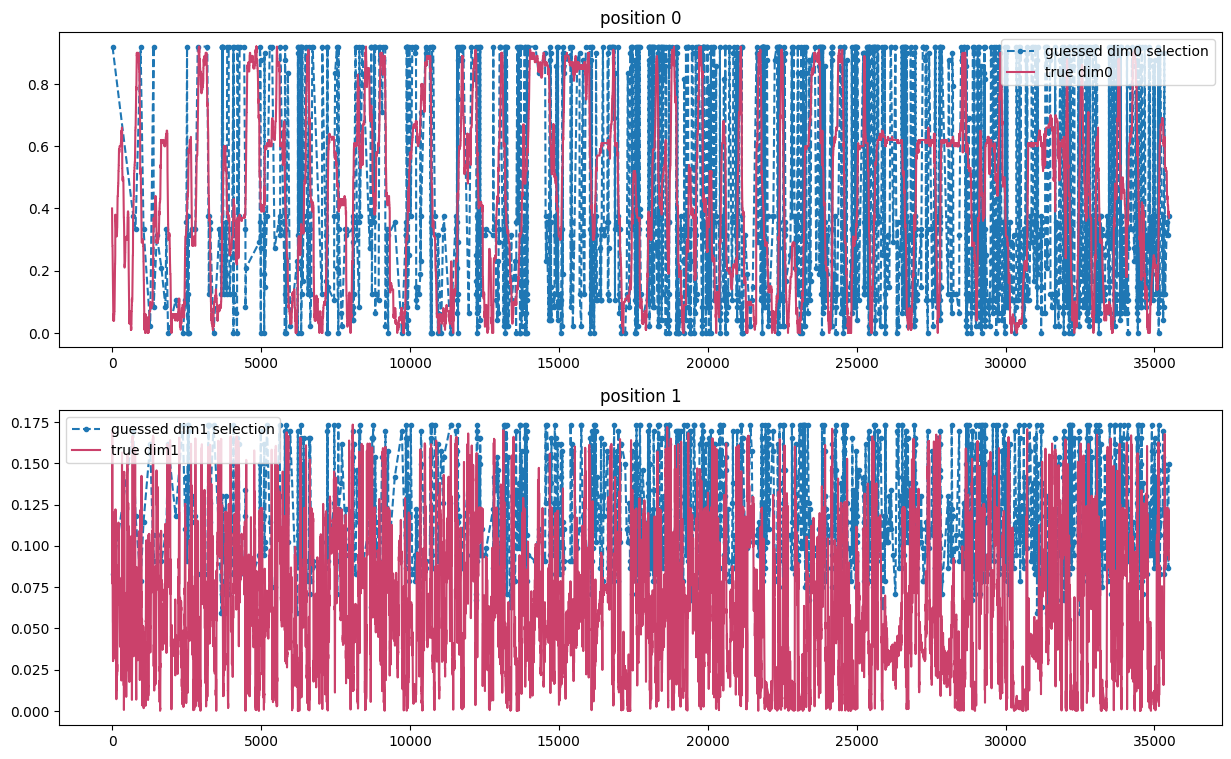

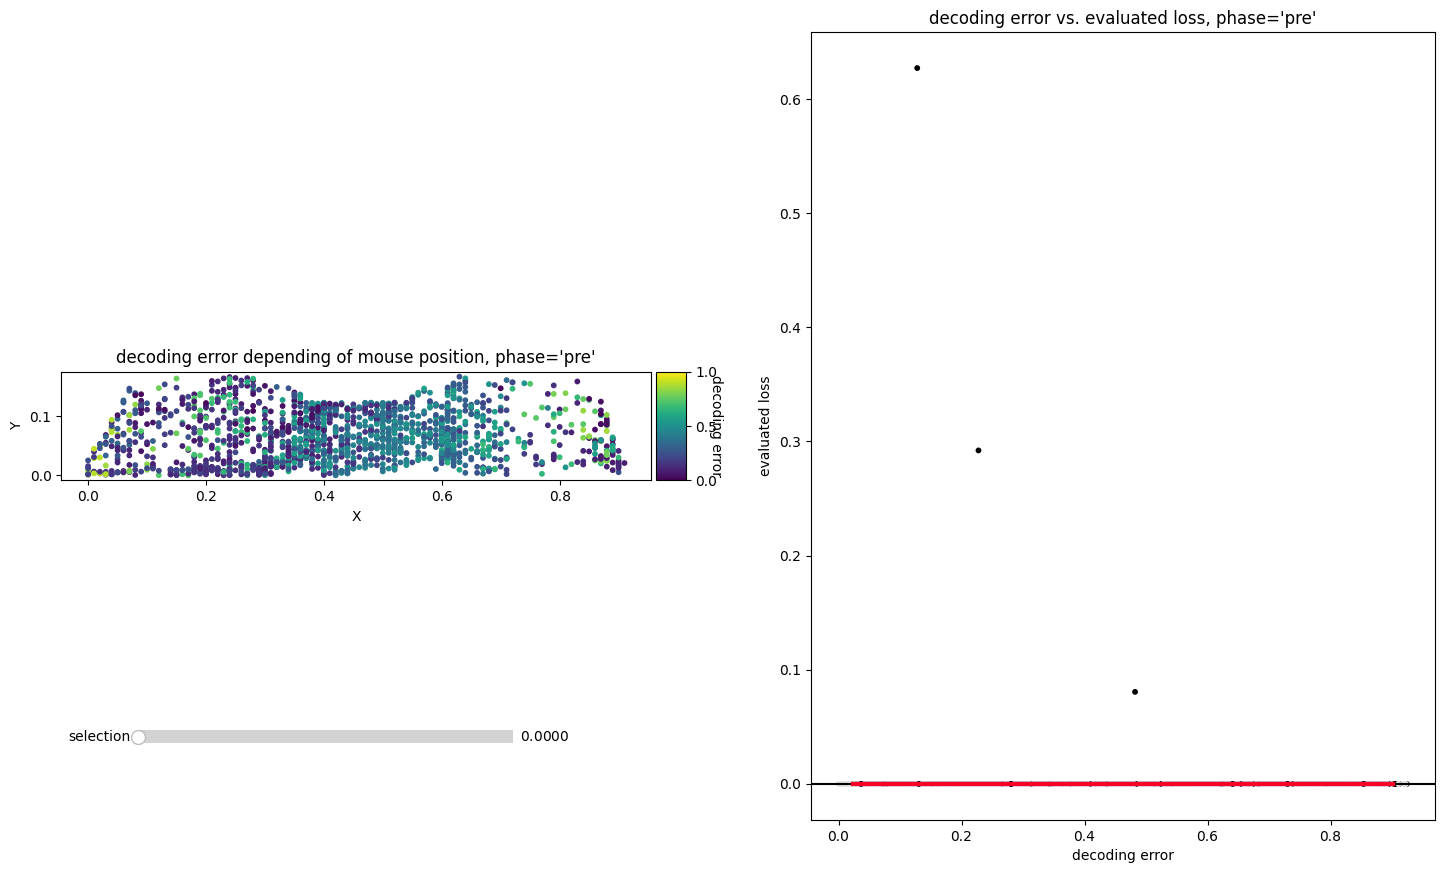

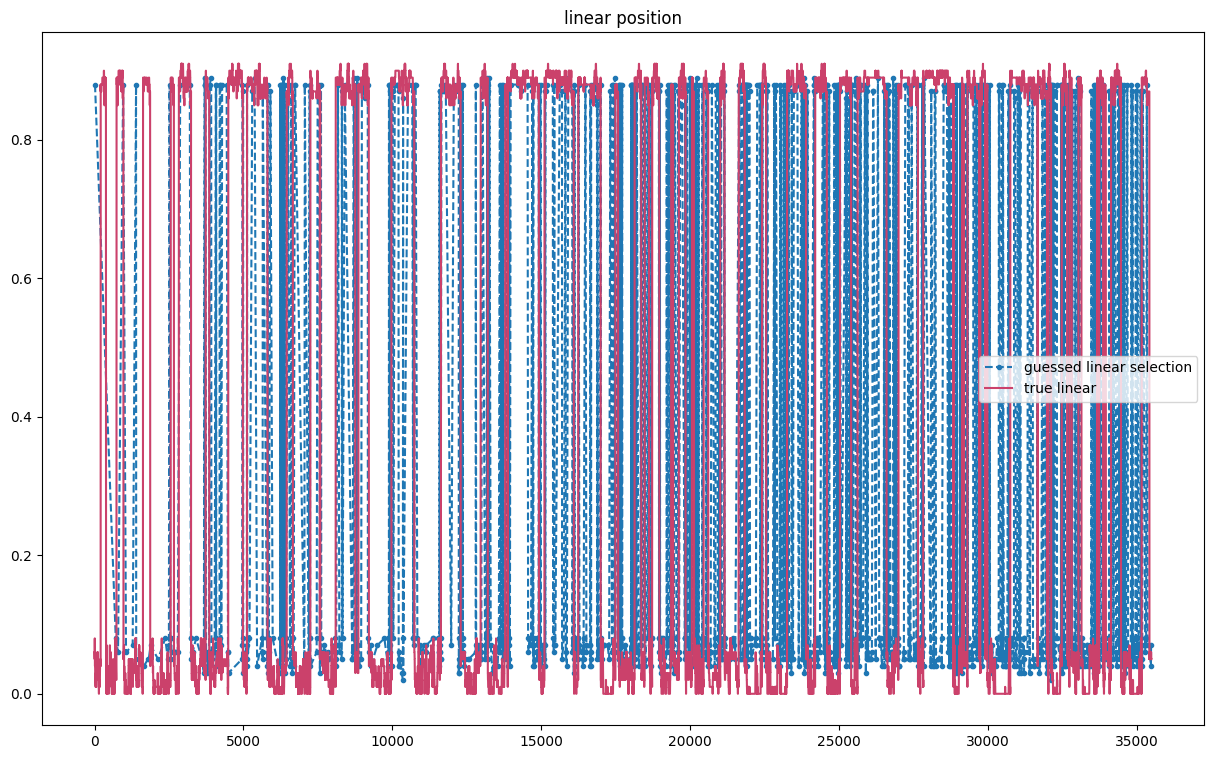

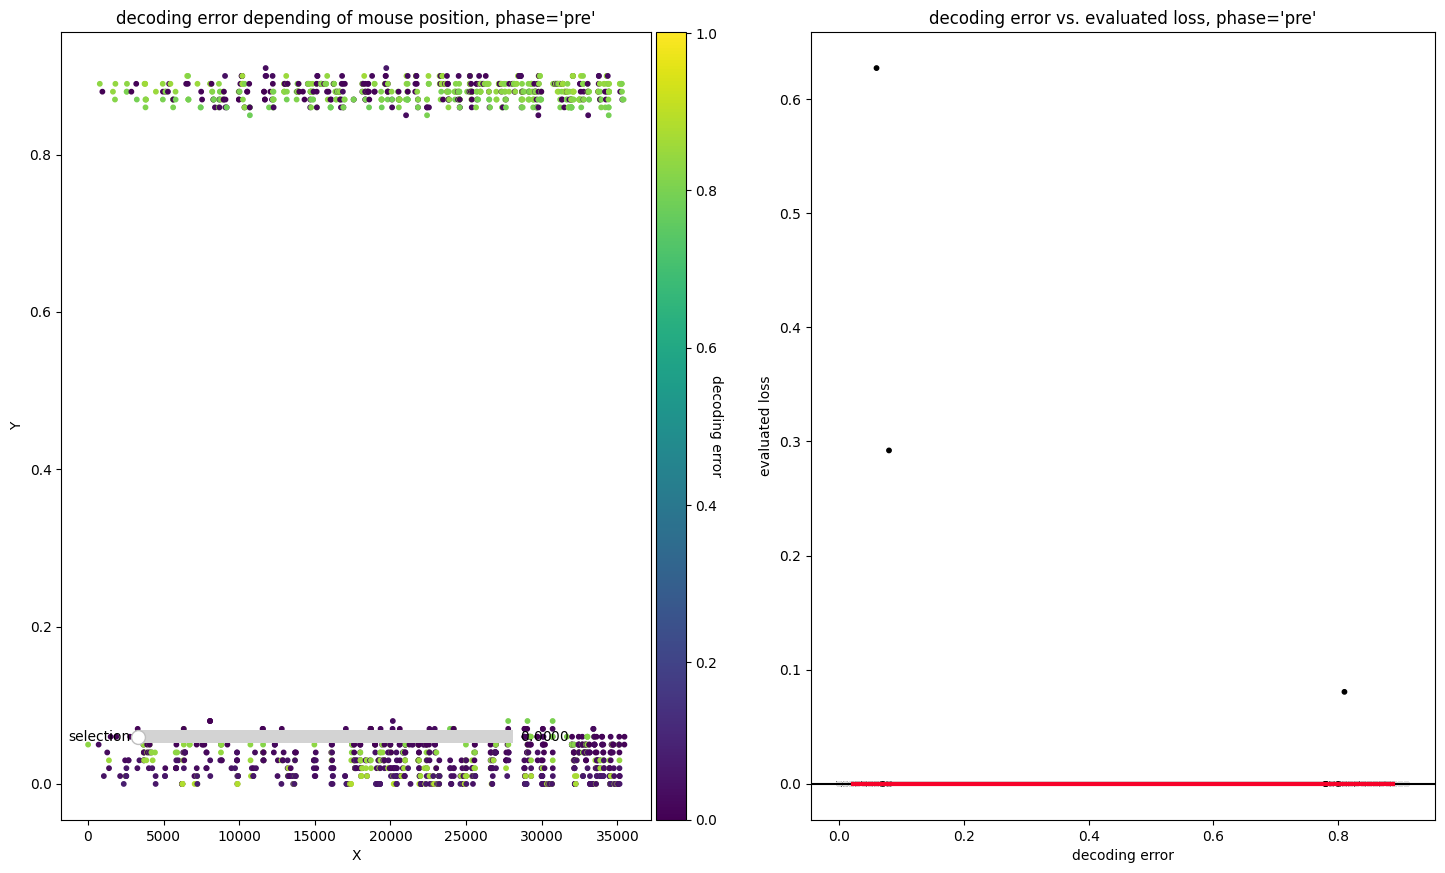

In [206]:
reload(BayesTraining)
with open(
    os.path.join(
        Parameters[mouse][winMS][session].resultsPath, "..", "bayesMatrices.pkl"
    ),
    "rb",
) as f:
    bayesMatrices = pickle.load(f)

BayesTrainer = BayesTraining.Trainer(ProjectPath[mouse][winMS][session])
timeStepPredTest = DataHelper[mouse][winMS][session].fullBehavior["positionTime"][
    inEpochs(
        DataHelper[mouse][winMS][session].fullBehavior["positionTime"][:, 0],
        DataHelper[mouse][winMS][session].fullBehavior["Times"]["testEpochs"],
    )
]
timeStepPredTrain = DataHelper[mouse][winMS][session].fullBehavior["positionTime"][
    inEpochs(
        DataHelper[mouse][winMS][session].fullBehavior["positionTime"][:, 0],
        DataHelper[mouse][winMS][session].fullBehavior["Times"]["trainEpochs"],
    )
]
timeStepPred = np.sort(np.concatenate((timeStepPredTrain, timeStepPredTest), axis=0))
outputs = BayesTrainer.test_as_NN(
    DataHelper[mouse][winMS][session].fullBehavior,
    bayesMatrices,
    timeStepPred,
    windowSizeMS=int(win_values[i]),
    useTrain=True,
    l_function=l_function[mouse][session],
)

(
    mean_eucl_bayes,
    select_eucl_bayes,
    mean_lin_bayes,
    select_lin_bayes,
) = print_results.print_results(
    BayesTrainer.folderResult,
    typeDec="bayes",
    results=outputs,
    windowSizeMS=int(win_values[i]),
    show=True,
    lossSelection=0.05,
    euclidean=False,
    target=target,
    phase=session,
)

In [ ]:
results_df.drop(columns=["NNTrainer"]).to_pickle(
    os.path.join(current_dir, f"results_df_wBayes.pkl"),
    protocol=pickle.HIGHEST_PROTOCOL,
)

In [ ]:
errors_df = pd.DataFrame(errors)
# Display the DataFrame
errors_df.head()

mouse   winMS   session  \
0  M994_PAG   108.0       all   
1  M994_PAG   180.0       all   
2  M994_PAG   252.0       all   
3  M994_PAG   504.0       all   
4  M994_PAG  1080.0  preNoHab   

                                               error  
0  index 2062 is out of bounds for axis 0 with si...  
1  boolean index did not match indexed array alon...  
2  index 2108 is out of bounds for axis 0 with si...  
3  boolean index did not match indexed array alon...  
4  [Errno 2] No such file or directory: '/media/m...

In [ ]:
%matplotlib qt

In [ ]:
testOutput[mouse][winMS][session]["predLoss"].min()

0.0

In [ ]:
NNTrainer[mouse][winMS][session].projectPath.folder

'/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG/'

In [ ]:
ProjectPath[mouse][winMS][session].folder

'/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG/'

In [ ]:
DataHelper[mouse][winMS][session].fullBehavior["positionTime"]

array([[1.01700000e+00],
       [1.27000000e+00],
       [1.33900000e+00],
       ...,
       [2.78837671e+04],
       [2.78838376e+04],
       [2.78839080e+04]])

In [ ]:
from cmath import phase
import re
from resultAnalysis import paper_figures
from simpleBayes import decode_bayes as BayesTraining
from fullEncoder import an_network as NNTraining

reload(BayesTraining)
reload(NNTraining)
reload(print_results)
reload(paper_figures)

NNTrainer[mouse][winMS][session] = NNTraining.LSTMandSpikeNetwork(
    ProjectPath[mouse][winMS][session],
    Parameters[mouse][winMS][session],
    deviceName=deviceName,
    debug=debug,
    phase=session,
)

testOutput[mouse][winMS][session] = NNTrainer[mouse][winMS][session].test(
    DataHelper[mouse][winMS][session].fullBehavior,
    useTrain=True,
    windowsizeMS=int(win_values[i]),
    isPredLoss=False,
    useSpeedFilter=True,
    phase=session,
    template=template,
)
if testOutput[mouse][winMS][session]["predLoss"].max() == 0:
    print("ouin ouin no interesting pred loss (always 0 or below)")
    avoid_zero = True
else:
    avoid_zero = False

mean, select, linmean, linselect = print_results.print_results(
    NNTrainer[mouse][winMS][session].folderResult,
    windowSizeMS=int(win_values[i]),
    show=True,
    lossSelection=0.2,
    euclidean=False,
    target=target,
    avoid_zero=avoid_zero,
    phase=session,
)

Loading the weights of the trained network
INFERRING


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['indexInDat', 'length', 'pos_index', 'time'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


43/43 [==============================] - 6s 72ms/step


2025-04-18 15:49:55.143423: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 18395491965516063401
2025-04-18 15:49:55.143477: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10768550318992630635
2025-04-18 15:49:55.143493: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 8774719912904257197
2025-04-18 15:49:55.143504: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10001353400909271829
2025-04-18 15:49:55.143515: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 7532999706645517623
2025-04-18 15:49:55.143526: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10531824215104320915
2025-04-18 15:49:55.143536: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv

gathering true feature
gathering times of the centre in the time window
gathering indices of spikes relative to coordinates
gathering speed mask
ouin ouin no interesting pred loss (always 0 or below)
total windows: 11008 | selected windows: 11008 (thresh 0.09169130690448807  ( 20.0 %) )
mean eucl. error: 0.2228736333371296 | selected error: 0.2228736333371296
mean linear error: 0.33925236191860464 | selected error: 0.33925236191860464
threshold value: 0.09169130690448807


threshold value: 0.09068852022649518


In [ ]:
plt.plot(select_eucl)
plt.plot(mean_eucl)
plt.plot(select_lin)
plt.plot(mean_lin)

In [ ]:
select_eucl

[0.15897013720697928,
 0.13938264170985085,
 0.13757669332606143,
 0.16121077263085581,
 0.2260172207597068,
 0.15981008574911232]

In [ ]:
sessions

['preNoHab', 'pre', 'hab', 'cond', 'post', 'all']

In [ ]:
figures[session].fig_example_XY(36)

In [ ]:
for session in sessions:
    figures[session].load_data()
    figures[session].predLoss_vs_trueLoss()

In [ ]:
graph, model = ProjectPath.getThresholdsAndGraph()

In [ ]:
from fullEncoder import an_network as Training

NNTrainer = Training.LSTMandSpikeNetwork(ProjectPath, Parameters, deviceName=deviceName)

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices("GPU")))

In [ ]:
NNTrainer.test(DataHelper.fullBehavior)